# chap2

In [1]:
import pandas as pd

In [2]:
sample_1 = pd.read_excel(r'C:\Users\mark8\scapy\datasalon\02_개정판\2_Data_Analysis_Basic\files\sample_1.xlsx', header = 1,
skipfooter = 2, usecols = 'A:C')
# header는 coloumn명이 있는 위치 1행이다 = 두번째 row
# skipfooter = 2 마지막 2행은 제외
# usecols = 'A:c' A칼럼부터 C칼럼까지 불러오기
sample_1.head(3)

국적코드  성별    입국객수
0  A01  남성  106320
1  A01  여성  191436
2  A31  남성     319

In [3]:
sample_1.tail(3)

국적코드  성별    입국객수
3  A31  여성      42
4  A18  남성  158912
5  A18  여성  232943

In [4]:
sample_1.info()
# 6 non-null object 칼럼은 빈칸없이 6개의 로우로 구성 object는 문자열

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적코드    6 non-null      object
 1   성별      6 non-null      object
 2   입국객수    6 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 272.0+ bytes


In [5]:
sample_1.describe() # 숫자형 변수만 통계량 출력

입국객수
count       6.000000
mean   114995.333333
std     98105.752006
min        42.000000
25%     26819.250000
50%    132616.000000
75%    183305.000000
max    232943.000000

## 칼럼 선택

In [6]:
sample_1['입 국객수']

KeyError: '입 국객수'

In [ ]:
sample_1[['입국객수', '국적코드']]

입국객수 국적코드
0  106320  A01
1  191436  A01
2     319  A31
3      42  A31
4  158912  A18
5  232943  A18

## 칼럼 생성

In [ ]:
sample_1['기준년월'] = '2019-11'
sample_1

국적코드  성별    입국객수     기준년월
0  A01  남성  106320  2019-11
1  A01  여성  191436  2019-11
2  A31  남성     319  2019-11
3  A31  여성      42  2019-11
4  A18  남성  158912  2019-11
5  A18  여성  232943  2019-11

## 로우 선택

In [ ]:
condition = (sample_1['성별'] == '남성')
condition

0     True
1    False
2     True
3    False
4     True
5    False
Name: 성별, dtype: bool

In [ ]:
sample_1[condition]

국적코드  성별    입국객수     기준년월
0  A01  남성  106320  2019-11
2  A31  남성     319  2019-11
4  A18  남성  158912  2019-11

In [ ]:
condition = (sample_1['입국객수'] >= 150000)
sample_1[condition] # 데이터프레임 데이터프레임 조건

국적코드  성별    입국객수     기준년월
1  A01  여성  191436  2019-11
4  A18  남성  158912  2019-11
5  A18  여성  232943  2019-11

In [ ]:
conditions = (sample_1['성별'] == '남성') & (sample_1['입국객수'] >= 150000)
conditions

0    False
1    False
2    False
3    False
4     True
5    False
dtype: bool

In [ ]:
sample_1[conditions]

국적코드  성별    입국객수     기준년월
4  A18  남성  158912  2019-11

In [ ]:
conditions = (sample_1['국적코드'] == 'A01')\
    |(sample_1['국적코드'] == 'A18')
sample_1[conditions]

국적코드  성별    입국객수     기준년월
0  A01  남성  106320  2019-11
1  A01  여성  191436  2019-11
4  A18  남성  158912  2019-11
5  A18  여성  232943  2019-11

In [ ]:
#여기부터## 한칼럼에 대해 여러 조건으로 필터링
conditions = (sample_1['국적코드'].isin(['A01', 'A18'])) # == A01 | A18
conditions

0     True
1     True
2    False
3    False
4     True
5     True
Name: 국적코드, dtype: bool

In [ ]:
sample_1[conditions]

국적코드  성별    입국객수     기준년월
0  A01  남성  106320  2019-11
1  A01  여성  191436  2019-11
4  A18  남성  158912  2019-11
5  A18  여성  232943  2019-11

In [ ]:
conditions = (sample_1['국적코드'].isin(['A01','A18']))
sample_1[(conditions) == False] # conditions가 아닌것

국적코드  성별  입국객수     기준년월
2  A31  남성   319  2019-11
3  A31  여성    42  2019-11

## 데이터 통합

In [ ]:
sample_1

국적코드  성별    입국객수     기준년월
0  A01  남성  106320  2019-11
1  A01  여성  191436  2019-11
2  A31  남성     319  2019-11
3  A31  여성      42  2019-11
4  A18  남성  158912  2019-11
5  A18  여성  232943  2019-11

In [ ]:
code_master = pd.read_excel(r'datasalon/02_개정판/2_Data_Analysis_Basic/files/sample_codemaster.xlsx')
code_master

국적코드     국적명
0  A01      일본
1  A02      대만
2  A03      홍콩
3  A18      중국
4  A19      이란
5  A22  우즈베키스탄
6  A23   카자흐스탄
7  A99  아시아 기타

In [ ]:
sample_1_code = pd.merge(left = sample_1, right = code_master, how = 'left', left_on = '국적코드', right_on = '국적코드' )
sample_1_code

국적코드  성별    입국객수     기준년월  국적명
0  A01  남성  106320  2019-11   일본
1  A01  여성  191436  2019-11   일본
2  A31  남성     319  2019-11  NaN
3  A31  여성      42  2019-11  NaN
4  A18  남성  158912  2019-11   중국
5  A18  여성  232943  2019-11   중국

In [ ]:
sample_1_code = pd.merge(left = sample_1, right = code_master, left_on = '국적코드', right_on = '국적코드' )
sample_1_code

국적코드  성별    입국객수     기준년월 국적명
0  A01  남성  106320  2019-11  일본
1  A01  여성  191436  2019-11  일본
2  A18  남성  158912  2019-11  중국
3  A18  여성  232943  2019-11  중국

In [ ]:
sample_2 = pd.read_excel(r'datasalon/02_개정판/2_Data_Analysis_Basic/files/sample_2.xlsx',
header = 1, skipfooter = 2, usecols = 'A:C')
sample_2['기준년월'] = '2019-12'
sample_2_code = pd.merge(left = sample_2, right = code_master, how = 'left',
left_on = '국적코드', right_on = '국적코드')
sample_2_code

국적코드  성별    입국객수     기준년월 국적명
0  A01  남성   92556  2019-12  일본
1  A01  여성  163737  2019-12  일본
2  A18  남성  155540  2019-12  중국
3  A18  여성  249023  2019-12  중국

In [ ]:
sample_1_code

국적코드  성별    입국객수     기준년월 국적명
0  A01  남성  106320  2019-11  일본
1  A01  여성  191436  2019-11  일본
2  A18  남성  158912  2019-11  중국
3  A18  여성  232943  2019-11  중국

In [ ]:
sample = sample_1_code.append(sample_2_code, ignore_index =True)
sample

C:\Users\mark8\AppData\Local\Temp\ipykernel_22564\1456398833.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample = sample_1_code.append(sample_2_code, ignore_index =True)


국적코드  성별    입국객수     기준년월 국적명
0  A01  남성  106320  2019-11  일본
1  A01  여성  191436  2019-11  일본
2  A18  남성  158912  2019-11  중국
3  A18  여성  232943  2019-11  중국
4  A01  남성   92556  2019-12  일본
5  A01  여성  163737  2019-12  일본
6  A18  남성  155540  2019-12  중국
7  A18  여성  249023  2019-12  중국

In [ ]:
sample_1_code.append(sample_2_code)

C:\Users\mark8\AppData\Local\Temp\ipykernel_22564\518034107.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_1_code.append(sample_2_code)


국적코드  성별    입국객수     기준년월 국적명
0  A01  남성  106320  2019-11  일본
1  A01  여성  191436  2019-11  일본
2  A18  남성  158912  2019-11  중국
3  A18  여성  232943  2019-11  중국
0  A01  남성   92556  2019-12  일본
1  A01  여성  163737  2019-12  일본
2  A18  남성  155540  2019-12  중국
3  A18  여성  249023  2019-12  중국

In [ ]:
sample

국적코드  성별    입국객수     기준년월 국적명
0  A01  남성  106320  2019-11  일본
1  A01  여성  191436  2019-11  일본
2  A18  남성  158912  2019-11  중국
3  A18  여성  232943  2019-11  중국
4  A01  남성   92556  2019-12  일본
5  A01  여성  163737  2019-12  일본
6  A18  남성  155540  2019-12  중국
7  A18  여성  249023  2019-12  중국

## 데이터의 집계(pivot_table)

### 피벗테이블 : 기존 데이터의 칼럼을 재구성해서 데이터에 대한 통계를 한눈에 파악할수있게 정리한 표
### 피벗 기능을 이요하면 데이터를 원하는 형태로 손쉽게 집계가능 (**별로 데이터를 집계)

In [ ]:
sample_pivot = sample.pivot_table(values = '입국객수', index = '국적명', columns = '기준년월', aggfunc = 'mean')
sample_pivot

기준년월   2019-11   2019-12
국적명                     
일본    148878.0  128146.5
중국    195927.5  202281.5

In [ ]:
# aggfunc = mean, sum, min, median, max, count, nunique(중복을 제거한후 개수, 중복되지않은 원소의 개수)
# 인덱스만 있는 pivot_table
sample_pivot2 = sample.pivot_table(values = '입국객수', index = '국적명', aggfunc = 'max')
sample_pivot2

입국객수
국적명        
일본   191436
중국   249023

## 웹 크롤링

In [ ]:
pip install selenium

^C
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from selenium import webdriver

In [ ]:
driver = webdriver.Chrome(r'C:\Users\mark8\scapy\chrome-win64\chrome-win64\chrome.exe')

NoSuchDriverException: Message: Unable to obtain chromedriver using Selenium Manager; 'str' object has no attribute 'capabilities'; For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors/driver_location


In [ ]:
# 예제 2-40 실습용 HTML
html = '''
<html>
    <head>
    </head>
    <body>
        <h1> 우리동네시장</h1>
            <div class = 'sale'>
                <p id='fruits1' class='fruits'>
                    <span class = 'name'> 바나나 </span>
                    <span class = 'price'> 3000원 </span>
                    <span class = 'inventory'> 500개 </span>
                    <span class = 'store'> 가나다상회 </span>
                    <a href = 'http://bit.ly/forPlaywithData' > 홈페이지 </a>
                </p>
            </div>
            <div class = 'prepare'>
                <p id='fruits2' class='fruits'>
                    <span class ='name'> 파인애플 </span>
                </p>
            </div>
    </body>
</html>
'''

In [ ]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

In [ ]:
soup


<html>
<head>
</head>
<body>
<h1> 우리동네시장</h1>
<div class="sale">
<p class="fruits" id="fruits1">
<span class="name"> 바나나 </span>
<span class="price"> 3000원 </span>
<span class="inventory"> 500개 </span>
<span class="store"> 가나다상회 </span>
<a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
</p>
</div>
<div class="prepare">
<p class="fruits" id="fruits2">
<span class="name"> 파인애플 </span>
</p>
</div>
</body>
</html>

In [ ]:
# beautiful soup 명령어인 select('조건')을 이용하면 html내에서 입력한 조건을 만족하는 태그를 모두 선택할수있다
# 조건 부분에는 해당 태그의 태그명이나 속성값을 지정하거나 태그간의 구조를 지정할수도있고
# 두방법을 모두 활용할 수 있다
# 1 태그명과 해당 태그의 속성 정보를 이용해 특정 태그를 찾을수 있습니다
# 태그명으로 태그 찾기
tags_span = soup.select('span')

tags_p = soup.select('p')


In [ ]:
# id, class로 태그 찾기
ids_fruits1 = soup.select('#fruits1') # 아이디
class_price = soup.select('.price') # 클래스 = 글꼴, 배경색
tags_span_class_price = soup.select('span.price') # 태그명.class

In [ ]:
tags_name = soup.select('span.name')
print(tags_name)

[<span class="name"> 바나나 </span>, <span class="name"> 파인애플 </span>]


In [ ]:
tags_banana1 = soup.select('#fruits1 > span.name')
print(tags_banana1)

[<span class="name"> 바나나 </span>]


In [ ]:
tags_banana2 = soup.select('div.sale > #fruits1 > span.name')# 한단계 아래
tags_banana3 = soup.select('div.sale span.name')# 몇단계 아래
print(tags_banana2)
print(tags_banana3)

[<span class="name"> 바나나 </span>]
[<span class="name"> 바나나 </span>]


In [ ]:
tags = soup.select('span.name') #span.name이 3개있으므로 리스트로 저장
tag_1 = tags[0]
print(tag_1)

<span class="name"> 바나나 </span>


In [ ]:
tags = soup.select('span.name')
for tag in tags:
    print(tag.text)

 바나나 
 파인애플 


In [ ]:
# 선택한 태그에서 정보 가져오기
# content = TAG.text
# attribute = TAG['속성명']
tags = soup.select('a')
tag = tags[0]
content = tag.text
print(content)
link = tag['href'] # a태그안에 href속성
print(link)

 홈페이지 
http://bit.ly/forPlaywithData


In [ ]:
# # requests 패키지 가져오기
# import requests               

# # 가져올 url 문자열로 입력
# url = 'https://www.naver.com'  

# # requests의 get함수를 이용해 해당 url로 부터 html이 담긴 자료를 받아옴
# response = requests.get(url)    

# # 우리가 얻고자 하는 html 문서가 여기에 담기게 됨
# html_text = response.text

In [ ]:
import requests
url = 'https://www.melon.com/chart/index.htm'
user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36'
hdr = {'User-Agent':user_agent}

response = requests.get(url, headers = hdr)
print(response)
html_text = response.text

<Response [200]>


In [ ]:
from bs4 import BeautifulSoup as bs
soup = bs(html_text, 'html.parser')
print(html)

In [ ]:
songs = soup.select('#lst50')
print(len(songs))
print(songs[0])

50
<tr class="lst50" data-song-no="36599950" id="lst50">
<td><div class="wrap t_right"><input class="input_check" name="input_check" title="Super Shy 곡 선택" type="checkbox" value="36599950"/></div></td>
<td><div class="wrap t_center"><span class="rank">1</span><span class="none">위</span></div></td>
<!-- 차트순위 추가 -->
<td><div class="wrap">
<span class="rank_wrap" title="순위 동일">
<span class="bullet_icons rank_static"><span class="none">순위 동일</span></span>
<span class="none">0</span>
</span>
</div></td>
<td><div class="wrap">
<a class="image_typeAll" href="javascript:melon.link.goAlbumDetail('11281456');" title="NewJeans 2nd EP 'Get Up'">
<img alt="NewJeans 2nd EP 'Get Up' - 페이지 이동" height="60" onerror="WEBPOCIMG.defaultAlbumImg(this);" src="https://cdnimg.melon.co.kr/cm2/album/images/112/81/456/11281456_20230706180841_500.jpg/melon/resize/120/quality/80/optimize" width="60">
<span class="bg_album_frame"></span>
</img></a>
</div></td>
<td><div class="wrap">
<a class="btn button_icons type03

In [ ]:
song = songs[0]

In [ ]:
title = song.select('a')
len(title)
title

[<a class="image_typeAll" href="javascript:melon.link.goAlbumDetail('11281456');" title="NewJeans 2nd EP 'Get Up'">
 <img alt="NewJeans 2nd EP 'Get Up' - 페이지 이동" height="60" onerror="WEBPOCIMG.defaultAlbumImg(this);" src="https://cdnimg.melon.co.kr/cm2/album/images/112/81/456/11281456_20230706180841_500.jpg/melon/resize/120/quality/80/optimize" width="60">
 <span class="bg_album_frame"></span>
 </img></a>,
 <a class="btn button_icons type03 song_info" href="javascript:melon.link.goSongDetail('36599950');" title="Super Shy 곡정보"><span class="none">곡정보</span></a>,
 <a href="javascript:melon.play.playSong('1000002721',36599950);" title="Super Shy 재생">Super Shy</a>,
 <a href="javascript:melon.link.goArtistDetail('3114174');" title="NewJeans - 페이지 이동">NewJeans</a>,
 <a href="javascript:melon.link.goArtistDetail('3114174');" title="NewJeans - 페이지 이동">NewJeans</a>,
 <a href="javascript:melon.link.goAlbumDetail('11281456');" title="NewJeans 2nd EP 'Get Up' - 페이지 이동">NewJeans 2nd EP 'Get Up'</a>

In [ ]:
# title이 리스트로 저장되있어서 [0]붙임 , [<a></a>]
title = song.select('#lst50 > td:nth-child(6) > div > div > div.ellipsis.rank01 > span > a')[0].text
title

'Super Shy'

In [ ]:
singer = song.select('#lst50 > td:nth-child(6) > div > div > div.ellipsis.rank02 > a')[0].text
singer

'NewJeans'

In [ ]:
import pandas as pd

In [ ]:
title_list = []
singer_list = []
for song in songs: # 50개 곡
    title = song.select('#lst50 > td:nth-child(6) > div > div > div.ellipsis.rank01 > span > a')[0].text
    singer = song.select('#lst50 > td:nth-child(6) > div > div > div.ellipsis.rank02 > a')[0].text
    title_list.append(title)
    singer_list.append(singer)
    print('{} : {}'.format(title, singer))
df = pd.DataFrame({'title':title_list,
                   'singer':singer_list})
print(df.head())
df.to_excel('./melon_Top50.xlsx')


Super Shy : NewJeans
Seven (feat. Latto) - Clean Ver. : 정국
ETA : NewJeans
퀸카 (Queencard) : (여자)아이들
헤어지자 말해요 : 박재정
I AM : IVE (아이브)
이브, 프시케 그리고 푸른 수염의 아내 : LE SSERAFIM (르세라핌)
Spicy : aespa
New Jeans : NewJeans
Steal The Show (From “엘리멘탈”) : Lauv
Hype boy : NewJeans
Kitsch : IVE (아이브)
UNFORGIVEN (feat. Nile Rodgers) : LE SSERAFIM (르세라핌)
사랑은 늘 도망가 : 임영웅
모래 알갱이 : 임영웅
Ditto : NewJeans
Candy : NCT DREAM
우리들의 블루스 : 임영웅
다시 만날 수 있을까 : 임영웅
손오공 : 세븐틴 (SEVENTEEN)
ISTJ : NCT DREAM
Cool With You : NewJeans
OMG : NewJeans
Attention : NewJeans
무지개 : 임영웅
이제 나만 믿어요 : 임영웅
London Boy : 임영웅
꽃 : 지수 (JISOO)
Polaroid : 임영웅
아버지 : 임영웅
Dynamite : 방탄소년단
Broken Melodies : NCT DREAM
After LIKE : IVE (아이브)
Still With You : 정국
사건의 지평선 : 윤하 (YOUNHA)
인생찬가 : 임영웅
A bientot : 임영웅
I Don't Think That I Like Her : Charlie Puth
손이 참 곱던 그대 : 임영웅
LOVE DIVE : IVE (아이브)
사랑해 진짜 : 임영웅
Butter : 방탄소년단
연애편지 : 임영웅
Dangerously : Charlie Puth
Cupid : FIFTY FIFTY
파이팅 해야지 (Feat. 이영지) : 부석순 (SEVENTEEN)
심(心) : DK(디셈버)
봄날 : 방탄소년단
Teddy Bear :

In [8]:
# 여기부터
import pandas as pd
kto_201901 = pd.read_excel(r'C:\Users\mark8\scapy\datasalon\01_초판\3_Tourists_Event\files\kto_201901.xlsx',
                           header = 1,
                           #skiprows=1,
                           usecols = 'A:G',
                           skipfooter = 4)
kto_201901.head()
# skiprows = 1 == header = 1 

국적      관광     상용    공용  유학/연수      기타       계
0  아시아주  765082  10837  1423  14087  125521  916950
1    일본  198805   2233   127    785    4576  206526
2    대만   86393     74    22    180    1285   87954
3    홍콩   34653     59     2     90    1092   35896
4   마카오    2506      2     0     17      45    2570

In [ ]:
kto_201901.columns
kto_201901.tail()

국적   관광   상용  공용  유학/연수     기타      계
62  아프리카 기타  768  718  90    206    908   2690
63     기타대륙   33    4   0      1     16     54
64     국적미상   33    4   0      1     16     54
65     교포소계    0    0   0      0  15526  15526
66       교포    0    0   0      0  15526  15526

# chap3 데이터 전처리

In [ ]:
# 1. 데이터 탐색
kto_201901.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적      67 non-null     object
 1   관광      67 non-null     int64 
 2   상용      67 non-null     int64 
 3   공용      67 non-null     int64 
 4   유학/연수   67 non-null     int64 
 5   기타      67 non-null     int64 
 6   계       67 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 3.8+ KB


In [ ]:
kto_201901.describe()

관광            상용           공용         유학/연수             기타  \
count      67.00000     67.000000    67.000000     67.000000      67.000000   
mean    26396.80597    408.208955   132.507463    477.462687    5564.208955   
std    102954.04969   1416.040302   474.406339   2009.484800   17209.438418   
min         0.00000      0.000000     0.000000      0.000000      16.000000   
25%       505.00000     14.500000     2.500000     17.500000     260.000000   
50%      1304.00000     45.000000    14.000000     43.000000     912.000000   
75%      8365.00000    176.500000    38.000000    182.000000    2824.500000   
max    765082.00000  10837.000000  2657.000000  14087.000000  125521.000000   

                   계  
count      67.000000  
mean    32979.194030  
std    122821.369969  
min        54.000000  
25%       927.000000  
50%      2695.000000  
75%     14905.500000  
max    916950.000000

In [ ]:
kto_201901.describe().loc['mean'].sort_values(ascending=False)

계        32979.194030
관광       26396.805970
기타        5564.208955
유학/연수      477.462687
상용         408.208955
공용         132.507463
Name: mean, dtype: float64

In [ ]:
import numpy as np
condition = ((kto_201901['관광'] == 0) | (kto_201901['상용'] == 0)\
             | (kto_201901['공용'] == 0)\
                |(kto_201901['유학/연수'] == 0))
condition # 시리즈가 bool형식으로 된거
kto_201901[condition]

국적    관광   상용  공용  유학/연수     기타      계
4      마카오  2506    2   0     17     45   2570
20    이스라엘   727   12   0      9     57    805
22  우즈베키스탄  1958  561   0    407   2828   5754
38     스위스   613   18   0     19     97    747
45     그리스   481   17   4      0    273    775
46    포르투갈   416   14   0     13    121    564
51   크로아티아   226   12   0      3    250    491
54     폴란드   713   10   0     27    574   1324
59  대양주 기타   555    3   4      0     52    614
63    기타대륙    33    4   0      1     16     54
64    국적미상    33    4   0      1     16     54
65    교포소계     0    0   0      0  15526  15526
66      교포     0    0   0      0  15526  15526

In [ ]:
# 데이터프레임에 기준년월 추가
kto_201901['기준년월'] = '2019-01'
kto_201901.head()

국적      관광     상용    공용  유학/연수      기타       계     기준년월
0  아시아주  765082  10837  1423  14087  125521  916950  2019-01
1    일본  198805   2233   127    785    4576  206526  2019-01
2    대만   86393     74    22    180    1285   87954  2019-01
3    홍콩   34653     59     2     90    1092   35896  2019-01
4   마카오    2506      2     0     17      45    2570  2019-01

In [ ]:
kto_201901['국적'].unique() # 중복을 제거한 값들을 보여주는 함수

array(['아시아주', '일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아',
       '싱가포르', '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골',
       '중국', '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미주',
       '미국', '캐나다', '멕시코', '브라질', '미주 기타', '구주', '영국', '독일', '프랑스',
       '네덜란드', '스웨덴', '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인',
       '그리스', '포르투갈', '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아',
       '불가리아', '폴란드', '구주 기타', '대양주', '오스트레일리아', '뉴질랜드', '대양주 기타',
       '아프리카주', '남아프리카공화국', '아프리카 기타', '기타대륙', '국적미상', '교포소계', '교포'],
      dtype=object)

In [ ]:
# 대륙제외 국가 칼럼에 국가만 남기기
continents_list = ['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']
continents_list

['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']

In [ ]:
condition = (kto_201901.국적.isin(continents_list) == False)
kto_201901_country = kto_201901[condition]
kto_201901_country['국적'].unique()

array(['일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아', '싱가포르',
       '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골', '중국',
       '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미국',
       '캐나다', '멕시코', '브라질', '미주 기타', '영국', '독일', '프랑스', '네덜란드', '스웨덴',
       '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인', '그리스', '포르투갈',
       '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아', '불가리아', '폴란드',
       '구주 기타', '오스트레일리아', '뉴질랜드', '대양주 기타', '남아프리카공화국', '아프리카 기타',
       '국적미상', '교포'], dtype=object)

In [ ]:
kto_201901_country.head()

국적      관광    상용   공용  유학/연수    기타       계     기준년월
1   일본  198805  2233  127    785  4576  206526  2019-01
2   대만   86393    74   22    180  1285   87954  2019-01
3   홍콩   34653    59    2     90  1092   35896  2019-01
4  마카오    2506     2    0     17    45    2570  2019-01
5   태국   34004    37  199     96  6998   41334  2019-01

In [ ]:
# 데이터를 필터링하다보면 인덱스값이 누락되므로 인덱스값 초기화 필요
kto_201901_country_newindex = kto_201901_country.reset_index(drop = True)
kto_201901_country_newindex.head()

국적      관광    상용   공용  유학/연수    기타       계     기준년월
0   일본  198805  2233  127    785  4576  206526  2019-01
1   대만   86393    74   22    180  1285   87954  2019-01
2   홍콩   34653    59    2     90  1092   35896  2019-01
3  마카오    2506     2    0     17    45    2570  2019-01
4   태국   34004    37  199     96  6998   41334  2019-01

In [ ]:
# 대륙 칼럼값 만들기
continents = ['아시아'] * 25 + ['아메리카'] * 5 + ['유럽'] * 23 + ['오세아니아'] * 3 \
+ ['아프리카'] * 2 + ['기타대륙'] + ['교포']
print(continents)

['아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아메리카', '아메리카', '아메리카', '아메리카', '아메리카', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '오세아니아', '오세아니아', '오세아니아', '아프리카', '아프리카', '기타대륙', '교포']


In [ ]:
kto_201901_country_newindex['대륙'] = continents
kto_201901_country_newindex.head()

국적      관광    상용   공용  유학/연수    기타       계     기준년월   대륙
0   일본  198805  2233  127    785  4576  206526  2019-01  아시아
1   대만   86393    74   22    180  1285   87954  2019-01  아시아
2   홍콩   34653    59    2     90  1092   35896  2019-01  아시아
3  마카오    2506     2    0     17    45    2570  2019-01  아시아
4   태국   34004    37  199     96  6998   41334  2019-01  아시아

In [ ]:
kto_201901_country_newindex.tail()

국적   관광   상용  공용  유학/연수     기타      계     기준년월     대륙
55    대양주 기타  555    3   4      0     52    614  2019-01  오세아니아
56  남아프리카공화국  368    9   1      6    616   1000  2019-01   아프리카
57   아프리카 기타  768  718  90    206    908   2690  2019-01   아프리카
58      국적미상   33    4   0      1     16     54  2019-01   기타대륙
59        교포    0    0   0      0  15526  15526  2019-01     교포

In [ ]:
kto_201901_country_newindex['관광객비율(%)'] = \
round(kto_201901_country_newindex['관광'] / kto_201901_country_newindex['계'] * 100, 1)
# 관광/전체*100
kto_201901_country_newindex.head()

국적      관광    상용   공용  유학/연수    기타       계     기준년월   대륙  관광객비율(%)
0   일본  198805  2233  127    785  4576  206526  2019-01  아시아      96.3
1   대만   86393    74   22    180  1285   87954  2019-01  아시아      98.2
2   홍콩   34653    59    2     90  1092   35896  2019-01  아시아      96.5
3  마카오    2506     2    0     17    45    2570  2019-01  아시아      97.5
4   태국   34004    37  199     96  6998   41334  2019-01  아시아      82.3

In [ ]:
# 관광으로 온 상위 5개국
# by로 한번에 sort후 df출력
kto_201901_country_newindex.sort_values(by = '관광객비율(%)', ascending = False).head()

국적      관광    상용   공용  유학/연수    기타       계     기준년월     대륙  관광객비율(%)
1       대만   86393    74   22    180  1285   87954  2019-01    아시아      98.2
3      마카오    2506     2    0     17    45    2570  2019-01    아시아      97.5
2       홍콩   34653    59    2     90  1092   35896  2019-01    아시아      96.5
0       일본  198805  2233  127    785  4576  206526  2019-01    아시아      96.3
55  대양주 기타     555     3    4      0    52     614  2019-01  오세아니아      90.4

In [ ]:
# 조건후 / 시리즈 출력
condition = kto_201901_country_newindex['관광객비율(%)'].sort_values(ascending = False)
condition

1     98.2
3     97.5
2     96.5
0     96.3
55    90.4
19    90.3
53    89.6
23    87.3
5     86.3
34    85.9
16    85.4
8     85.0
4     82.3
35    82.1
17    81.5
30    78.7
7     75.3
54    74.5
43    73.8
41    73.8
36    72.1
31    71.9
28    70.8
33    70.2
40    70.1
37    69.2
27    69.2
39    69.1
38    68.9
25    68.5
47    68.5
29    68.0
32    67.7
45    65.9
26    64.5
42    62.1
22    61.1
58    61.1
52    61.0
51    53.9
10    53.2
44    48.0
49    47.2
6     46.9
48    46.0
20    44.4
56    36.8
50    35.7
24    34.3
21    34.0
18    32.6
57    28.6
11    26.7
46    26.2
9     24.7
15    23.6
13    23.1
12    12.2
14    11.9
59     0.0
Name: 관광객비율(%), dtype: float64

In [ ]:
k = kto_201901_country_newindex.pivot_table(values = '관광객비율(%)', 
                                        index = '대륙',
                                        aggfunc = 'mean')
# 인덱스2개 끼리 확인하는것이 pivot_table

In [ ]:
k.sort_values(by = '관광객비율(%)', ascending = False)

관광객비율(%)
대륙              
오세아니아  84.833333
아메리카   68.200000
유럽     63.826087
기타대륙   61.100000
아시아    59.624000
아프리카   32.700000
교포      0.000000

In [ ]:
# 중국 국적만 필터링
condition = (kto_201901_country_newindex.국적 == '중국')
kto_201901_country_newindex[condition]

국적      관광    상용   공용  유학/연수     기타       계     기준년월   대륙  관광객비율(%)
17  중국  320113  2993  138   8793  60777  392814  2019-01  아시아      81.5

In [ ]:
tourist_sum = sum(kto_201901_country_newindex['관광'])
tourist_sum

884293

In [ ]:
kto_201901_country_newindex['전체비율(%)'] = round(kto_201901_country_newindex['관광'] / tourist_sum * 100, 1)
kto_201901_country_newindex.head()

국적      관광    상용   공용  유학/연수    기타       계     기준년월   대륙  관광객비율(%)  \
0   일본  198805  2233  127    785  4576  206526  2019-01  아시아      96.3   
1   대만   86393    74   22    180  1285   87954  2019-01  아시아      98.2   
2   홍콩   34653    59    2     90  1092   35896  2019-01  아시아      96.5   
3  마카오    2506     2    0     17    45    2570  2019-01  아시아      97.5   
4   태국   34004    37  199     96  6998   41334  2019-01  아시아      82.3   

   전체비율(%)  
0     22.5  
1      9.8  
2      3.9  
3      0.3  
4      3.8

In [ ]:
kto_201901_country_newindex.sort_values(by = '전체비율(%)', ascending = False).head()

국적      관광    상용    공용  유학/연수     기타       계     기준년월    대륙  관광객비율(%)  \
17  중국  320113  2993   138   8793  60777  392814  2019-01   아시아      81.5   
0   일본  198805  2233   127    785   4576  206526  2019-01   아시아      96.3   
1   대만   86393    74    22    180   1285   87954  2019-01   아시아      98.2   
25  미국   42989   418  2578    229  16523   62737  2019-01  아메리카      68.5   
2   홍콩   34653    59     2     90   1092   35896  2019-01   아시아      96.5   

    전체비율(%)  
17     36.2  
0      22.5  
1       9.8  
25      4.9  
2       3.9

In [ ]:
# create_kto_data 함수생성
#1 불러올 엑셀 파일 경로를 지정
def create_kto_data(yy, mm):
    file_path = r'C:\Users\mark8\scapy\datasalon\01_초판\3_Tourists_Event\files{0}{1}.xlsx'.format(yy, mm)
    
    #2 엑셀 파일 불러오기
    df = pd.read_excel(file_path, header = 1, skipfooter = 4, usecols = 'A:G')

    #3 기준년월 칼럼 추가
    df['기준년월'] = '{}-{}'.format(yy, mm)

    #4 '국적' 칼럼에서 대륙 제거하고 국가만 남기기
    ignore_list = ['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']
    condition = (df['국적'].isin(ignore_list) == False)
    df_country = df[condition].reset_index(drop = True)

    #5 대륙 칼럼 추가
    continents = ['아시아'] * 25 + ['아메리카'] * 5 + ['유럽'] * 23 + ['대양주'] * 3 + ['아프리카'] * 2 + ['기타대륙'] + ['교포']
    df_country['대륙'] = continents

    #6 국가별 '관광객비율' 칼럼 추가
    df_country['관광객비율(%)'] = round(df_country.관광 / df_country.계 * 100, 1)

    #7 '전체비율(%)' 칼럼 추가
    tourist_sum = sum(df_country['관광'])
    df_country['전체비율(%)'] = round(df_country['관광'] / tourist_sum * 100, 1)

    #8 결과 출력
    return(df_country)
 

In [ ]:
kto_test = create_kto_data(2018, 12)
kto_test

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\mark8\\scapy\\datasalon\\01_초판\\3_Tourists_Event\\files201812.xlsx'

In [12]:
# 시계열 그래프 그리기
import pandas as pd
df = pd.read_excel(r'C:\Users\mark8\scapy\datasalon\01_초판\3_Tourists_Event\files\kto_total.xlsx')
df.head()

국적      관광    상용  공용  유학/연수    기타       계     기준년월   대륙  관광객비율(%)  전체비율(%)
0   일본  202825  1750  89    549  3971  209184  2010-01  아시아      97.0     50.6
1   대만   35788    41  17     37   516   36399  2010-01  아시아      98.3      8.9
2   홍콩   13874    55   0     21   595   14545  2010-01  아시아      95.4      3.5
3  마카오     554     0   0      0     0     554  2010-01  아시아     100.0      0.1
4   태국   13374    39  13     53  4335   17814  2010-01  아시아      75.1      3.3

In [13]:
# 예제 3-38 그래프에서 한글 표기를 위한 글자체 변경(윈도우, 맥os 각각의 경우에 대해서 처리)
from matplotlib import font_manager, rc
import platform 

if platform.system() == 'Windows': 
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else: 
    print('Check your OS system')

In [14]:
import matplotlib.pyplot as plt

In [15]:
condition = (df['국적'] == '일본')
df_filter = df[condition]
df_filter.head()

국적      관광    상용   공용  유학/연수    기타       계     기준년월   대륙  관광객비율(%)  \
0    일본  202825  1750   89    549  3971  209184  2010-01  아시아      97.0   
60   일본  224475  1455   63   1172  3197  230362  2010-02  아시아      97.4   
120  일본  299820  1483  124    519  4180  306126  2010-03  아시아      97.9   
180  일본  233697  1282   74    154  3868  239075  2010-04  아시아      97.8   
240  일본  233311  1480  150    216  6538  241695  2010-05  아시아      96.5   

     전체비율(%)  
0       50.6  
60      50.3  
120     55.0  
180     43.0  
240     44.4

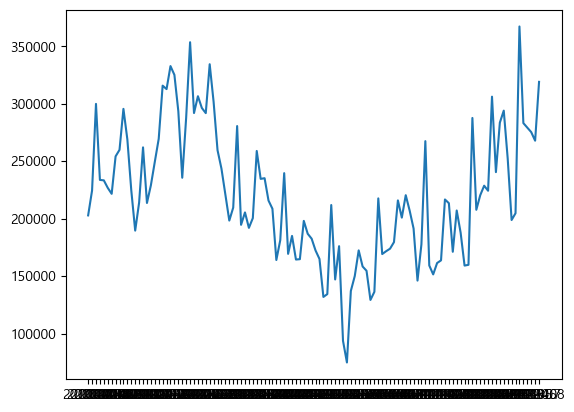

In [16]:
# 시계열 그래프 그리기
plt.plot(df_filter['기준년월'], df_filter['관광'])
plt.show()

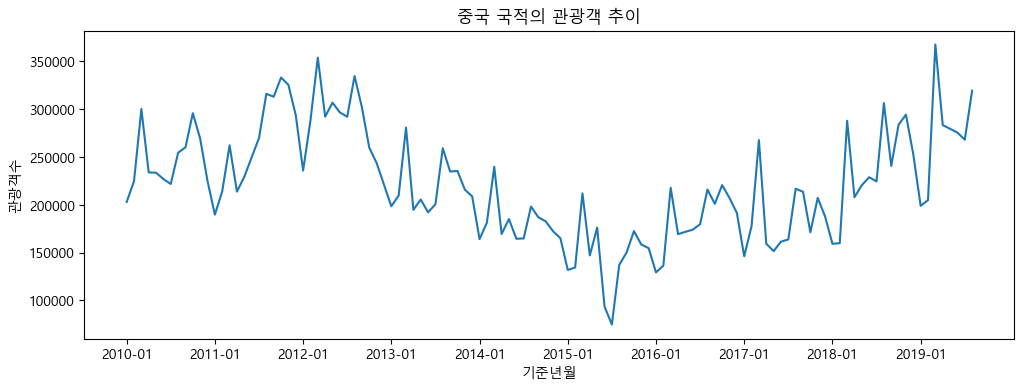

In [17]:
# 그래프 크기 조절
plt.figure(figsize = (12, 4))
# 그래프 내용 설정
plt.plot(df_filter['기준년월'], df_filter['관광'])

# 그래프 타이틀, x축, y축 이름 달기
plt.title('중국 국적의 관광객 추이')
plt.xlabel('기준년월')
plt.ylabel('관광객수')

# x축 눈금값 설정
plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01'])
plt.show()

In [18]:
# 상위 5개국 별로 시계열 그래프 그리기
cntry_list = ['중국', '일본', '대만', '미국', '홍콩']

ConversionError: Failed to convert value(s) to axis units: ['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01']

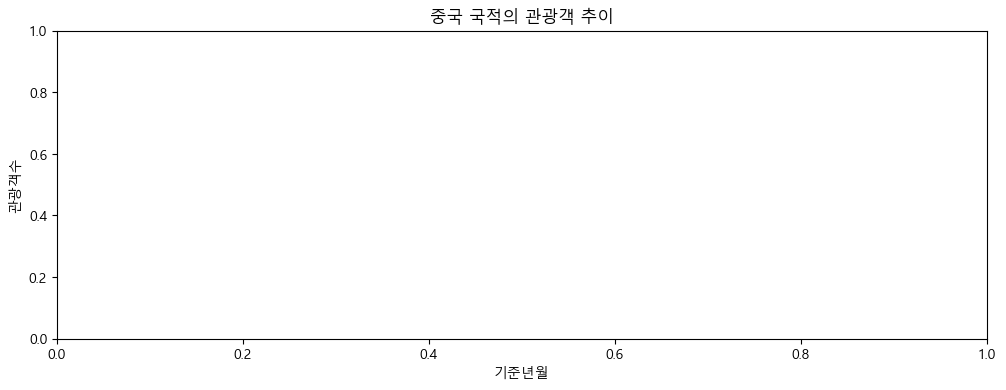

In [19]:
for cntry in cntry_list:
    # 국적 관광객만 추출
    condition = (df['국적'] == cntry)
    df_filter = df[condition]

    # 그래프 그리기
    
    # 그래프 크기 조절
    plt.figure(figsize = (12, 4))
    # 그래프 내용 설정

    # # 그래프 타이틀, x축, y축 이름 달기
    plt.title('{} 국적의 관광객 추이'.format(cntry))
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')

    # # x축 눈금값 설정
    plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01'])
    plt.plot(df_filter['기준년월'], df_filter['관광'])    
    # plt.show()

In [26]:
# 히트맵 그래프 그리기
df['년도'] = df['기준년월'].str.slice(0,4)
df['월'] = df['기준년월'].str.slice(5,7)
df.head()


국적      관광    상용  공용  유학/연수    기타       계     기준년월   대륙  관광객비율(%)  \
0   일본  202825  1750  89    549  3971  209184  2010-01  아시아      97.0   
1   대만   35788    41  17     37   516   36399  2010-01  아시아      98.3   
2   홍콩   13874    55   0     21   595   14545  2010-01  아시아      95.4   
3  마카오     554     0   0      0     0     554  2010-01  아시아     100.0   
4   태국   13374    39  13     53  4335   17814  2010-01  아시아      75.1   

   전체비율(%)    년도   월  
0     50.6  2010  01  
1      8.9  2010  01  
2      3.5  2010  01  
3      0.1  2010  01  
4      3.3  2010  01

In [27]:
condition = (df['국적'] == '중국')
df_filter = df[condition]
df_filter.head()

국적     관광     상용   공용  유학/연수     기타       계     기준년월   대륙  관광객비율(%)  \
17   중국  40425  11930   55   2751  36091   91252  2010-01  아시아      44.3   
77   중국  60590   7907   68  29546  42460  140571  2010-02  아시아      43.1   
137  중국  50330  13549  174  14924  62480  141457  2010-03  아시아      35.6   
197  중국  84252  13306  212   2199  47711  147680  2010-04  아시아      57.1   
257  중국  89056  12325  360   2931  49394  154066  2010-05  아시아      57.8   

     전체비율(%)    년도   월  
17      10.1  2010  01  
77      13.6  2010  02  
137      9.2  2010  03  
197     15.5  2010  04  
257     17.0  2010  05

In [28]:
df_pivot = df_filter.pivot_table(values = '관광',
                                 index = '년도',
                                 columns = '월')
df_pivot

월           01        02        03        04        05        06        07  \
년도                                                                           
2010   40425.0   60590.0   50330.0   84252.0   89056.0   87080.0  122432.0   
2011   55070.0   53863.0   72003.0   86397.0   85668.0  108060.0  170524.0   
2012  106606.0   74895.0  110965.0  166843.0  154841.0  179074.0  258907.0   
2013  148118.0  169395.0  182850.0  250549.0  196306.0  280319.0  417991.0   
2014  230706.0  219533.0  313400.0  429419.0  410971.0  429991.0  540683.0   
2015  327225.0  413096.0  386386.0  536428.0  517154.0  223101.0  172075.0   
2016  456636.0  424232.0  500018.0  601460.0  614636.0  671493.0  823016.0   
2017  489256.0  458952.0  263788.0  158784.0  172527.0  181507.0  207099.0   
2018  236825.0  237075.0  281020.0  283533.0  284317.0  303405.0  332657.0   
2019  320113.0  324291.0  369165.0  410542.0  413949.0  395196.0  439699.0   

월           08        09        10        11        12  
년도                                                      
2010  142180.0   93545.0  107237.0   75686.0   58987.0  
2011  178937.0  144704.0  141824.0  113856.0  101605.0  
2012  268988.0  203857.0  204866.0  155503.0  148320.0  
2013  472005.0  353359.0  249850.0  208175.0  210950.0  
2014  588181.0  423133.0  459708.0  381118.0  345957.0  
2015  372990.0  453670.0  518651.0  409635.0  381722.0  
2016  747818.0  611538.0  588561.0  452082.0  456882.0  
2017  226153.0  229172.0  244541.0  223743.0  260983.0  
2018  360982.0  326438.0  382922.0  327664.0  345135.0  
2019  451570.0       NaN       NaN       NaN       NaN

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

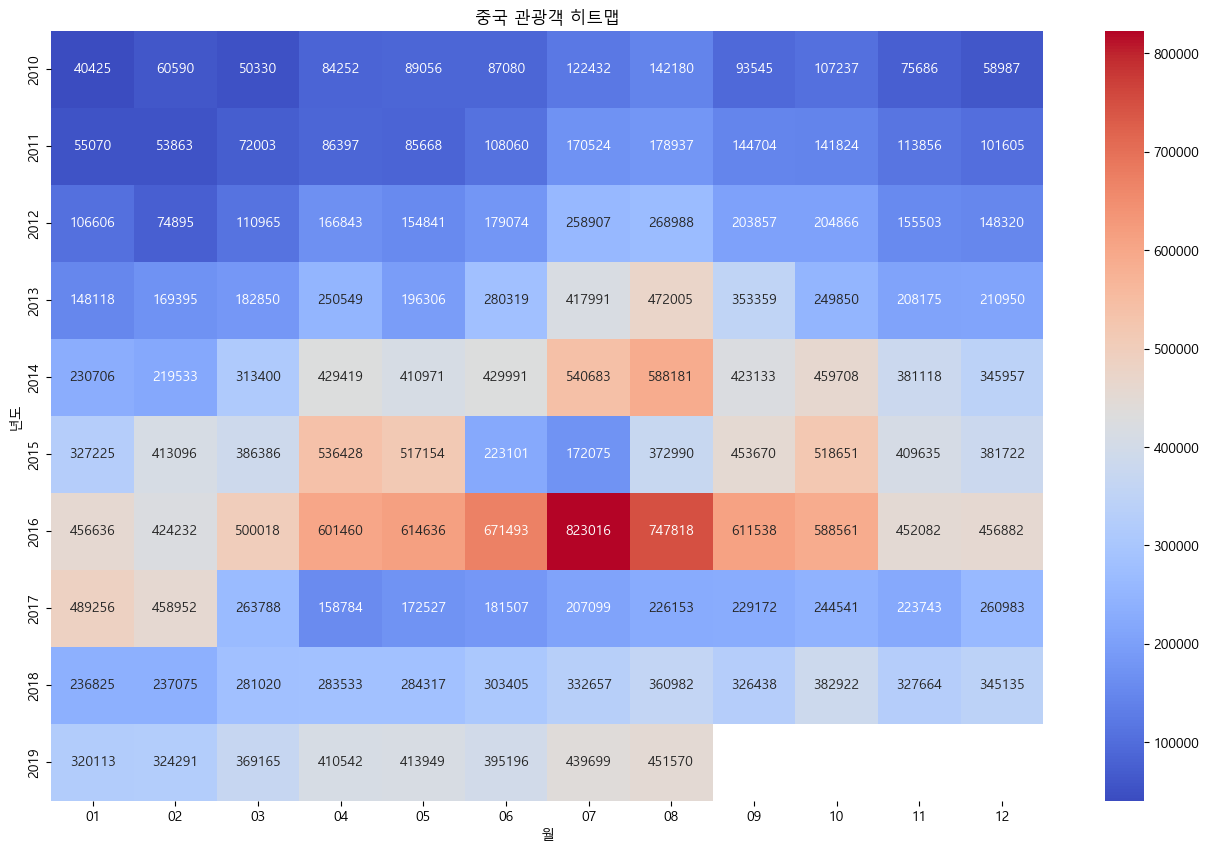

In [36]:
# 그래프 크기 설정
plt.figure(figsize = (16,10))

# 히트맵 그래프 그리기
sns.heatmap(df_pivot, annot = True, fmt = '.0f', cmap = 'coolwarm')

# 그래프 타이틀 달기
plt.title('중국 관광객 히트맵')

#그래프 표현
plt.show()

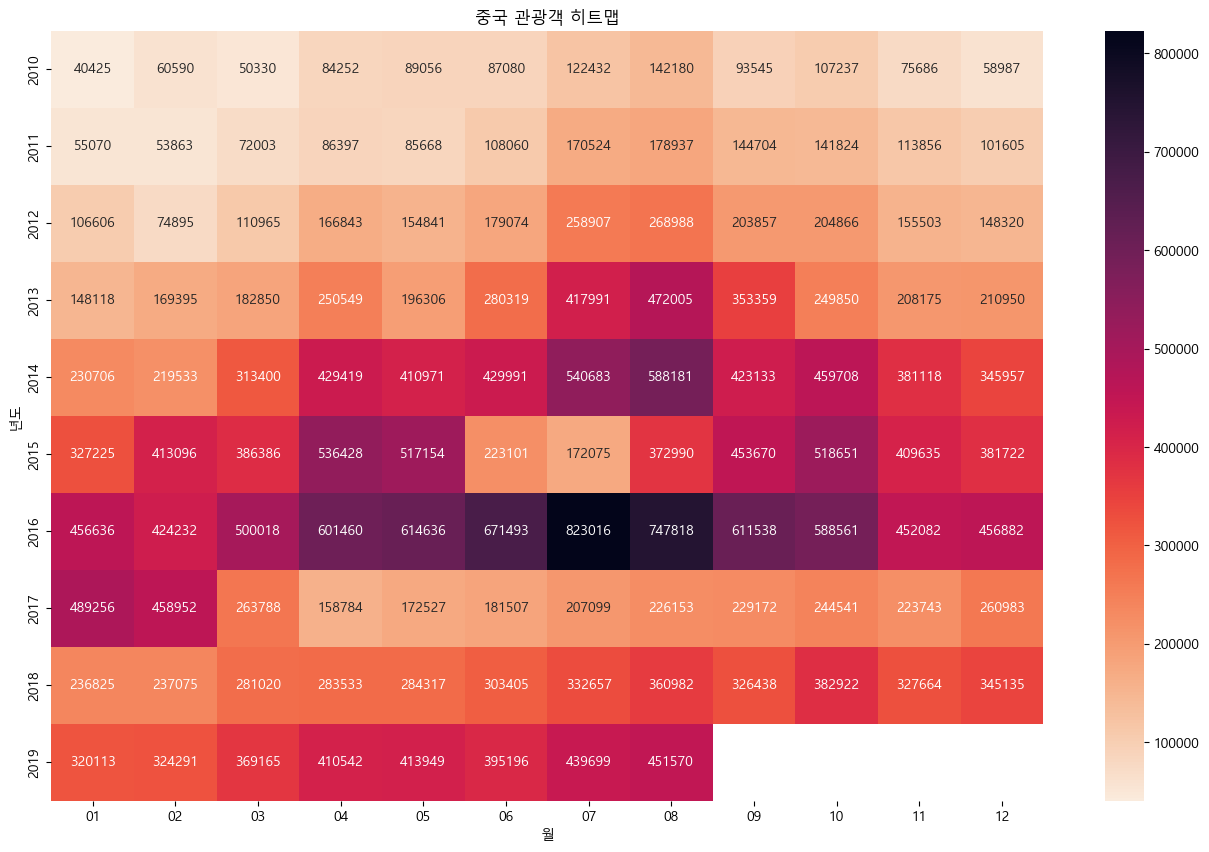

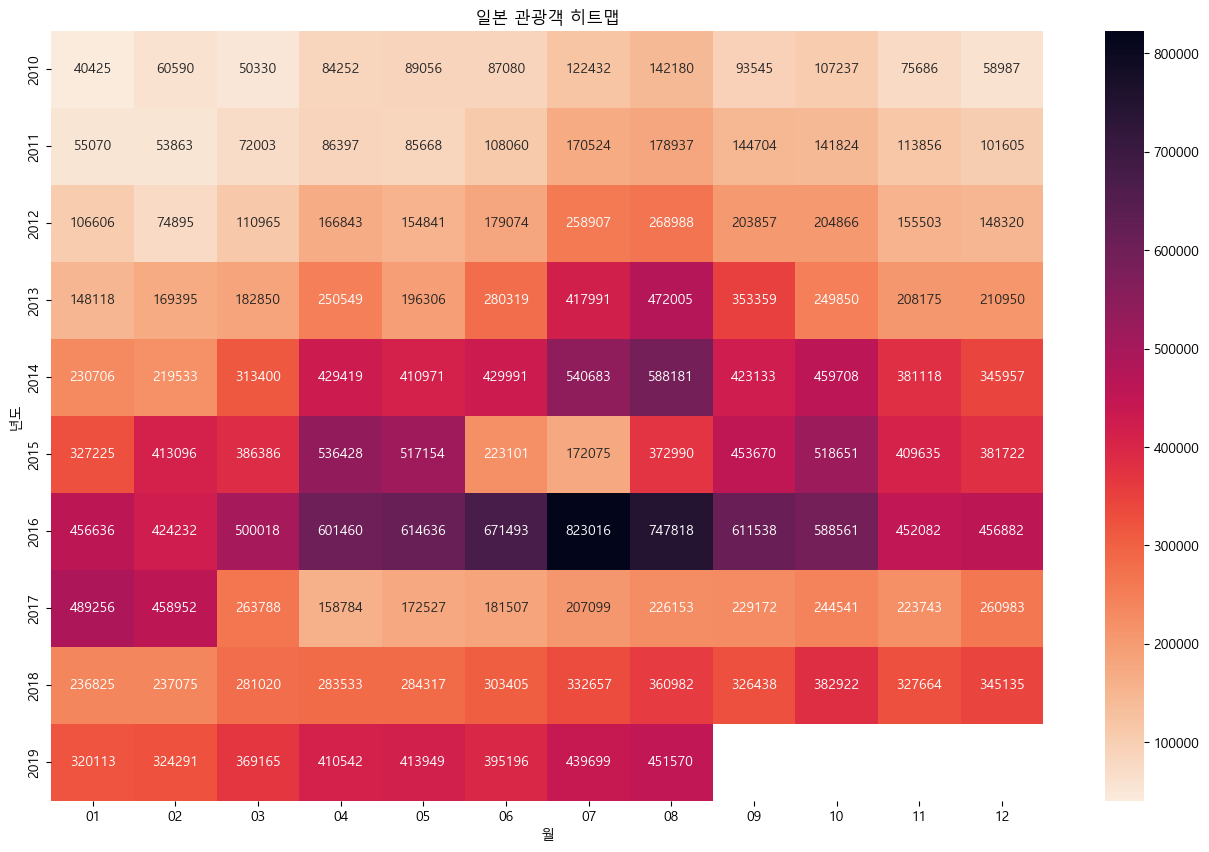

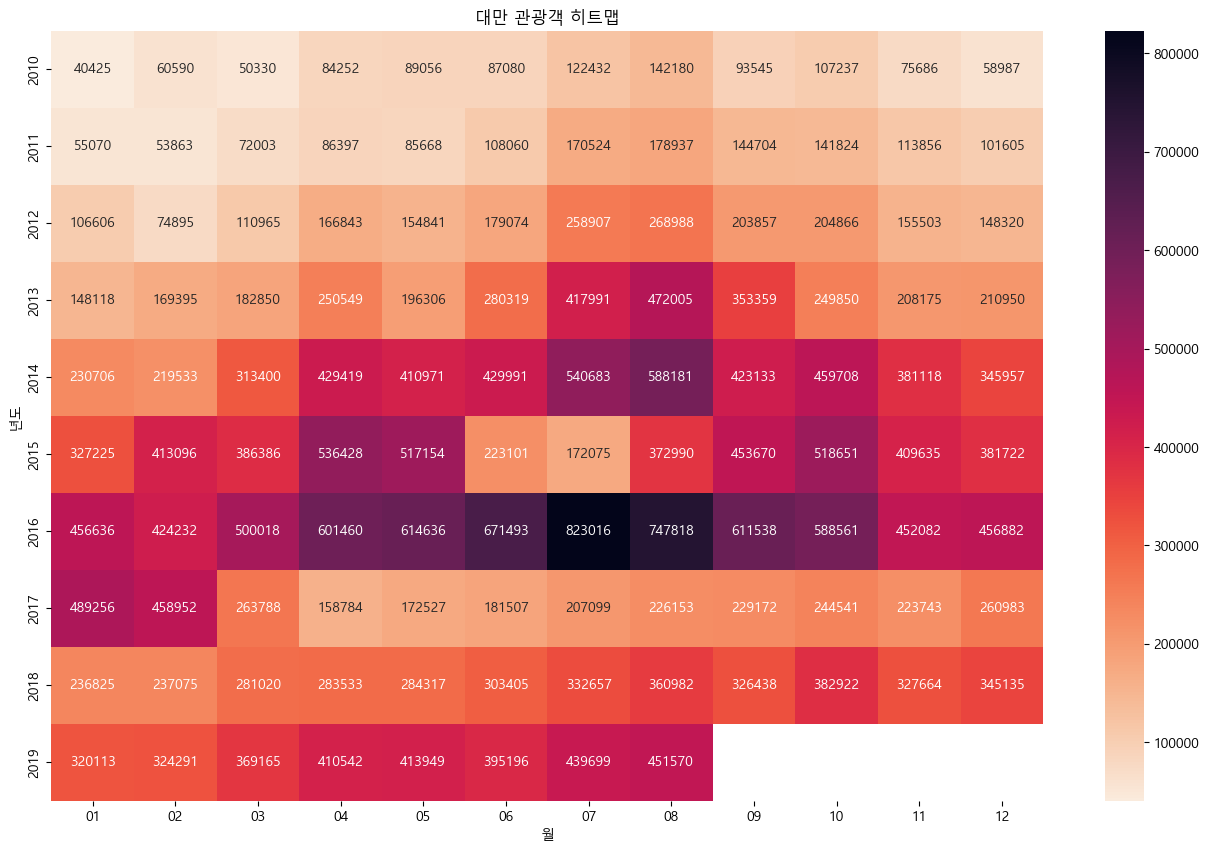

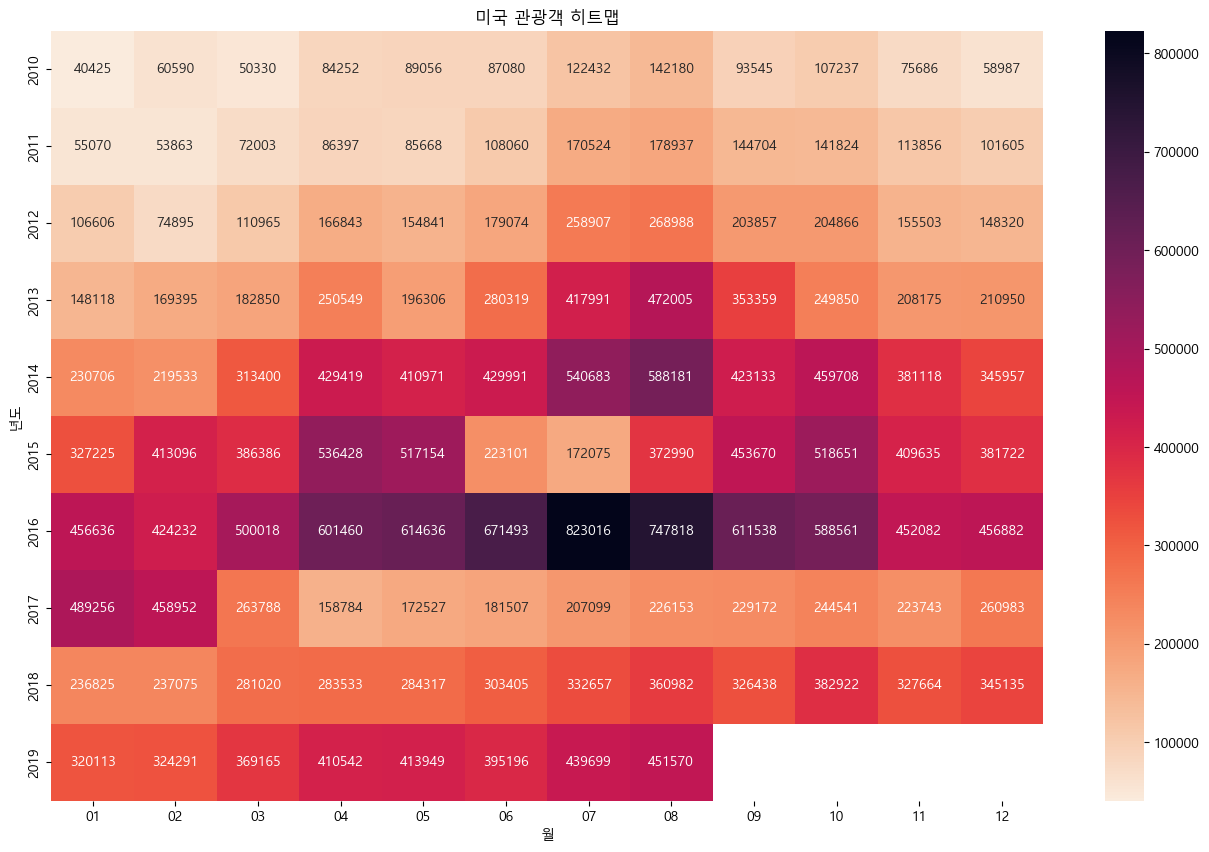

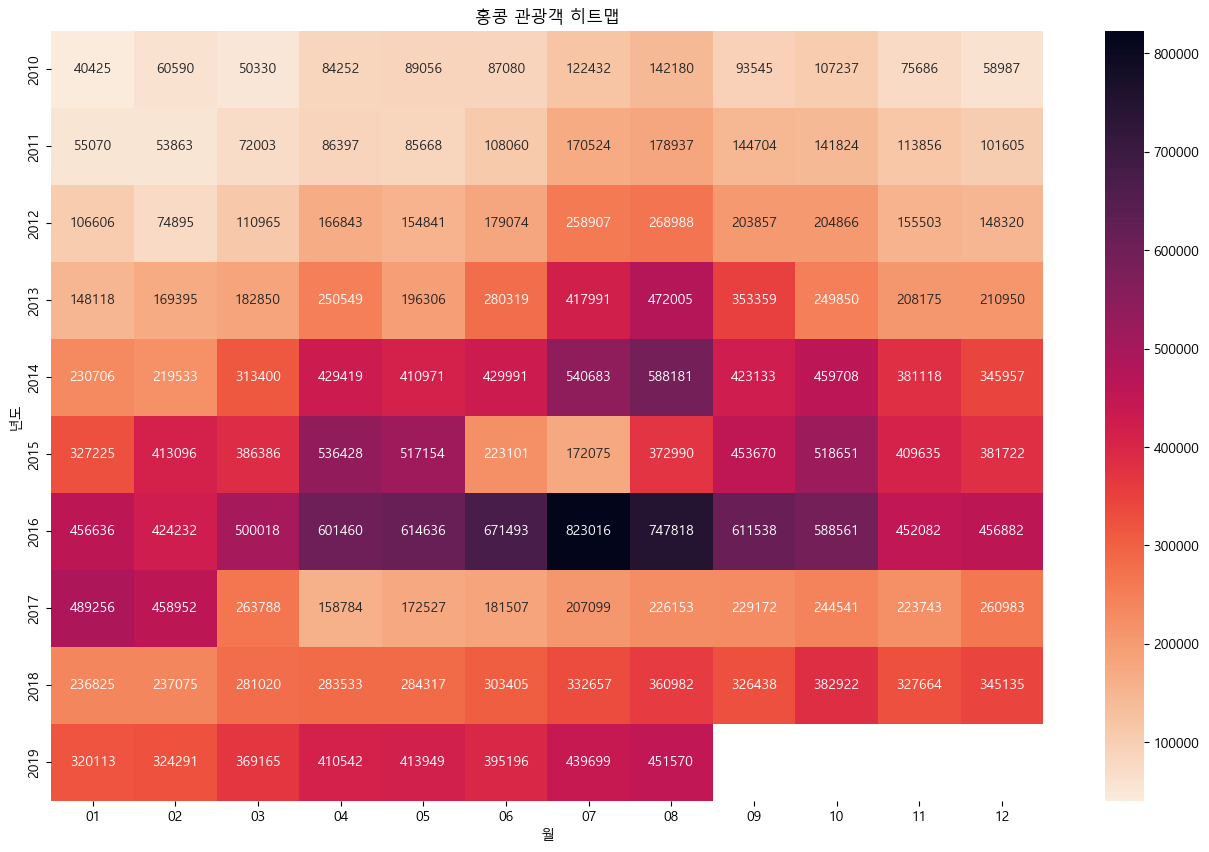

In [39]:
# 반복문으로 상위 5개국에대한 히트맵 그리기
for cntry in cntry_list:
    condition = (df['국적'] == cntry)
    df_filter = df[condition]

    df_filter = df_filter.pivot_table(values = '관광',
                                    index = '년도',
                                    columns = '월')
    # 그래프 크기 설정
    plt.figure(figsize = (16,10))

    # 히트맵 그래프 그리기
    sns.heatmap(df_pivot, annot = True, fmt = '.0f', cmap = 'rocket_r')

    # 그래프 타이틀 달기
    plt.title('{} 관광객 히트맵'.format(cntry))

    plt.show()

In [ ]:
# 3.4 시각화 해석하기


In [ ]:
from selenium import webdriver
driver = webdriver.Chrome('c:/playwithdata/chromedriver.exe')


NoSuchDriverException: Message: Unable to obtain chromedriver using Selenium Manager; 'str' object has no attribute 'capabilities'; For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors/driver_location


In [ ]:
import time
from bs4 import BeautifulSoup
soup = BeautifulSoup(r'C:\Users\mark8\scapy\datasalon\02_개정판\5_Jeju_Hotplace\files\3_jeju_cluster.html', 'html.parser')

first = soup.select('div._9AhH0')
first

C:\Users\mark8\AppData\Local\Temp\ipykernel_21600\3764209797.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(r'C:\Users\mark8\scapy\datasalon\02_개정판\5_Jeju_Hotplace\files\3_jeju_cluster.html', 'html.parser')


[]

In [ ]:
# 수집데이터 워드클라우드로 시각화
import pandas as pd
raw_total = pd.read_excel(r'datasalon/02_개정판/5_Jeju_Hotplace/files/1_crawling_raw.xlsx')
raw_total['tags'][:3]

0    ['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가...
1    ['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#...
2    ['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',...
Name: tags, dtype: object

In [ ]:
tags_total = []

for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '") # 처음 2부터 뒤 -2까지
    print(tags[2:-2])
    print(tags_list)
    for tag in tags_list:
        tags_total.append(tag)
tags_total

#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가볼만한곳', '#제주도핫플', '#제주여행코스', '#제주공항', '#제주도맛집', '#제주맛집', '#제주스냅', '#제주풍경', '#제주사진', '#제주카페', '#제주도카페', '#산굼부리', '#제주도바다', '#귤체험', '#우도', '#제주관광', '#제주도여향지', '#제주여행중', '#삼육오빠', '#제주앓이
['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가볼만한곳', '#제주도핫플', '#제주여행코스', '#제주공항', '#제주도맛집', '#제주맛집', '#제주스냅', '#제주풍경', '#제주사진', '#제주카페', '#제주도카페', '#산굼부리', '#제주도바다', '#귤체험', '#우도', '#제주관광', '#제주도여향지', '#제주여행중', '#삼육오빠', '#제주앓이']
#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#제주맛집', '#여행', '#제주맛집추천', '#맛집추천', '#제주공항', '#제주카페', '#제주디저트맛집', '#제주데이트', '#제주데이트코스', '#제주도여행', '#고집돌우럭', '#중문맛집', '#제주여행중', '#감귤카페', '#제주카페추천', '#제주야시장', '#맛집', '#제주갈만한곳', '#제주관광', '#좋아요반사', '#좋반', '#제주도여행지', '#제주도가볼만한곳', '#제주여행코스
['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#제주맛집', '#여행', '#제주맛집추천', '#맛집추천', '#제주공항', '#제주카페', '#제주디저트맛집', '#제주데이트', '#제주데이트코스', '#제주도여행', '#고집돌우럭', '#중문맛집', '#제주여행중', '#감귤카페', '#제주카페추천', '#제주야시장', '#맛집', '#제주갈만한곳', '#제주관광', '#좋아요반사', '#좋반', '#제주도여행지', '#제주도가볼만한곳',

['#제주핫플레이스',
 '#제주여행',
 '#제주여행',
 '#제주도여행',
 '#제주가볼만한곳',
 '#제주도핫플',
 '#제주여행코스',
 '#제주공항',
 '#제주도맛집',
 '#제주맛집',
 '#제주스냅',
 '#제주풍경',
 '#제주사진',
 '#제주카페',
 '#제주도카페',
 '#산굼부리',
 '#제주도바다',
 '#귤체험',
 '#우도',
 '#제주관광',
 '#제주도여향지',
 '#제주여행중',
 '#삼육오빠',
 '#제주앓이',
 '#제주핫플',
 '#제주여행',
 '#제주',
 '#제주도',
 '#제주도맛집',
 '#제주맛집',
 '#여행',
 '#제주맛집추천',
 '#맛집추천',
 '#제주공항',
 '#제주카페',
 '#제주디저트맛집',
 '#제주데이트',
 '#제주데이트코스',
 '#제주도여행',
 '#고집돌우럭',
 '#중문맛집',
 '#제주여행중',
 '#감귤카페',
 '#제주카페추천',
 '#제주야시장',
 '#맛집',
 '#제주갈만한곳',
 '#제주관광',
 '#좋아요반사',
 '#좋반',
 '#제주도여행지',
 '#제주도가볼만한곳',
 '#제주여행코스',
 '#honestin',
 '#어니스틴',
 '#제주여행',
 '#제주',
 '#제주도',
 '#제주도여행',
 '#제주살이',
 '#제주도민',
 '#제주가볼만한곳',
 '#제주일상',
 '#제주도가볼만한곳',
 '#제주핫플레이스',
 '#제주핫플',
 '#제주라이프',
 '#가을제주',
 '#제주시',
 '#제주여행코스',
 '#제주도핫플',
 '#제주오름',
 '#들렁모루',
 '#비밀의정원',
 '#삼굼부리',
 '#정물오름',
 '#자연생태마을',
 '#오조포구',
 '#올레길',
 '#제주하늘',
 '#제주관광',
 '#11월여행',
 '#제주관광',
 '#제주살이',
 '#제주이주민',
 '#아라동주민',
 '#삼남매집',
 '#새해첫날',
 '#드라이브',
 '#명월국민학교',
 '#낙서',
 '#잡히면죽는다',
 '#제주관광',
 '#제주',
 '#돔나이트',

In [ ]:
from collections import Counter
tags_counts = Counter(tags_total)
tags_counts.most_common(50)

[('#제주맛집', 3750),
 ('#제주도맛집', 3467),
 ('#제주여행', 3204),
 ('#제주관광', 2898),
 ('#제주도', 2096),
 ('#제주', 1567),
 ('#제주도여행', 1555),
 ('#서귀포맛집', 1392),
 ('#제주도가볼만한곳', 1047),
 ('#서귀포', 872),
 ('#제주핫플레이스', 848),
 ('#jeju', 776),
 ('#제주흑돼지맛집', 730),
 ('#제주맛집추천', 728),
 ('#일상', 717),
 ('#제주도흑돼지', 713),
 ('#제주카페', 711),
 ('#제주도흑돼지맛집', 709),
 ('#제주흑돼지', 693),
 ('#협재맛집', 677),
 ('#성산일출봉', 674),
 ('#제주도민', 637),
 ('#제주도그램', 609),
 ('#서귀포흑돼지맛집', 605),
 ('', 588),
 ('#서귀포흑돼지', 582),
 ('#제주가볼만한곳', 580),
 ('#성산일출봉맛집', 567),
 ('#섭지코지', 558),
 ('#제주도민맛집', 542),
 ('#제주핫플', 530),
 ('#선팔', 522),
 ('#섭지코지맛집', 519),
 ('#제주살이', 516),
 ('#여행스타그램', 498),
 ('#통갈치구이', 495),
 ('#제주통갈치구이', 485),
 ('#제주서귀포맛집', 479),
 ('#제주반영구', 478),
 ('#중문맛집', 472),
 ('#제주눈썹문신', 472),
 ('#제주도관광', 471),
 ('#서귀포눈썹문신', 458),
 ('#여행', 455),
 ('#먹스타그램', 453),
 ('#제주시', 451),
 ('#반영구', 443),
 ('#눈썹문신', 443),
 ('#제주자연눈썹', 435),
 ('#제주속눈썹', 435)]

In [ ]:
# 4-14 데이터 정제
STOPWORDS = ['#일상', '#선팔', '#제주도', '#jeju', '#반영구', '#제주자연눈썹', '#서귀포눈썹문신', '#제주눈썹문신', '#소통', '#맞팔']

tag_total_selected = []
for tag in tags_total:
    if tag not in STOPWORDS: # stopwords 제외해서 저장
        tag_total_selected.append(tag)
    
tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(50)


[('#제주맛집', 3750),
 ('#제주도맛집', 3467),
 ('#제주여행', 3204),
 ('#제주관광', 2898),
 ('#제주', 1567),
 ('#제주도여행', 1555),
 ('#서귀포맛집', 1392),
 ('#제주도가볼만한곳', 1047),
 ('#서귀포', 872),
 ('#제주핫플레이스', 848),
 ('#제주흑돼지맛집', 730),
 ('#제주맛집추천', 728),
 ('#제주도흑돼지', 713),
 ('#제주카페', 711),
 ('#제주도흑돼지맛집', 709),
 ('#제주흑돼지', 693),
 ('#협재맛집', 677),
 ('#성산일출봉', 674),
 ('#제주도민', 637),
 ('#제주도그램', 609),
 ('#서귀포흑돼지맛집', 605),
 ('', 588),
 ('#서귀포흑돼지', 582),
 ('#제주가볼만한곳', 580),
 ('#성산일출봉맛집', 567),
 ('#섭지코지', 558),
 ('#제주도민맛집', 542),
 ('#제주핫플', 530),
 ('#섭지코지맛집', 519),
 ('#제주살이', 516),
 ('#여행스타그램', 498),
 ('#통갈치구이', 495),
 ('#제주통갈치구이', 485),
 ('#제주서귀포맛집', 479),
 ('#제주반영구', 478),
 ('#중문맛집', 472),
 ('#제주도관광', 471),
 ('#여행', 455),
 ('#먹스타그램', 453),
 ('#제주시', 451),
 ('#눈썹문신', 443),
 ('#제주속눈썹', 435),
 ('#서귀포남자눈썹문신', 433),
 ('#서귀포자연눈썹', 433),
 ('#제주남자눈썹문신', 433),
 ('#서귀포속눈썹', 433),
 ('#서귀포반영구', 433),
 ('#제주스타그램', 432),
 ('#제주일상', 424),
 ('#애월맛집', 410)]

In [ ]:
##
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

if sys.platform in ['win32', 'win64']:
    font_name = 'malgun gothic'
elif sys.platform == 'darwin':
    font_name = 'AppleGothic'

    
rc('font', family = font_name)

In [ ]:
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(30)) #인자 1개는 값만 넣을경우 
print(tag_counts_df)
tag_counts_df.columns = ['tags', 'counts']
print(tag_counts_df)

            0     1
0       #제주맛집  3750
1      #제주도맛집  3467
2       #제주여행  3204
3       #제주관광  2898
4         #제주  1567
5      #제주도여행  1555
6      #서귀포맛집  1392
7   #제주도가볼만한곳  1047
8        #서귀포   872
9    #제주핫플레이스   848
10   #제주흑돼지맛집   730
11    #제주맛집추천   728
12    #제주도흑돼지   713
13      #제주카페   711
14  #제주도흑돼지맛집   709
15     #제주흑돼지   693
16      #협재맛집   677
17     #성산일출봉   674
18      #제주도민   637
19     #제주도그램   609
20  #서귀포흑돼지맛집   605
21              588
22    #서귀포흑돼지   582
23   #제주가볼만한곳   580
24   #성산일출봉맛집   567
25      #섭지코지   558
26    #제주도민맛집   542
27      #제주핫플   530
28    #섭지코지맛집   519
29      #제주살이   516
         tags  counts
0       #제주맛집    3750
1      #제주도맛집    3467
2       #제주여행    3204
3       #제주관광    2898
4         #제주    1567
5      #제주도여행    1555
6      #서귀포맛집    1392
7   #제주도가볼만한곳    1047
8        #서귀포     872
9    #제주핫플레이스     848
10   #제주흑돼지맛집     730
11    #제주맛집추천     728
12    #제주도흑돼지     713
13      #제주카페     711
14  #제주도흑돼지맛집     709
15     #제주흑돼지     693
16    

In [ ]:
print(tag_counts_df)

         tags  counts
0       #제주맛집    3750
1      #제주도맛집    3467
2       #제주여행    3204
3       #제주관광    2898
4         #제주    1567
5      #제주도여행    1555
6      #서귀포맛집    1392
7   #제주도가볼만한곳    1047
8        #서귀포     872
9    #제주핫플레이스     848
10   #제주흑돼지맛집     730
11    #제주맛집추천     728
12    #제주도흑돼지     713
13      #제주카페     711
14  #제주도흑돼지맛집     709
15     #제주흑돼지     693
16      #협재맛집     677
17     #성산일출봉     674
18      #제주도민     637
19     #제주도그램     609
20  #서귀포흑돼지맛집     605
21                588
22    #서귀포흑돼지     582
23   #제주가볼만한곳     580
24   #성산일출봉맛집     567
25      #섭지코지     558
26    #제주도민맛집     542
27      #제주핫플     530
28    #섭지코지맛집     519
29      #제주살이     516


<AxesSubplot:xlabel='counts', ylabel='tags'>

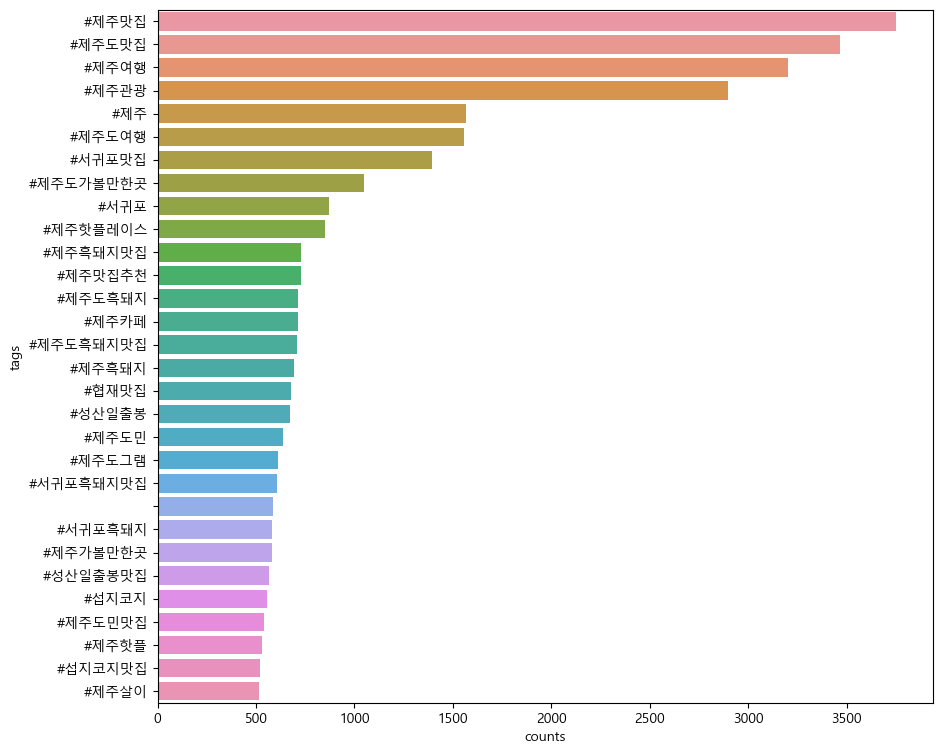

In [ ]:
plt.figure(figsize = (10, 9
                      
                      )) #plt.figure은 차트이미지의 크기 조정함수
sns.barplot(x = 'counts', y = 'tags', data = tag_counts_df)

In [ ]:
pip install wordcloud


     ---------------------------------------- 0.0/152.1 kB ? eta -:--:--
     -------------------------------------- 152.1/152.1 kB 4.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import platform

In [ ]:
!apt-get updatde -qq
!apt-get install fonts-nanum* -qq

'apt-get'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


'apt-get'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [ ]:
WordCloud = WordCloud(font_path = 'font/NanumPen.ttf',
                background_color='white',
                      max_words = 100,
                            relative_scaling=0.3,
                                  width = 800,
                                        height = 400).generate(txt)

NameError: name 'txt' is not defined

In [ ]:
import pandas as pd
raw_total = pd.read_excel(r'C:\Users\mark8\scapy\datasalon\02_개정판\5_Jeju_Hotplace\files\1_crawling_raw.xlsx')
raw_total.head()

content        date   like  \
0  더 늦기전에 제주도로 떠나쟈😍.#제주핫플레이스 간단히 1탄 모아봄!#제주여행 요 필...  2018-12-07  1,402   
1  12월에 제주도를 가야하는이유🍊.#제주핫플 모음 끝판왕😍이거 하나면 겨울 #제주여행...  2018-12-03    368   
2  11월 놓치지 말아야 할 제주 관광.가을바람이 최고조에 이르는 11월추운 겨울을 앞...  2018-11-02    166   
3  국민학교세대#제주관광#제주살이#제주이주민#아라동주민#삼남매집 #새해첫날#드라이브#명...  2019-01-01     28   
4  #제주관광 #제주 #돔나이트 #스트레스 #풀자 #춤추며 #땀날려 #가끔은괜찮아 #인...  2019-01-01     12   

    place                                               tags  
0     NaN  ['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가...  
1     NaN  ['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#...  
2     NaN  ['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',...  
3  명월국민학교  ['#제주관광', '#제주살이', '#제주이주민', '#아라동주민', '#삼남매집'...  
4     NaN  ['#제주관광', '#제주', '#돔나이트', '#스트레스', '#풀자', '#춤추...

In [ ]:
location_counts = raw_total['place'].value_counts()
location_counts

Jeju                    271
Jeju-do                 179
Jungle Book by Alice    108
Seogwipo                 66
제주도 크리스마스 박물관            59
                       ... 
제주마당                      1
형제섬                       1
동복해녀식당                    1
종로 광장시장                   1
디스이즈핫                     1
Name: place, Length: 1028, dtype: int64

In [ ]:
location_counts_df = pd.DataFrame(location_counts)
location_counts_df.head()

place
Jeju                    271
Jeju-do                 179
Jungle Book by Alice    108
Seogwipo                 66
제주도 크리스마스 박물관            59

In [ ]:
location_counts_df.to_excel('./3_3_location_counts.xlsx')

In [ ]:
locations = list(location_counts.index)
locations

['Jeju',
 'Jeju-do',
 'Jungle Book by Alice',
 'Seogwipo',
 '제주도 크리스마스 박물관',
 '할로비치',
 '제주에인감귤밭',
 'Jeju Island',
 '성산일출봉 城山日出峰  Seongsan Ilchulbong',
 '폼포코식당_pompokokitchen',
 '1100고지',
 'Nimome',
 '월정리해변',
 '고집돌우럭중문점',
 '석부작박물관',
 '제주도 애월읍',
 '알뜨르 비행장',
 '카멜리아 힐',
 '제주레포츠랜드',
 '밥깡패',
 '제주 함덕 서우봉 해변',
 '제주도 서귀포 중문관광단지 濟州島西歸浦中文觀光團地',
 '제주고궁한복카페 jeju gogung hanbok studio',
 '위미동백나무군락지',
 '제주신화월드 Jeju Shinhwa World',
 'Woljeongri Beach',
 '협재해변 Beach',
 '연동 바오젠 거리',
 '김녕미로공원 Jeju Kimnyoung Maze Park',
 '고래배꼽',
 '제주 성산 신산포구자연산횟집 회포장',
 '새별오름',
 '용머리해안',
 '용눈이오름',
 '캔디원',
 '사려니숲길',
 '하이엔드 제주',
 '제주빅볼랜드',
 '서귀포 느영나영 게스트하우스',
 '휴애리 자연생활공원',
 '옹포리',
 '삼무공원',
 '마마뜰',
 '제주어린왕자게스트하우스',
 '위미동백나무군락',
 '제주커피박물관 Baum',
 'Jeju Aewol',
 '한라산',
 '위미2리 동백군락지',
 'Jeju Island 제주특별자치도 济州道',
 '광치기해변',
 '서우봉',
 '제주해남',
 '한라산 (漢拏山, Hallasan)',
 '카페한라산',
 '성이시돌목장',
 '제주 송악산',
 '옹포별장가든',
 '월정리카페콧수염',
 '牛岛 Udo Island 우도',
 '곽지해수욕장',
 '카페브리프',
 '아줄레주',
 '에코랜드',
 '산굼부리',
 '제주 꿈꾸는고래 스쿠버&게스트하우스',
 'Terarosa - 테라로사',

# 5장 입지분석

In [17]:
# 파이썬을 이용해 매장목록 데이터 수집
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import urllib.request as req
url1 = 'https://www.starbucks.co.kr/store/store_map.do'

# HTML 분석하기


url = '''
    <article style="display: block;">
												<div class="loca_step1" style="display: none;">
													<div class="loca_step1_ttl">STEP 1 : 시/도를 선택해 주세요.</div>
													<div class="loca_step1_cont">
														<ul class="sido_arae_box"><li><a href="javascript:void(0);" class="set_sido_cd_btn" data-sidocd="01">서울</a></li><li><a href="javascript:void(0);" class="set_sido_cd_btn" data-sidocd="08">경기</a></li><li><a href="javascript:void(0);" class="set_sido_cd_btn" data-sidocd="02">광주</a></li><li><a href="javascript:void(0);" class="set_sido_cd_btn" data-sidocd="03">대구</a></li><li><a href="javascript:void(0);" class="set_sido_cd_btn" data-sidocd="04">대전</a></li><li><a href="javascript:void(0);" class="set_sido_cd_btn" data-sidocd="05">부산</a></li><li><a href="javascript:void(0);" class="set_sido_cd_btn" data-sidocd="06">울산</a></li><li><a href="javascript:void(0);" class="set_sido_cd_btn" data-sidocd="07">인천</a></li><li><a href="javascript:void(0);" class="set_sido_cd_btn" data-sidocd="09">강원</a></li><li><a href="javascript:void(0);" class="set_sido_cd_btn" data-sidocd="10">경남</a></li><li><a href="javascript:void(0);" class="set_sido_cd_btn" data-sidocd="11">경북</a></li><li><a href="javascript:void(0);" class="set_sido_cd_btn" data-sidocd="12">전남</a></li><li><a href="javascript:void(0);" class="set_sido_cd_btn" data-sidocd="13">전북</a></li><li><a href="javascript:void(0);" class="set_sido_cd_btn" data-sidocd="14">충남</a></li><li><a href="javascript:void(0);" class="set_sido_cd_btn" data-sidocd="15">충북</a></li><li><a href="javascript:void(0);" class="set_sido_cd_btn" data-sidocd="16">제주</a></li><li><a href="javascript:void(0);" class="set_sido_cd_btn" data-sidocd="17">세종</a></li></ul>
													</div>
												</div>
												<div class="loca_step2" style="display: none;">
													<div class="loca_step2_ttl">STEP 2 : 구/군을 선택해 주세요.</div>
													<div class="result_num_wrap3"><a class="btn_prev" href="javascript:void(0);">앞으로</a><strong class="sidoSelectName">서울</strong></div>
													<div class="loca_step2_cont">
														<div class="loca_step2_frame scrollbar-inner mCustomScrollbar _mCS_2 mCS_no_scrollbar"><div id="mCSB_2" class="mCustomScrollBox mCS-light mCSB_vertical mCSB_inside" tabindex="0"><div id="mCSB_2_container" class="mCSB_container mCS_y_hidden mCS_no_scrollbar_y" style="position:relative; top:0; left:0;" dir="ltr">
															<ul class="gugun_arae_box"><li><a href="javascript:void(0);" class="set_gugun_cd_btn" data-sidocd="01" data-sidonm="서울" data-guguncd="">전체</a></li><li><a href="javascript:void(0);" class="set_gugun_cd_btn" data-sidocd="01" data-sidonm="서울" data-guguncd="0101">강남구</a></li><li><a href="javascript:void(0);" class="set_gugun_cd_btn" data-sidocd="01" data-sidonm="서울" data-guguncd="0120">강동구</a></li><li><a href="javascript:void(0);" class="set_gugun_cd_btn" data-sidocd="01" data-sidonm="서울" data-guguncd="0102">강북구</a></li><li><a href="javascript:void(0);" class="set_gugun_cd_btn" data-sidocd="01" data-sidonm="서울" data-guguncd="0103">강서구</a></li><li><a href="javascript:void(0);" class="set_gugun_cd_btn" data-sidocd="01" data-sidonm="서울" data-guguncd="0104">관악구</a></li><li><a href="javascript:void(0);" class="set_gugun_cd_btn" data-sidocd="01" data-sidonm="서울" data-guguncd="0105">광진구</a></li><li><a href="javascript:void(0);" class="set_gugun_cd_btn" data-sidocd="01" data-sidonm="서울" data-guguncd="0121">구로구</a></li><li><a href="javascript:void(0);" class="set_gugun_cd_btn" data-sidocd="01" data-sidonm="서울" data-guguncd="0106">금천구</a></li><li><a href="javascript:void(0);" class="set_gugun_cd_btn" data-sidocd="01" data-sidonm="서울" data-guguncd="0107">노원구</a></li><li><a href="javascript:void(0);" class="set_gugun_cd_btn" data-sidocd="01" data-sidonm="서울" data-guguncd="0108">도봉구</a></li><li><a href="javascript:void(0);" class="set_gugun_cd_btn" data-sidocd="01" data-sidonm="서울" data-guguncd="0122">동대문구</a></li><li><a href="javascript:void(0);" class="set_gugun_cd_btn" data-sidocd="01" data-sidonm="서울" data-guguncd="0109">동작구</a></li><li><a href="javascript:void(0);" class="set_gugun_cd_btn" data-sidocd="01" data-sidonm="서울" data-guguncd="0110">마포구</a></li><li><a href="javascript:void(0);" class="set_gugun_cd_btn" data-sidocd="01" data-sidonm="서울" data-guguncd="0111">서대문구</a></li><li><a href="javascript:void(0);" class="set_gugun_cd_btn" data-sidocd="01" data-sidonm="서울" data-guguncd="0112">서초구</a></li><li><a href="javascript:void(0);" class="set_gugun_cd_btn" data-sidocd="01" data-sidonm="서울" data-guguncd="0123">성동구</a></li><li><a href="javascript:void(0);" class="set_gugun_cd_btn" data-sidocd="01" data-sidonm="서울" data-guguncd="0113">성북구</a></li><li><a href="javascript:void(0);" class="set_gugun_cd_btn" data-sidocd="01" data-sidonm="서울" data-guguncd="0114">송파구</a></li><li><a href="javascript:void(0);" class="set_gugun_cd_btn" data-sidocd="01" data-sidonm="서울" data-guguncd="0115">양천구</a></li><li><a href="javascript:void(0);" class="set_gugun_cd_btn" data-sidocd="01" data-sidonm="서울" data-guguncd="0116">영등포구</a></li><li><a href="javascript:void(0);" class="set_gugun_cd_btn" data-sidocd="01" data-sidonm="서울" data-guguncd="0124">용산구</a></li><li><a href="javascript:void(0);" class="set_gugun_cd_btn" data-sidocd="01" data-sidonm="서울" data-guguncd="0117">은평구</a></li><li><a href="javascript:void(0);" class="set_gugun_cd_btn" data-sidocd="01" data-sidonm="서울" data-guguncd="0118">종로구</a></li><li><a href="javascript:void(0);" class="set_gugun_cd_btn" data-sidocd="01" data-sidonm="서울" data-guguncd="0119">중구</a></li><li><a href="javascript:void(0);" class="set_gugun_cd_btn" data-sidocd="01" data-sidonm="서울" data-guguncd="0125">중랑구</a></li></ul>
														</div><div id="mCSB_2_scrollbar_vertical" class="mCSB_scrollTools mCSB_2_scrollbar mCS-light mCSB_scrollTools_vertical" style="display: none;"><div class="mCSB_draggerContainer"><div id="mCSB_2_dragger_vertical" class="mCSB_dragger" style="position: absolute; min-height: 30px; top: 0px; display: block; height: 363px; max-height: 430px;" oncontextmenu="return false;"><div class="mCSB_dragger_bar" style="line-height: 30px;"></div></div><div class="mCSB_draggerRail"></div></div></div></div></div>
													</div>
												</div>
												<div class="loca_step3" style="display: block;">
													<div class="result_num_wrap">
														<!-- 검색결과 없는 경우 -->
														<!--strong>검색 결과</strong>(<span class="en t_006633">0</span>개)-->
														<!-- 검색결과 있는 경우 -->
														<strong class="gugunSelectName">서울 전체</strong> (검색 결과 <span class="en t_006633 sidoSetResult">601</span>개)
													</div>
													<div class="result_list_wrap">
														<!-- 검색결과 없는 경우 -->
														<!--p class="no_result">검색 결과가 없습니다.</p-->
														<!-- 검색결과 있는 경우 -->
														<div class="result_list scrollbar-inner mCustomScrollbar _mCS_3"><div id="mCSB_3" class="mCustomScrollBox mCS-light mCSB_vertical mCSB_inside" tabindex="0"><div id="mCSB_3_container" class="mCSB_container" style="position: relative; top: 0px; left: 0px;" dir="ltr">
															<ul class="quickSearchResultBoxSidoGugun"><li class="quickResultLstCon" style="background:#fff" data-lat="37.501087" data-long="127.043069" data-index="0" data-name="역삼아레나빌딩" data-code="3762" data-storecd="1509" data-hlytag="null">	<strong data-store="1509" data-yn="N" data-name="역삼아레나빌딩" data-my_siren_order_store_yn="N">역삼아레나빌딩  </strong>	<p class="result_details">서울특별시 강남구 언주로 425 (역삼동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.510178" data-long="127.022223" data-index="1" data-name="논현역사거리" data-code="3672" data-storecd="1434" data-hlytag="null">	<strong data-store="1434" data-yn="N" data-name="논현역사거리" data-my_siren_order_store_yn="N">논현역사거리  </strong>	<p class="result_details">서울특별시 강남구 강남대로 538 (논현동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5139309" data-long="127.0206057" data-index="2" data-name="신사역성일빌딩" data-code="3858" data-storecd="1595" data-hlytag="null">	<strong data-store="1595" data-yn="N" data-name="신사역성일빌딩" data-my_siren_order_store_yn="N">신사역성일빌딩  </strong>	<p class="result_details">서울특별시 강남구 강남대로 584 (논현동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.499517" data-long="127.031495" data-index="3" data-name="국기원사거리" data-code="3669" data-storecd="1527" data-hlytag="null">	<strong data-store="1527" data-yn="N" data-name="국기원사거리" data-my_siren_order_store_yn="N">국기원사거리  </strong>	<p class="result_details">서울특별시 강남구 테헤란로 125 (역삼동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.494668" data-long="127.062583" data-index="4" data-name="대치재경빌딩R" data-code="3703" data-storecd="1468" data-hlytag="null">	<strong data-store="1468" data-yn="N" data-name="대치재경빌딩R" data-my_siren_order_store_yn="N">대치재경빌딩R  </strong>	<p class="result_details">서울특별시 강남구 남부순환로 2947 (대치동)<br>1522-3232</p>	<i class="pin_reserve">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.515000" data-long="127.063196" data-index="5" data-name="봉은사역" data-code="3912" data-storecd="1640" data-hlytag="null">	<strong data-store="1640" data-yn="N" data-name="봉은사역" data-my_siren_order_store_yn="N">봉은사역  </strong>	<p class="result_details">서울특별시 강남구 봉은사로 619 (삼성동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5227934" data-long="127.0286009" data-index="6" data-name="압구정윤성빌딩" data-code="3893" data-storecd="1650" data-hlytag="null">	<strong data-store="1650" data-yn="N" data-name="압구정윤성빌딩" data-my_siren_order_store_yn="N">압구정윤성빌딩  </strong>	<p class="result_details">서울특별시 강남구 논현로 834 (신사동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.510150" data-long="127.060275" data-index="7" data-name="코엑스별마당" data-code="3897" data-storecd="1626" data-hlytag="null">	<strong data-store="1626" data-yn="N" data-name="코엑스별마당" data-my_siren_order_store_yn="N">코엑스별마당  </strong>	<p class="result_details">서울특별시 강남구 영동대로 513 (삼성동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.507750" data-long="127.060651" data-index="8" data-name="삼성역섬유센터R" data-code="3648" data-storecd="1438" data-hlytag="null">	<strong data-store="1438" data-yn="N" data-name="삼성역섬유센터R" data-my_siren_order_store_yn="N">삼성역섬유센터R  </strong>	<p class="result_details">서울특별시 강남구 테헤란로 518 (대치동)<br>1522-3232</p>	<i class="pin_reserve">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5273669" data-long="127.033061" data-index="9" data-name="압구정R" data-code="3623" data-storecd="1411" data-hlytag="null">	<strong data-store="1411" data-yn="N" data-name="압구정R" data-my_siren_order_store_yn="N">압구정R  </strong>	<p class="result_details">서울특별시 강남구 언주로 861 (신사동)<br>1522-3232</p>	<i class="pin_reserve">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.488008" data-long="127.102650" data-index="10" data-name="수서역R" data-code="3588" data-storecd="1389" data-hlytag="null">	<strong data-store="1389" data-yn="N" data-name="수서역R" data-my_siren_order_store_yn="N">수서역R  </strong>	<p class="result_details">서울특별시 강남구 광평로 281 (수서동)<br>1522-3232</p>	<i class="pin_reserve">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.485192" data-long="127.036685" data-index="11" data-name="양재강남빌딩R" data-code="3604" data-storecd="1404" data-hlytag="null">	<strong data-store="1404" data-yn="N" data-name="양재강남빌딩R" data-my_siren_order_store_yn="N">양재강남빌딩R  </strong>	<p class="result_details">서울특별시 강남구 남부순환로 2621 (도곡동)<br>1522-3232</p>	<i class="pin_reserve">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.505321" data-long="127.050409" data-index="12" data-name="선릉동신빌딩R" data-code="3562" data-storecd="1355" data-hlytag="null">	<strong data-store="1355" data-yn="N" data-name="선릉동신빌딩R" data-my_siren_order_store_yn="N">선릉동신빌딩R  </strong>	<p class="result_details">서울특별시 강남구 테헤란로 409 (삼성동)<br>1522-3232</p>	<i class="pin_reserve">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.511293" data-long="127.048409" data-index="13" data-name="봉은사로선정릉" data-code="3564" data-storecd="1348" data-hlytag="null">	<strong data-store="1348" data-yn="N" data-name="봉은사로선정릉" data-my_siren_order_store_yn="N">봉은사로선정릉  </strong>	<p class="result_details">서울특별시 강남구 봉은사로 446 (삼성동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.502117" data-long="127.026672" data-index="14" data-name="강남오거리" data-code="3483" data-storecd="1255" data-hlytag="null">	<strong data-store="1255" data-yn="N" data-name="강남오거리" data-my_siren_order_store_yn="N">강남오거리  </strong>	<p class="result_details">서울특별시 강남구 봉은사로2길 39 (역삼동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.50999" data-long="127.061455" data-index="15" data-name="스타필드코엑스몰R" data-code="3467" data-storecd="1211" data-hlytag="null">	<strong data-store="1211" data-yn="N" data-name="스타필드코엑스몰R" data-my_siren_order_store_yn="N">스타필드코엑스몰R  </strong>	<p class="result_details">서울특별시 강남구 영동대로 513 (삼성동) 코엑스 A106호<br>1522-3232</p>	<i class="pin_reserve">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.518181" data-long="127.045995" data-index="16" data-name="강남구청정문" data-code="3397" data-storecd="1188" data-hlytag="null">	<strong data-store="1188" data-yn="N" data-name="강남구청정문" data-my_siren_order_store_yn="N">강남구청정문  </strong>	<p class="result_details">서울특별시 강남구 학동로 419 (청담동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.492805" data-long="127.041309" data-index="17" data-name="도곡공원" data-code="3496" data-storecd="1263" data-hlytag="null">	<strong data-store="1263" data-yn="N" data-name="도곡공원" data-my_siren_order_store_yn="N">도곡공원  </strong>	<p class="result_details">서울특별시 강남구 도곡로 205 (역삼동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.497711" data-long="127.028439" data-index="18" data-name="강남R" data-code="3478" data-storecd="1258" data-hlytag="null">	<strong data-store="1258" data-yn="N" data-name="강남R" data-my_siren_order_store_yn="N">강남R  </strong>	<p class="result_details">서울특별시 강남구 강남대로 390 (역삼동)<br>1522-3232</p>	<i class="pin_reserve">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.498973" data-long="127.060172" data-index="19" data-name="대치은마사거리" data-code="3315" data-storecd="1099" data-hlytag="null">	<strong data-store="1099" data-yn="N" data-name="대치은마사거리" data-my_siren_order_store_yn="N">대치은마사거리  </strong>	<p class="result_details">서울특별시 강남구 도곡로 457 (대치동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.522156" data-long="127.056449" data-index="20" data-name="청담영동대로" data-code="3370" data-storecd="1154" data-hlytag="null">	<strong data-store="1154" data-yn="N" data-name="청담영동대로" data-my_siren_order_store_yn="N">청담영동대로  </strong>	<p class="result_details">서울특별시 강남구 영동대로 720 (청담동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.526283" data-long="127.02956" data-index="21" data-name="압구정" data-code="3303" data-storecd="1084" data-hlytag="null">	<strong data-store="1084" data-yn="N" data-name="압구정" data-my_siren_order_store_yn="N">압구정  </strong>	<p class="result_details">서울특별시 강남구 압구정로30길 17 (신사동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.521933" data-long="127.022521" data-index="22" data-name="신사가로수" data-code="3355" data-storecd="1159" data-hlytag="null">	<strong data-store="1159" data-yn="N" data-name="신사가로수" data-my_siren_order_store_yn="N">신사가로수  </strong>	<p class="result_details">서울특별시 강남구 가로수길 59 <br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.525216" data-long="127.041827" data-index="23" data-name="청담스타R" data-code="3366" data-storecd="1146" data-hlytag="null">	<strong data-store="1146" data-yn="N" data-name="청담스타R" data-my_siren_order_store_yn="N">청담스타R  </strong>	<p class="result_details">서울특별시 강남구 도산대로57길 24 (청담동)<br>1522-3232</p>	<i class="pin_reserve">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.492396" data-long="127.03091" data-index="24" data-name="강남우성" data-code="3346" data-storecd="1129" data-hlytag="null">	<strong data-store="1129" data-yn="N" data-name="강남우성" data-my_siren_order_store_yn="N">강남우성  </strong>	<p class="result_details">서울특별시 강남구 강남대로 328 (역삼동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.52236449999999" data-long="127.03795430000002" data-index="25" data-name="학동사거리" data-code="3171" data-storecd="991" data-hlytag="null">	<strong data-store="991" data-yn="N" data-name="학동사거리" data-my_siren_order_store_yn="N">학동사거리  </strong>	<p class="result_details">서울특별시 강남구 도산대로 328 (논현동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.503331" data-long="127.058817" data-index="26" data-name="대치사거리" data-code="3287" data-storecd="1062" data-hlytag="null">	<strong data-store="1062" data-yn="N" data-name="대치사거리" data-my_siren_order_store_yn="N">대치사거리  </strong>	<p class="result_details">서울특별시 강남구 삼성로 402 (대치동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5075307" data-long="127.05742710000004" data-index="27" data-name="포스코사거리" data-code="3235" data-storecd="1038" data-hlytag="null">	<strong data-store="1038" data-yn="N" data-name="포스코사거리" data-my_siren_order_store_yn="N">포스코사거리  </strong>	<p class="result_details">서울특별시 강남구 테헤란로 505 (삼성동) 화진빌딩<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5191632" data-long="127.0286446" data-index="28" data-name="을지병원사거리" data-code="3096" data-storecd="914" data-hlytag="null">	<strong data-store="914" data-yn="N" data-name="을지병원사거리" data-my_siren_order_store_yn="N">을지병원사거리  </strong>	<p class="result_details">서울특별시 강남구 논현로 752 (논현동,구산빌딩)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5162021" data-long="127.0207428" data-index="29" data-name="신사역" data-code="3048" data-storecd="863" data-hlytag="null">	<strong data-store="863" data-yn="N" data-name="신사역" data-my_siren_order_store_yn="N">신사역  </strong>	<p class="result_details">서울특별시 강남구 도산대로 108 (논현동) 렉스타워<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.492167" data-long="127.057398" data-index="30" data-name="도곡역" data-code="3009" data-storecd="825" data-hlytag="null">	<strong data-store="825" data-yn="N" data-name="도곡역" data-my_siren_order_store_yn="N">도곡역  </strong>	<p class="result_details">서울특별시 강남구 남부순환로 2909 (대치동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.514887" data-long="127.035653" data-index="31" data-name="서울세관사거리" data-code="9998" data-storecd="815" data-hlytag="null">	<strong data-store="815" data-yn="N" data-name="서울세관사거리" data-my_siren_order_store_yn="N">서울세관사거리  </strong>	<p class="result_details">서울특별시 강남구 언주로 650 (논현동) 한국건설기술인협회<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5236351" data-long="127.04686509999999" data-index="32" data-name="청담사거리" data-code="9926" data-storecd="734" data-hlytag="null">	<strong data-store="734" data-yn="N" data-name="청담사거리" data-my_siren_order_store_yn="N">청담사거리  </strong>	<p class="result_details">서울특별시 강남구 도산대로 458 (청담동) 리츠타워<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.496801" data-long="127.055055" data-index="33" data-name="한티역" data-code="9883" data-storecd="687" data-hlytag="null">	<strong data-store="687" data-yn="N" data-name="한티역" data-my_siren_order_store_yn="N">한티역  </strong>	<p class="result_details">서울특별시 강남구 도곡로 408, 디마크빌딩 101호 (대치동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.4941059" data-long="127.03299730000003" data-index="34" data-name="역삼초교사거리" data-code="9939" data-storecd="752" data-hlytag="null">	<strong data-store="752" data-yn="N" data-name="역삼초교사거리" data-my_siren_order_store_yn="N">역삼초교사거리  </strong>	<p class="result_details">서울특별시 강남구 역삼로 123 (역삼동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.513715" data-long="127.059245" data-index="35" data-name="코엑스몰" data-code="9933" data-storecd="744" data-hlytag="null">	<strong data-store="744" data-yn="N" data-name="코엑스몰" data-my_siren_order_store_yn="N">코엑스몰  </strong>	<p class="result_details">서울특별시 강남구 영동대로 513 (삼성동) O103호<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5231593" data-long="127.02162499999997" data-index="36" data-name="가로수길" data-code="9861" data-storecd="672" data-hlytag="null">	<strong data-store="672" data-yn="N" data-name="가로수길" data-my_siren_order_store_yn="N">가로수길  </strong>	<p class="result_details">서울특별시 강남구 논현로175길 94, 1~2층 (신사동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.501623" data-long="127.039375" data-index="37" data-name="역삼대로" data-code="9826" data-storecd="632" data-hlytag="null">	<strong data-store="632" data-yn="N" data-name="역삼대로" data-my_siren_order_store_yn="N">역삼대로  </strong>	<p class="result_details">서울특별시 강남구 테헤란로 211, 한국고등교육재단빌딩 1층 (역삼동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.499721" data-long="127.033582" data-index="38" data-name="역삼포스코" data-code="9831" data-storecd="636" data-hlytag="null">	<strong data-store="636" data-yn="N" data-name="역삼포스코" data-my_siren_order_store_yn="N">역삼포스코  </strong>	<p class="result_details">서울특별시 강남구 테헤란로 134, P&amp;S TOWER (역삼동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.50314" data-long="127.025546" data-index="39" data-name="강남대로" data-code="9824" data-storecd="630" data-hlytag="null">	<strong data-store="630" data-yn="N" data-name="강남대로" data-my_siren_order_store_yn="N">강남대로  </strong>	<p class="result_details">서울특별시 강남구 강남대로 456, 한석타워 2층 1-2호 (역삼동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5243631" data-long="127.05155990000003" data-index="40" data-name="청담" data-code="9859" data-storecd="667" data-hlytag="null">	<strong data-store="667" data-yn="N" data-name="청담" data-my_siren_order_store_yn="N">청담  </strong>	<p class="result_details">서울특별시 강남구 도산대로 532, 인희빌딩 1층 (청담동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5097863" data-long="127.05791339999996" data-index="41" data-name="삼성도심공항" data-code="9835" data-storecd="643" data-hlytag="null">	<strong data-store="643" data-yn="N" data-name="삼성도심공항" data-my_siren_order_store_yn="N">삼성도심공항  </strong>	<p class="result_details">서울특별시 강남구 테헤란로87길 33 (삼성동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.507794" data-long="127.06517" data-index="42" data-name="삼성교" data-code="9792" data-storecd="607" data-hlytag="null">	<strong data-store="607" data-yn="N" data-name="삼성교" data-my_siren_order_store_yn="N">삼성교  </strong>	<p class="result_details">서울특별시 강남구 영동대로86길 12, 동남유화빌딩 1층<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.51464884" data-long="127.0307302" data-index="43" data-name="학동역" data-code="9301" data-storecd="251" data-hlytag="null">	<strong data-store="251" data-yn="N" data-name="학동역" data-my_siren_order_store_yn="N">학동역  </strong>	<p class="result_details">서울특별시 강남구 논현로 704 (논현동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.49966175" data-long="127.0622171" data-index="44" data-name="대치" data-code="9263" data-storecd="200" data-hlytag="null">	<strong data-store="200" data-yn="N" data-name="대치" data-my_siren_order_store_yn="N">대치  </strong>	<p class="result_details">서울특별시 강남구 도곡로 511 (대치동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.490298" data-long="127.054895" data-index="45" data-name="SSG마켓도곡R" data-code="9260" data-storecd="198" data-hlytag="null">	<strong data-store="198" data-yn="N" data-name="SSG마켓도곡R" data-my_siren_order_store_yn="N">SSG마켓도곡R  </strong>	<p class="result_details">서울특별시 강남구 언주로30길 57, 타워팰리스Ⅱ F 지하1층 (도곡동)<br>1522-3232</p>	<i class="pin_reserve">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.50703529" data-long="127.0555503" data-index="46" data-name="삼성" data-code="9238" data-storecd="180" data-hlytag="null">	<strong data-store="180" data-yn="N" data-name="삼성" data-my_siren_order_store_yn="N">삼성  </strong>	<p class="result_details">서울특별시 강남구 테헤란로 443, 애플트리타워 1층 (삼성동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.50377562" data-long="127.051196" data-index="47" data-name="선릉세화빌딩" data-code="9228" data-storecd="170" data-hlytag="null">	<strong data-store="170" data-yn="N" data-name="선릉세화빌딩" data-my_siren_order_store_yn="N">선릉세화빌딩  </strong>	<p class="result_details">서울특별시 강남구 테헤란로64길 18 (대치동) 1층<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.52674095" data-long="127.0281105" data-index="48" data-name="압구정역" data-code="9213" data-storecd="158" data-hlytag="null">	<strong data-store="158" data-yn="N" data-name="압구정역" data-my_siren_order_store_yn="N">압구정역  </strong>	<p class="result_details">서울특별시 강남구 압구정로 170, 관영빌딩 1층 지하1층 (신사동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.52680046" data-long="127.0347174" data-index="49" data-name="압구정로" data-code="9431" data-storecd="283" data-hlytag="null">	<strong data-store="283" data-yn="N" data-name="압구정로" data-my_siren_order_store_yn="N">압구정로  </strong>	<p class="result_details">서울특별시 강남구 압구정로42길 32 (신사동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.49592355" data-long="127.0388645" data-index="50" data-name="구역삼사거리" data-code="9447" data-storecd="279" data-hlytag="null">	<strong data-store="279" data-yn="N" data-name="구역삼사거리" data-my_siren_order_store_yn="N">구역삼사거리  </strong>	<p class="result_details">서울특별시 강남구 논현로 401 (역삼동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.50236693" data-long="127.0407" data-index="51" data-name="큰길타워" data-code="9316" data-storecd="278" data-hlytag="null">	<strong data-store="278" data-yn="N" data-name="큰길타워" data-my_siren_order_store_yn="N">큰길타워  </strong>	<p class="result_details">서울특별시 강남구 테헤란로 223, 큰길타워빌딩 (역삼동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5165849" data-long="127.04124330000002" data-index="52" data-name="강남구청역" data-code="9319" data-storecd="275" data-hlytag="null">	<strong data-store="275" data-yn="N" data-name="강남구청역" data-my_siren_order_store_yn="N">강남구청역  </strong>	<p class="result_details">서울특별시 강남구 선릉로 669, 웰빙센터 1층 (논현동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.493554" data-long="127.061874" data-index="53" data-name="대치역" data-code="9320" data-storecd="274" data-hlytag="null">	<strong data-store="274" data-yn="N" data-name="대치역" data-my_siren_order_store_yn="N">대치역  </strong>	<p class="result_details">서울특별시 강남구 남부순환로 2936 (대치동) 107호<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.47781106" data-long="127.0451411" data-index="54" data-name="포이" data-code="9322" data-storecd="272" data-hlytag="null">	<strong data-store="272" data-yn="N" data-name="포이" data-my_siren_order_store_yn="N">포이  </strong>	<p class="result_details">서울특별시 강남구 논현로 88 (개포동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.49971982" data-long="127.0349084" data-index="55" data-name="아크플레이스" data-code="9358" data-storecd="19" data-hlytag="null">	<strong data-store="19" data-yn="N" data-name="아크플레이스" data-my_siren_order_store_yn="N">아크플레이스  </strong>	<p class="result_details">서울특별시 강남구 테헤란로 142 (역삼동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.49803646" data-long="127.0684943" data-index="56" data-name="학여울역" data-code="9351" data-storecd="3" data-hlytag="null">	<strong data-store="3" data-yn="N" data-name="학여울역" data-my_siren_order_store_yn="N">학여울역  </strong>	<p class="result_details">서울특별시 강남구 영동대로 215 (대치동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.51075489999999" data-long="127.04455970000003" data-index="57" data-name="선정릉역" data-code="3170" data-storecd="989" data-hlytag="null">	<strong data-store="989" data-yn="N" data-name="선정릉역" data-my_siren_order_store_yn="N">선정릉역  </strong>	<p class="result_details">서울특별시 강남구 봉은사로 407 (삼성동) 에프오빌딩<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.51354184" data-long="127.0527183" data-index="58" data-name="삼성현대힐" data-code="9478" data-storecd="58" data-hlytag="null">	<strong data-store="58" data-yn="N" data-name="삼성현대힐" data-my_siren_order_store_yn="N">삼성현대힐  </strong>	<p class="result_details">서울특별시 강남구 삼성로 605 (삼성동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5018592" data-long="127.03727759999992" data-index="59" data-name="GS타워" data-code="9329" data-storecd="266" data-hlytag="null">	<strong data-store="266" data-yn="N" data-name="GS타워" data-my_siren_order_store_yn="N">GS타워  </strong>	<p class="result_details">서울특별시 강남구 논현로 508 (역삼동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.52405601" data-long="127.027915" data-index="60" data-name="압구정미소" data-code="9309" data-storecd="259" data-hlytag="null">	<strong data-store="259" data-yn="N" data-name="압구정미소" data-my_siren_order_store_yn="N">압구정미소  </strong>	<p class="result_details">서울특별시 강남구 논현로 841 (신사동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.50393894" data-long="127.0485135" data-index="61" data-name="선릉역" data-code="9308" data-storecd="258" data-hlytag="null">	<strong data-store="258" data-yn="N" data-name="선릉역" data-my_siren_order_store_yn="N">선릉역  </strong>	<p class="result_details">서울특별시 강남구 테헤란로 334, LG화재 빌딩 (역삼동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.515351" data-long="127.060109" data-index="62" data-name="코엑스사거리" data-code="9678" data-storecd="484" data-hlytag="null">	<strong data-store="484" data-yn="N" data-name="코엑스사거리" data-my_siren_order_store_yn="N">코엑스사거리  </strong>	<p class="result_details">서울특별시 강남구 영동대로 616 (삼성동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.492209" data-long="127.039389" data-index="63" data-name="역삼럭키" data-code="9663" data-storecd="471" data-hlytag="null">	<strong data-store="471" data-yn="N" data-name="역삼럭키" data-my_siren_order_store_yn="N">역삼럭키  </strong>	<p class="result_details">서울특별시 강남구 도곡로 183 (역삼동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.528115" data-long="127.036441" data-index="64" data-name="신압구정" data-code="9598" data-storecd="394" data-hlytag="null">	<strong data-store="394" data-yn="N" data-name="신압구정" data-my_siren_order_store_yn="N">신압구정  </strong>	<p class="result_details">서울특별시 강남구 언주로174길 29 (신사동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.50898041" data-long="127.0403869" data-index="65" data-name="아크로힐스논현" data-code="9517" data-storecd="306" data-hlytag="null">	<strong data-store="306" data-yn="N" data-name="아크로힐스논현" data-my_siren_order_store_yn="N">아크로힐스논현  </strong>	<p class="result_details">서울특별시 강남구 봉은사로 304, 금강빌딩 1-2층 (역삼동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.4964557" data-long="127.02968850000002" data-index="66" data-name="강남비젼타워" data-code="9692" data-storecd="497" data-hlytag="null">	<strong data-store="497" data-yn="N" data-name="강남비젼타워" data-my_siren_order_store_yn="N">강남비젼타워  </strong>	<p class="result_details">서울특별시 강남구 테헤란로2길 27, 1층 101호 (역삼동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.526549" data-long="127.040437" data-index="67" data-name="압구정로데오역" data-code="9545" data-storecd="338" data-hlytag="null">	<strong data-store="338" data-yn="N" data-name="압구정로데오역" data-my_siren_order_store_yn="N">압구정로데오역  </strong>	<p class="result_details">서울특별시 강남구 선릉로 836, 삼원빌딩 1,2층 (청담동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.502721" data-long="127.044308" data-index="68" data-name="르네상스사거리" data-code="9521" data-storecd="316" data-hlytag="null">	<strong data-store="316" data-yn="N" data-name="르네상스사거리" data-my_siren_order_store_yn="N">르네상스사거리  </strong>	<p class="result_details">서울특별시 강남구 테헤란로 306 (역삼동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.50576" data-long="127.057966" data-index="69" data-name="포스코" data-code="9531" data-storecd="325" data-hlytag="null">	<strong data-store="325" data-yn="N" data-name="포스코" data-my_siren_order_store_yn="N">포스코  </strong>	<p class="result_details">서울특별시 강남구 삼성로86길 7, 1층 (대치동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.505053" data-long="127.046577" data-index="70" data-name="선릉로" data-code="9752" data-storecd="565" data-hlytag="null">	<strong data-store="565" data-yn="N" data-name="선릉로" data-my_siren_order_store_yn="N">선릉로  </strong>	<p class="result_details">서울특별시 강남구 선릉로93길 22, 대흥빌딩 1층 (역삼동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5115577" data-long="127.03226199999994" data-index="71" data-name="논현힐탑" data-code="9626" data-storecd="430" data-hlytag="null">	<strong data-store="430" data-yn="N" data-name="논현힐탑" data-my_siren_order_store_yn="N">논현힐탑  </strong>	<p class="result_details">서울특별시 강남구 논현로 648 (논현동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.51736229999999" data-long="127.02329570000006" data-index="72" data-name="도산가로수길" data-code="9629" data-storecd="433" data-hlytag="null">	<strong data-store="433" data-yn="N" data-name="도산가로수길" data-my_siren_order_store_yn="N">도산가로수길  </strong>	<p class="result_details">서울특별시 강남구 도산대로 134, 2층 (논현동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.4984818" data-long="127.052066" data-index="73" data-name="대치한티" data-code="4024" data-storecd="1760" data-hlytag="null">	<strong data-store="1760" data-yn="N" data-name="대치한티" data-my_siren_order_store_yn="N">대치한티  </strong>	<p class="result_details">서울특별시 강남구 선릉로 324 (대치동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.4828551359882" data-long="127.0607152444621" data-index="74" data-name="개포동" data-code="4409" data-storecd="2125" data-hlytag="null">	<strong data-store="2125" data-yn="N" data-name="개포동" data-my_siren_order_store_yn="N">개포동  </strong>	<p class="result_details">서울특별시 강남구 선릉로 34 (개포동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.4873267937748" data-long="127.103140081887" data-index="75" data-name="수서역사거리" data-code="4153" data-storecd="1873" data-hlytag="null">	<strong data-store="1873" data-yn="N" data-name="수서역사거리" data-my_siren_order_store_yn="N">수서역사거리  </strong>	<p class="result_details">서울특별시 강남구 광평로 280 (수서동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.513019" data-long="127.059838" data-index="76" data-name="코엑스아셈타워" data-code="3980" data-storecd="1710" data-hlytag="null">	<strong data-store="1710" data-yn="N" data-name="코엑스아셈타워" data-my_siren_order_store_yn="N">코엑스아셈타워  </strong>	<p class="result_details">서울특별시 강남구 영동대로 517 (삼성동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.50369465391196" data-long="127.04172081609172" data-index="77" data-name="센터필드R" data-code="4152" data-storecd="1831" data-hlytag="null">	<strong data-store="1831" data-yn="N" data-name="센터필드R" data-my_siren_order_store_yn="N">센터필드R  </strong>	<p class="result_details">서울특별시 강남구 테헤란로 231 (역삼동)<br>1522-3232</p>	<i class="pin_reserve">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.51966" data-long="127.0341" data-index="78" data-name="도산사거리" data-code="4032" data-storecd="1813" data-hlytag="null">	<strong data-store="1813" data-yn="N" data-name="도산사거리" data-my_siren_order_store_yn="N">도산사거리  </strong>	<p class="result_details">서울특별시 강남구 언주로 727 (논현동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.467274319644" data-long="127.099929726" data-index="79" data-name="강남세곡" data-code="4079" data-storecd="1800" data-hlytag="null">	<strong data-store="1800" data-yn="N" data-name="강남세곡" data-my_siren_order_store_yn="N">강남세곡  </strong>	<p class="result_details">서울특별시 강남구 헌릉로569길 18 (세곡동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.500313" data-long="127.066961" data-index="80" data-name="대치삼성프라자" data-code="3968" data-storecd="1716" data-hlytag="null">	<strong data-store="1716" data-yn="N" data-name="대치삼성프라자" data-my_siren_order_store_yn="N">대치삼성프라자  </strong>	<p class="result_details">서울특별시 강남구 영동대로 237 (대치동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.507775" data-long="127.036472" data-index="81" data-name="언주역" data-code="3820" data-storecd="2057" data-hlytag="null">	<strong data-store="2057" data-yn="N" data-name="언주역" data-my_siren_order_store_yn="N">언주역  </strong>	<p class="result_details">서울특별시 강남구 봉은사로 222 (역삼동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.4970572543978" data-long="127.028180714381" data-index="82" data-name="강남역신분당역사" data-code="4293" data-storecd="1975" data-hlytag="null">	<strong data-store="1975" data-yn="N" data-name="강남역신분당역사" data-my_siren_order_store_yn="N">강남역신분당역사  </strong>	<p class="result_details">서울특별시 강남구 강남대로 396 (역삼동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.509206962541256" data-long="127.06560851480327" data-index="83" data-name="삼성역" data-code="4319" data-storecd="2000" data-hlytag="null">	<strong data-store="2000" data-yn="N" data-name="삼성역" data-my_siren_order_store_yn="N">삼성역  </strong>	<p class="result_details">서울특별시 강남구 테헤란로 620 (대치동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.50383" data-long="127.04487" data-index="84" data-name="테헤란로아남타워" data-code="3990" data-storecd="1752" data-hlytag="null">	<strong data-store="1752" data-yn="N" data-name="테헤란로아남타워" data-my_siren_order_store_yn="N">테헤란로아남타워  </strong>	<p class="result_details">서울특별시 강남구 테헤란로 311 (역삼동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5078978596254" data-long="127.023338614644" data-index="85" data-name="강남논현" data-code="4244" data-storecd="1902" data-hlytag="null">	<strong data-store="1902" data-yn="N" data-name="강남논현" data-my_siren_order_store_yn="N">강남논현  </strong>	<p class="result_details">서울특별시 강남구 강남대로 512 (논현동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.510843366121534" data-long="127.06363342044263" data-index="86" data-name="삼성동" data-code="4104" data-storecd="1846" data-hlytag="null">	<strong data-store="1846" data-yn="N" data-name="삼성동" data-my_siren_order_store_yn="N">삼성동  </strong>	<p class="result_details">서울특별시 강남구 영동대로96길 12 (삼성동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.499367" data-long="127.048425" data-index="87" data-name="역삼이마트" data-code="4043" data-storecd="1727" data-hlytag="null">	<strong data-store="1727" data-yn="N" data-name="역삼이마트" data-my_siren_order_store_yn="N">역삼이마트  </strong>	<p class="result_details">서울특별시 강남구 역삼로 310 (역삼동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.618319" data-long="127.021072" data-index="88" data-name="미아뉴타운" data-code="3333" data-storecd="1120" data-hlytag="null">	<strong data-store="1120" data-yn="N" data-name="미아뉴타운" data-my_siren_order_store_yn="N">미아뉴타운  </strong>	<p class="result_details">서울특별시 강북구 삼양로 161 (미아동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.6400354" data-long="127.0273766" data-index="89" data-name="강북구청사거리" data-code="3144" data-storecd="971" data-hlytag="null">	<strong data-store="971" data-yn="N" data-name="강북구청사거리" data-my_siren_order_store_yn="N">강북구청사거리  </strong>	<p class="result_details">서울특별시 강북구 도봉로 365 (수유동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.611809" data-long="127.0306971" data-index="90" data-name="미아사거리역" data-code="3059" data-storecd="872" data-hlytag="null">	<strong data-store="872" data-yn="N" data-name="미아사거리역" data-my_siren_order_store_yn="N">미아사거리역  </strong>	<p class="result_details">서울특별시 강북구 도봉로 32 (미아동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.6380167" data-long="127.02613500000007" data-index="91" data-name="수유역" data-code="9304" data-storecd="254" data-hlytag="null">	<strong data-store="254" data-yn="N" data-name="수유역" data-my_siren_order_store_yn="N">수유역  </strong>	<p class="result_details">서울특별시 강북구 도봉로 342 (번동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.626148" data-long="127.026578" data-index="92" data-name="미아역" data-code="9700" data-storecd="509" data-hlytag="null">	<strong data-store="509" data-yn="N" data-name="미아역" data-my_siren_order_store_yn="N">미아역  </strong>	<p class="result_details">서울특별시 강북구 도봉로 196 (미아동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.664380074618" data-long="127.008566467101" data-index="93" data-name="파라스파라서울" data-code="4192" data-storecd="1858" data-hlytag="null">	<strong data-store="1858" data-yn="N" data-name="파라스파라서울" data-my_siren_order_store_yn="N">파라스파라서울  </strong>	<p class="result_details">서울특별시 강북구 삼양로 689 (우이동) 파라스파라서울 지하1층<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.558509" data-long="126.835096" data-index="94" data-name="발산역사거리" data-code="3702" data-storecd="1547" data-hlytag="null">	<strong data-store="1547" data-yn="N" data-name="발산역사거리" data-my_siren_order_store_yn="N">발산역사거리  </strong>	<p class="result_details">서울특별시 강서구 공항대로 248 (마곡동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.559611" data-long="126.826298" data-index="95" data-name="마곡역" data-code="3881" data-storecd="1625" data-hlytag="null">	<strong data-store="1625" data-yn="N" data-name="마곡역" data-my_siren_order_store_yn="N">마곡역  </strong>	<p class="result_details">서울특별시 강서구 공항대로 168 (마곡동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.549501" data-long="126.835984" data-index="96" data-name="우장산역" data-code="3624" data-storecd="1383" data-hlytag="null">	<strong data-store="1383" data-yn="N" data-name="우장산역" data-my_siren_order_store_yn="N">우장산역  </strong>	<p class="result_details">서울특별시 강서구 강서로 267 (내발산동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5605261" data-long="126.833887" data-index="97" data-name="마곡사이언스타워R" data-code="3585" data-storecd="1396" data-hlytag="null">	<strong data-store="1396" data-yn="N" data-name="마곡사이언스타워R" data-my_siren_order_store_yn="N">마곡사이언스타워R  </strong>	<p class="result_details">서울특별시 강서구 마곡동로 62 (마곡동)<br>1522-3232</p>	<i class="pin_reserve">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.574339" data-long="126.816415" data-index="98" data-name="방화DT" data-code="3480" data-storecd="1311" data-hlytag="null">	<strong data-store="1311" data-yn="N" data-name="방화DT" data-my_siren_order_store_yn="N">방화DT  </strong>	<p class="result_details">서울특별시 강서구 방화대로 375 (방화동)<br>1522-3232</p>	<i class="pin_generalDT">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.56813" data-long="126.82614" data-index="99" data-name="마곡나루역" data-code="3504" data-storecd="1267" data-hlytag="null">	<strong data-store="1267" data-yn="N" data-name="마곡나루역" data-my_siren_order_store_yn="N">마곡나루역  </strong>	<p class="result_details">서울특별시 강서구 마곡중앙로 161-17 (마곡동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.560487" data-long="126.829667" data-index="100" data-name="마곡GMG" data-code="3404" data-storecd="1217" data-hlytag="null">	<strong data-store="1217" data-yn="N" data-name="마곡GMG" data-my_siren_order_store_yn="N">마곡GMG  </strong>	<p class="result_details">서울특별시 강서구 마곡중앙6로 16 (마곡동) 117,118,119,120호<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.561640" data-long="126.853327" data-index="101" data-name="가양역" data-code="3418" data-storecd="1196" data-hlytag="null">	<strong data-store="1196" data-yn="N" data-name="가양역" data-my_siren_order_store_yn="N">가양역  </strong>	<p class="result_details">서울특별시 강서구 양천로 476 (등촌동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.535149" data-long="126.863232" data-index="102" data-name="화곡DT" data-code="3257" data-storecd="1114" data-hlytag="null">	<strong data-store="1114" data-yn="N" data-name="화곡DT" data-my_siren_order_store_yn="N">화곡DT  </strong>	<p class="result_details">서울특별시 강서구 등촌로 57 (화곡동)<br>1522-3232</p>	<i class="pin_generalDT">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.566964" data-long="126.840731" data-index="103" data-name="양천향교역" data-code="3312" data-storecd="1119" data-hlytag="null">	<strong data-store="1119" data-yn="N" data-name="양천향교역" data-my_siren_order_store_yn="N">양천향교역  </strong>	<p class="result_details">서울특별시 강서구 강서로 463 (마곡동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5405115" data-long="126.8372413" data-index="104" data-name="화곡동" data-code="3081" data-storecd="909" data-hlytag="null">	<strong data-store="909" data-yn="N" data-name="화곡동" data-my_siren_order_store_yn="N">화곡동  </strong>	<p class="result_details">서울특별시 강서구 화곡로 142(화곡동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5582043" data-long="126.84433919999992" data-index="105" data-name="등촌" data-code="3083" data-storecd="898" data-hlytag="null">	<strong data-store="898" data-yn="N" data-name="등촌" data-my_siren_order_store_yn="N">등촌  </strong>	<p class="result_details">서울특별시 강서구 공항대로 329 (등촌동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.547359" data-long="126.874436" data-index="106" data-name="염창역" data-code="9894" data-storecd="703" data-hlytag="null">	<strong data-store="703" data-yn="N" data-name="염창역" data-my_siren_order_store_yn="N">염창역  </strong>	<p class="result_details">서울특별시 강서구 공항대로 627 (염창동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.56033" data-long="126.839279" data-index="107" data-name="발산역" data-code="9920" data-storecd="731" data-hlytag="null">	<strong data-store="731" data-yn="N" data-name="발산역" data-my_siren_order_store_yn="N">발산역  </strong>	<p class="result_details">서울특별시 강서구 강서로 388 (등촌동) 그랜드마트<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.532303" data-long="126.846077" data-index="108" data-name="까치산역" data-code="9738" data-storecd="549" data-hlytag="null">	<strong data-store="549" data-yn="N" data-name="까치산역" data-my_siren_order_store_yn="N">까치산역  </strong>	<p class="result_details">서울특별시 강서구 강서로13길 3 (화곡동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.542514" data-long="126.839062" data-index="109" data-name="화곡역8번출구" data-code="4328" data-storecd="2013" data-hlytag="null">	<strong data-store="2013" data-yn="N" data-name="화곡역8번출구" data-my_siren_order_store_yn="N">화곡역8번출구  </strong>	<p class="result_details">서울특별시 강서구 강서로 179 (화곡동), 1층 일부<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.546305" data-long="126.835923" data-index="110" data-name="강서우장산" data-code="4315" data-storecd="2003" data-hlytag="null">	<strong data-store="2003" data-yn="N" data-name="강서우장산" data-my_siren_order_store_yn="N">강서우장산  </strong>	<p class="result_details">서울특별시 강서구 강서로 231 (화곡동, 우장산역 해링턴 타워), 116/117/118/119/120호<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.55101" data-long="126.86638" data-index="111" data-name="등촌대로" data-code="4004" data-storecd="1771" data-hlytag="null">	<strong data-store="1771" data-yn="N" data-name="등촌대로" data-my_siren_order_store_yn="N">등촌대로  </strong>	<p class="result_details">서울특별시 강서구 공항대로 543 (염창동, 센터스퀘어)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.56007" data-long="126.855372" data-index="112" data-name="가양역사거리" data-code="3983" data-storecd="1839" data-hlytag="null">	<strong data-store="1839" data-yn="N" data-name="가양역사거리" data-my_siren_order_store_yn="N">가양역사거리  </strong>	<p class="result_details">서울특별시 강서구 화곡로 416 (등촌동) 가양더스카이벨리5차 지식산업센터 101, 102, 114,~117호<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.55467" data-long="126.83672" data-index="113" data-name="내발산" data-code="4081" data-storecd="1903" data-hlytag="null">	<strong data-store="1903" data-yn="N" data-name="내발산" data-my_siren_order_store_yn="N">내발산  </strong>	<p class="result_details">서울특별시 강서구 강서로 323 (내발산동), 101/102호<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.56754" data-long="126.82553" data-index="114" data-name="마곡웰튼" data-code="4239" data-storecd="1940" data-hlytag="null">	<strong data-store="1940" data-yn="N" data-name="마곡웰튼" data-my_siren_order_store_yn="N">마곡웰튼  </strong>	<p class="result_details">서울특별시 강서구 마곡중앙5로 22 (마곡동), 104/105/106호<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.566396" data-long="126.80608" data-index="115" data-name="김포공항DT" data-code="4145" data-storecd="1998" data-hlytag="null">	<strong data-store="1998" data-yn="N" data-name="김포공항DT" data-my_siren_order_store_yn="N">김포공항DT  </strong>	<p class="result_details">서울특별시 강서구 개화동로 517 (방화동)<br>1522-3232</p>	<i class="pin_generalDT">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.560088" data-long="126.840534" data-index="116" data-name="강서NC" data-code="4122" data-storecd="1864" data-hlytag="null">	<strong data-store="1864" data-yn="N" data-name="강서NC" data-my_siren_order_store_yn="N">강서NC  </strong>	<p class="result_details">서울특별시 강서구 강서로56길 17 (등촌동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.567007" data-long="126.822246" data-index="117" data-name="마곡나루공원" data-code="3849" data-storecd="1783" data-hlytag="null">	<strong data-store="1783" data-yn="N" data-name="마곡나루공원" data-my_siren_order_store_yn="N">마곡나루공원  </strong>	<p class="result_details">서울특별시 강서구 마곡중앙5로 47 (마곡동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5549266" data-long="126.8523133" data-index="118" data-name="강서구청사거리" data-code="4010" data-storecd="1769" data-hlytag="null">	<strong data-store="1769" data-yn="N" data-name="강서구청사거리" data-my_siren_order_store_yn="N">강서구청사거리  </strong>	<p class="result_details">서울특별시 강서구 화곡로 350 (화곡동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.477946" data-long="126.961193" data-index="119" data-name="낙성대역" data-code="3790" data-storecd="1546" data-hlytag="null">	<strong data-store="1546" data-yn="N" data-name="낙성대역" data-my_siren_order_store_yn="N">낙성대역  </strong>	<p class="result_details">서울특별시 관악구 남부순환로 1908 (봉천동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.479343" data-long="126.95278" data-index="120" data-name="관악서울대입구R" data-code="3729" data-storecd="1500" data-hlytag="null">	<strong data-store="1500" data-yn="N" data-name="관악서울대입구R" data-my_siren_order_store_yn="N">관악서울대입구R  </strong>	<p class="result_details">서울특별시 관악구 관악로 158 (봉천동)<br>1522-3232</p>	<i class="pin_reserve">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.480935" data-long="126.908407" data-index="121" data-name="신림DT" data-code="3283" data-storecd="1292" data-hlytag="null">	<strong data-store="1292" data-yn="N" data-name="신림DT" data-my_siren_order_store_yn="N">신림DT  </strong>	<p class="result_details">서울특별시 관악구 남부순환로 1419 (신림동)<br>1522-3232</p>	<i class="pin_generalDT">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.481599" data-long="126.9522" data-index="122" data-name="서울대역" data-code="3252" data-storecd="1143" data-hlytag="null">	<strong data-store="1143" data-yn="N" data-name="서울대역" data-my_siren_order_store_yn="N">서울대역  </strong>	<p class="result_details">서울특별시 관악구 남부순환로 1817 (봉천동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.476169" data-long="126.965005" data-index="123" data-name="낙성대DT" data-code="3249" data-storecd="1094" data-hlytag="null">	<strong data-store="1094" data-yn="N" data-name="낙성대DT" data-my_siren_order_store_yn="N">낙성대DT  </strong>	<p class="result_details">서울특별시 관악구 남부순환로 1948 (봉천동)<br>1522-3232</p>	<i class="pin_generalDT">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.47601" data-long="126.980997" data-index="124" data-name="사당" data-code="9921" data-storecd="733" data-hlytag="null">	<strong data-store="733" data-yn="N" data-name="사당" data-my_siren_order_store_yn="N">사당  </strong>	<p class="result_details">서울특별시 관악구 남부순환로 2082-25<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.491449" data-long="126.925432" data-index="125" data-name="보라매대교" data-code="9829" data-storecd="639" data-hlytag="null">	<strong data-store="639" data-yn="N" data-name="보라매대교" data-my_siren_order_store_yn="N">보라매대교  </strong>	<p class="result_details">서울특별시 관악구 보라매로3길 23 (봉천동) 1층<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.48609493" data-long="126.9291602" data-index="126" data-name="신림" data-code="9490" data-storecd="24" data-hlytag="null">	<strong data-store="24" data-yn="N" data-name="신림" data-my_siren_order_store_yn="N">신림  </strong>	<p class="result_details">서울특별시 관악구 신림로 355-1 (신림동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.48385383" data-long="126.9301799" data-index="127" data-name="신림타임스트림" data-code="9486" data-storecd="30" data-hlytag="null">	<strong data-store="30" data-yn="N" data-name="신림타임스트림" data-my_siren_order_store_yn="N">신림타임스트림  </strong>	<p class="result_details">서울특별시 관악구 신림로 330 타임스트림 1층<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.48118" data-long="126.951324" data-index="128" data-name="서울대입구역" data-code="9660" data-storecd="468" data-hlytag="null">	<strong data-store="468" data-yn="N" data-name="서울대입구역" data-my_siren_order_store_yn="N">서울대입구역  </strong>	<p class="result_details">서울특별시 관악구 남부순환로 1812 (봉천동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.4812061" data-long="126.9536942" data-index="129" data-name="서울대입구역8번출구" data-code="4306" data-storecd="2143" data-hlytag="null">	<strong data-store="2143" data-yn="N" data-name="서울대입구역8번출구" data-my_siren_order_store_yn="N">서울대입구역8번출구  </strong>	<p class="result_details">서울특별시 관악구 남부순환로 1831 (봉천동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.4820375340064" data-long="126.942287792538" data-index="130" data-name="봉천역" data-code="4243" data-storecd="1950" data-hlytag="null">	<strong data-store="1950" data-yn="N" data-name="봉천역" data-my_siren_order_store_yn="N">봉천역  </strong>	<p class="result_details">서울특별시 관악구 남부순환로 1730 (봉천동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5415592" data-long="127.0711244" data-index="131" data-name="건국대" data-code="3722" data-storecd="1544" data-hlytag="null">	<strong data-store="1544" data-yn="N" data-name="건국대" data-my_siren_order_store_yn="N">건국대  </strong>	<p class="result_details">서울특별시 광진구 능동로 117 (화양동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.551946" data-long="127.076404" data-index="132" data-name="어린이대공원역" data-code="3656" data-storecd="1458" data-hlytag="null">	<strong data-store="1458" data-yn="N" data-name="어린이대공원역" data-my_siren_order_store_yn="N">어린이대공원역  </strong>	<p class="result_details">서울특별시 광진구 능동로 243 (군자동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5505388" data-long="127.0898757" data-index="133" data-name="아차산역" data-code="3637" data-storecd="1414" data-hlytag="null">	<strong data-store="1414" data-yn="N" data-name="아차산역" data-my_siren_order_store_yn="N">아차산역  </strong>	<p class="result_details">서울특별시 광진구 천호대로 676 (구의동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.541129" data-long="127.09524" data-index="134" data-name="올림픽대교북단" data-code="3514" data-storecd="1278" data-hlytag="null">	<strong data-store="1278" data-yn="N" data-name="올림픽대교북단" data-my_siren_order_store_yn="N">올림픽대교북단  </strong>	<p class="result_details">서울특별시 광진구 광나루로 608 (구의동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5451984" data-long="127.0871587" data-index="135" data-name="구의DT" data-code="3101" data-storecd="921" data-hlytag="null">	<strong data-store="921" data-yn="N" data-name="구의DT" data-my_siren_order_store_yn="N">구의DT  </strong>	<p class="result_details">서울특별시 광진구 광나루로 519 (구의동)<br>1522-3232</p>	<i class="pin_generalDT">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5371158" data-long="127.0825821" data-index="136" data-name="자양사거리" data-code="3065" data-storecd="882" data-hlytag="null">	<strong data-store="882" data-yn="N" data-name="자양사거리" data-my_siren_order_store_yn="N">자양사거리  </strong>	<p class="result_details">서울특별시 광진구 아차산로 355<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.556965" data-long="127.079032" data-index="137" data-name="군자역" data-code="9948" data-storecd="761" data-hlytag="null">	<strong data-store="761" data-yn="N" data-name="군자역" data-my_siren_order_store_yn="N">군자역  </strong>	<p class="result_details">서울특별시 광진구 천호대로 548 (군자동) 중앙빌딩<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.547442" data-long="127.105934" data-index="138" data-name="광나루" data-code="9848" data-storecd="659" data-hlytag="null">	<strong data-store="659" data-yn="N" data-name="광나루" data-my_siren_order_store_yn="N">광나루  </strong>	<p class="result_details">서울특별시 광진구 아차산로 607, 1,2층 (광장동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.538544" data-long="127.073009" data-index="139" data-name="건대스타시티" data-code="9397" data-storecd="139" data-hlytag="null">	<strong data-store="139" data-yn="N" data-name="건대스타시티" data-my_siren_order_store_yn="N">건대스타시티  </strong>	<p class="result_details">서울특별시 광진구 아차산로 262 (자양동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5406604" data-long="127.07072249999999" data-index="140" data-name="건대입구" data-code="9505" data-storecd="297" data-hlytag="null">	<strong data-store="297" data-yn="N" data-name="건대입구" data-my_siren_order_store_yn="N">건대입구  </strong>	<p class="result_details">서울특별시 광진구 능동로 107 (화양동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.53698" data-long="127.084015" data-index="141" data-name="구의역" data-code="9676" data-storecd="488" data-hlytag="null">	<strong data-store="488" data-yn="N" data-name="구의역" data-my_siren_order_store_yn="N">구의역  </strong>	<p class="result_details">서울특별시 광진구 아차산로 373 (구의동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.542518" data-long="127.099651" data-index="142" data-name="광장" data-code="9708" data-storecd="517" data-hlytag="null">	<strong data-store="517" data-yn="N" data-name="광장" data-my_siren_order_store_yn="N">광장  </strong>	<p class="result_details">서울특별시 광진구 아차산로 537-17 (광장동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.538466" data-long="127.071271" data-index="143" data-name="건국클래식" data-code="9719" data-storecd="528" data-hlytag="null">	<strong data-store="528" data-yn="N" data-name="건국클래식" data-my_siren_order_store_yn="N">건국클래식  </strong>	<p class="result_details">서울특별시 광진구 능동로 90 (자양동) 더 클래식500<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5460180138476" data-long="127.074001181744" data-index="144" data-name="건대후문" data-code="4148" data-storecd="1925" data-hlytag="null">	<strong data-store="1925" data-yn="N" data-name="건대후문" data-my_siren_order_store_yn="N">건대후문  </strong>	<p class="result_details">서울특별시 광진구 능동로 172 (화양동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5650109508732" data-long="127.08459679908" data-index="145" data-name="중곡역" data-code="4257" data-storecd="1945" data-hlytag="null">	<strong data-store="1945" data-yn="N" data-name="중곡역" data-my_siren_order_store_yn="N">중곡역  </strong>	<p class="result_details">서울특별시 광진구 능동로 400 (중곡동) 1층 108,109,110,111,112,118 6개호실<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.537817" data-long="127.072597" data-index="146" data-name="자양이마트" data-code="3948" data-storecd="1677" data-hlytag="null">	<strong data-store="1677" data-yn="N" data-name="자양이마트" data-my_siren_order_store_yn="N">자양이마트  </strong>	<p class="result_details">서울특별시 광진구 아차산로 272 (자양동) 지하1층<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.532684640479" data-long="127.067878503557" data-index="147" data-name="뚝섬유원지역" data-code="4230" data-storecd="1936" data-hlytag="null">	<strong data-store="1936" data-yn="N" data-name="뚝섬유원지역" data-my_siren_order_store_yn="N">뚝섬유원지역  </strong>	<p class="result_details">서울특별시 광진구 능동로 18 (자양동, 이튼타워리버3차)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5575666" data-long="127.079334" data-index="148" data-name="군자사거리" data-code="4046" data-storecd="1802" data-hlytag="null">	<strong data-store="1802" data-yn="N" data-name="군자사거리" data-my_siren_order_store_yn="N">군자사거리  </strong>	<p class="result_details">서울특별시 광진구 천호대로 549 (중곡동) 1층<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.455983" data-long="126.895727" data-index="149" data-name="금천구청역" data-code="3900" data-storecd="1637" data-hlytag="null">	<strong data-store="1637" data-yn="N" data-name="금천구청역" data-my_siren_order_store_yn="N">금천구청역  </strong>	<p class="result_details">서울특별시 금천구 시흥대로73길 67 (시흥동)112,113,114,115호<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.48061318" data-long="126.8805702" data-index="150" data-name="가산에스케이" data-code="3639" data-storecd="1405" data-hlytag="null">	<strong data-store="1405" data-yn="N" data-name="가산에스케이" data-my_siren_order_store_yn="N">가산에스케이  </strong>	<p class="result_details">서울특별시 금천구 가산디지털1로 171 (가산동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.471528328745485" data-long="126.89856062315228" data-index="151" data-name="독산사거리" data-code="3443" data-storecd="1218" data-hlytag="null">	<strong data-store="1218" data-yn="N" data-name="독산사거리" data-my_siren_order_store_yn="N">독산사거리  </strong>	<p class="result_details">서울특별시 금천구 시흥대로 426 (독산동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.448624" data-long="126.903183" data-index="152" data-name="금천시흥" data-code="3360" data-storecd="1184" data-hlytag="null">	<strong data-store="1184" data-yn="N" data-name="금천시흥" data-my_siren_order_store_yn="N">금천시흥  </strong>	<p class="result_details">서울특별시 금천구 시흥대로 164 (시흥동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.481324" data-long="126.883779" data-index="153" data-name="가산디지털단지역" data-code="3302" data-storecd="1076" data-hlytag="null">	<strong data-store="1076" data-yn="N" data-name="가산디지털단지역" data-my_siren_order_store_yn="N">가산디지털단지역  </strong>	<p class="result_details">서울특별시 금천구 벚꽃로 298 (가산동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.46914" data-long="126.895246" data-index="154" data-name="금천독산" data-code="9965" data-storecd="778" data-hlytag="null">	<strong data-store="778" data-yn="N" data-name="금천독산" data-my_siren_order_store_yn="N">금천독산  </strong>	<p class="result_details">서울특별시 금천구 두산로 70 (독산동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.4798346" data-long="126.88249969999992" data-index="155" data-name="가산디지털" data-code="9347" data-storecd="227" data-hlytag="null">	<strong data-store="227" data-yn="N" data-name="가산디지털" data-my_siren_order_store_yn="N">가산디지털  </strong>	<p class="result_details">서울특별시 금천구 가산디지털1로 168 (가산동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.478701" data-long="126.885076" data-index="156" data-name="마리오아울렛" data-code="9742" data-storecd="555" data-hlytag="null">	<strong data-store="555" data-yn="N" data-name="마리오아울렛" data-my_siren_order_store_yn="N">마리오아울렛  </strong>	<p class="result_details">서울특별시 금천구 벚꽃로 266 마리오아울렛3관<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.477221" data-long="126.883683" data-index="157" data-name="가산브이타워" data-code="9571" data-storecd="364" data-hlytag="null">	<strong data-store="364" data-yn="N" data-name="가산브이타워" data-my_siren_order_store_yn="N">가산브이타워  </strong>	<p class="result_details">서울특별시 금천구 가산디지털1로 128 (가산동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.4794491" data-long="126.88747680000006" data-index="158" data-name="가산그레이트" data-code="9546" data-storecd="340" data-hlytag="null">	<strong data-store="340" data-yn="N" data-name="가산그레이트" data-my_siren_order_store_yn="N">가산그레이트  </strong>	<p class="result_details">서울특별시 금천구 디지털로9길 32, 갑을그레이트밸리 1층 (가산동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.4676446" data-long="126.8876698" data-index="159" data-name="독산역" data-code="4208" data-storecd="1927" data-hlytag="null">	<strong data-store="1927" data-yn="N" data-name="독산역" data-my_siren_order_store_yn="N">독산역  </strong>	<p class="result_details">서울특별시 금천구 가산디지털1로 16 (가산동), 107-2, 108, 109호<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.477581" data-long="126.888603" data-index="160" data-name="가산현대아울렛" data-code="4298" data-storecd="1979" data-hlytag="null">	<strong data-store="1979" data-yn="N" data-name="가산현대아울렛" data-my_siren_order_store_yn="N">가산현대아울렛  </strong>	<p class="result_details">서울특별시 금천구 디지털로10길 9 (가산동), 1층 일부<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.6295" data-long="127.0574" data-index="161" data-name="월계역" data-code="3867" data-storecd="1616" data-hlytag="null">	<strong data-store="1616" data-yn="N" data-name="월계역" data-my_siren_order_store_yn="N">월계역  </strong>	<p class="result_details">서울특별시 노원구 초안산로2라길26 월계동(104,105,106호)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.6277053" data-long="127.06149779999998" data-index="162" data-name="월계트레이더스" data-code="3748" data-storecd="1475" data-hlytag="null">	<strong data-store="1475" data-yn="N" data-name="월계트레이더스" data-my_siren_order_store_yn="N">월계트레이더스  </strong>	<p class="result_details">서울특별시 노원구 마들로3길 15 (월계동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.656776" data-long="127.066442" data-index="163" data-name="상계초교사거리" data-code="3660" data-storecd="1484" data-hlytag="null">	<strong data-store="1484" data-yn="N" data-name="상계초교사거리" data-my_siren_order_store_yn="N">상계초교사거리  </strong>	<p class="result_details">서울특별시 노원구 노원로 449 (상계동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.6206884" data-long="127.0743116" data-index="164" data-name="공릉DT" data-code="3456" data-storecd="1379" data-hlytag="null">	<strong data-store="1379" data-yn="N" data-name="공릉DT" data-my_siren_order_store_yn="N">공릉DT  </strong>	<p class="result_details">서울특별시 노원구 동일로 1015 (공릉동)<br>1522-3232</p>	<i class="pin_generalDT">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.660941" data-long="127.058008" data-index="165" data-name="노원마들역" data-code="3438" data-storecd="1266" data-hlytag="null">	<strong data-store="1266" data-yn="N" data-name="노원마들역" data-my_siren_order_store_yn="N">노원마들역  </strong>	<p class="result_details">서울특별시 노원구 노원로 569 (상계동, 임광아파트)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.626337" data-long="127.072252" data-index="166" data-name="공릉역" data-code="3380" data-storecd="1244" data-hlytag="null">	<strong data-store="1244" data-yn="N" data-name="공릉역" data-my_siren_order_store_yn="N">공릉역  </strong>	<p class="result_details">서울특별시 노원구 동일로 1081 (공릉동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.65048737" data-long="127.0759861" data-index="167" data-name="은행사거리" data-code="9438" data-storecd="120" data-hlytag="null">	<strong data-store="120" data-yn="N" data-name="은행사거리" data-my_siren_order_store_yn="N">은행사거리  </strong>	<p class="result_details">서울특별시 노원구 중계로 217, 중흥빌딩 103,203호 (중계동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.654562" data-long="127.063617" data-index="168" data-name="노원KT" data-code="9723" data-storecd="540" data-hlytag="null">	<strong data-store="540" data-yn="N" data-name="노원KT" data-my_siren_order_store_yn="N">노원KT  </strong>	<p class="result_details">서울특별시 노원구 노해로 502, (주)KT 노원사옥 (상계동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.6231479" data-long="127.06070090000003" data-index="169" data-name="광운대" data-code="9685" data-storecd="498" data-hlytag="null">	<strong data-store="498" data-yn="N" data-name="광운대" data-my_siren_order_store_yn="N">광운대  </strong>	<p class="result_details">서울특별시 노원구 석계로 104 (월계동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.64817" data-long="127.062244" data-index="170" data-name="중계역" data-code="9767" data-storecd="574" data-hlytag="null">	<strong data-store="574" data-yn="N" data-name="중계역" data-my_siren_order_store_yn="N">중계역  </strong>	<p class="result_details">서울특별시 노원구 동일로 1339, 대한빌딩 (상계동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.654751" data-long="127.060034" data-index="171" data-name="노원역" data-code="9784" data-storecd="596" data-hlytag="null">	<strong data-store="596" data-yn="N" data-name="노원역" data-my_siren_order_store_yn="N">노원역  </strong>	<p class="result_details">서울특별시 노원구 동일로 1413 (상계동) 1층<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.627155" data-long="127.062094" data-index="172" data-name="월계이마트" data-code="9773" data-storecd="587" data-hlytag="null">	<strong data-store="587" data-yn="N" data-name="월계이마트" data-my_siren_order_store_yn="N">월계이마트  </strong>	<p class="result_details">서울특별시 노원구 마들로3길 15 (월계동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.61942" data-long="127.07932" data-index="173" data-name="태릉입구역DT" data-code="3946" data-storecd="1805" data-hlytag="null">	<strong data-store="1805" data-yn="N" data-name="태릉입구역DT" data-my_siren_order_store_yn="N">태릉입구역DT  </strong>	<p class="result_details">서울특별시 노원구 화랑로 469 (공릉동)<br>1522-3232</p>	<i class="pin_generalDT">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.651535" data-long="127.061026" data-index="174" data-name="노원상계" data-code="4283" data-storecd="2035" data-hlytag="null">	<strong data-store="2035" data-yn="N" data-name="노원상계" data-my_siren_order_store_yn="N">노원상계  </strong>	<p class="result_details">서울특별시 노원구 동일로215길 2 (상계동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.651645" data-long="127.046869" data-index="175" data-name="창동이마트" data-code="3791" data-storecd="1511" data-hlytag="null">	<strong data-store="1511" data-yn="N" data-name="창동이마트" data-my_siren_order_store_yn="N">창동이마트  </strong>	<p class="result_details">서울특별시 도봉구 노해로65길 4 (창동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.648456" data-long="127.034783" data-index="176" data-name="쌍문역" data-code="9891" data-storecd="698" data-hlytag="null">	<strong data-store="698" data-yn="N" data-name="쌍문역" data-my_siren_order_store_yn="N">쌍문역  </strong>	<p class="result_details">서울특별시 도봉구 도봉로 480 (창동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.6453516" data-long="127.0331011" data-index="177" data-name="쌍문도봉로" data-code="4092" data-storecd="1801" data-hlytag="null">	<strong data-store="1801" data-yn="N" data-name="쌍문도봉로" data-my_siren_order_store_yn="N">쌍문도봉로  </strong>	<p class="result_details">서울특별시 도봉구 도봉로 444 (창동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.6611805929041" data-long="127.041630065957" data-index="178" data-name="도봉로DT" data-code="4217" data-storecd="2111" data-hlytag="null">	<strong data-store="2111" data-yn="N" data-name="도봉로DT" data-my_siren_order_store_yn="N">도봉로DT  </strong>	<p class="result_details">서울특별시 도봉구 도봉로 635 (쌍문동)<br>1522-3232</p>	<i class="pin_generalDT">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.6653125" data-long="127.0433125" data-index="179" data-name="방학역" data-code="4259" data-storecd="1953" data-hlytag="null">	<strong data-store="1953" data-yn="N" data-name="방학역" data-my_siren_order_store_yn="N">방학역  </strong>	<p class="result_details">서울특별시 도봉구 도봉로 684 (방학동)101,102,113,114,115호<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.513068" data-long="126.946537" data-index="180" data-name="노량진동" data-code="3816" data-storecd="1553" data-hlytag="null">	<strong data-store="1553" data-yn="N" data-name="노량진동" data-my_siren_order_store_yn="N">노량진동  </strong>	<p class="result_details">서울특별시 동작구 노량진로 190 (노량진동, 고려교육타워-어바니엘한강) 101호~105호<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.4841198" data-long="126.9725739" data-index="181" data-name="남성역" data-code="3782" data-storecd="1533" data-hlytag="null">	<strong data-store="1533" data-yn="N" data-name="남성역" data-my_siren_order_store_yn="N">남성역  </strong>	<p class="result_details">서울특별시 동작구 사당로 219 (사당동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5031936" data-long="126.9484581" data-index="182" data-name="상도역" data-code="3796" data-storecd="1657" data-hlytag="null">	<strong data-store="1657" data-yn="N" data-name="상도역" data-my_siren_order_store_yn="N">상도역  </strong>	<p class="result_details">서울특별시 동작구 상도로37길 1 (상도1동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.49226212712864" data-long="126.92334570798292" data-index="183" data-name="보라매공원R" data-code="3568" data-storecd="1466" data-hlytag="null">	<strong data-store="1466" data-yn="N" data-name="보라매공원R" data-my_siren_order_store_yn="N">보라매공원R  </strong>	<p class="result_details">서울특별시 동작구 보라매로5길 35 (신대방동, 파크스퀘어,보라매현대APT)<br>1522-3232</p>	<i class="pin_reserve">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.484414" data-long="126.980047" data-index="184" data-name="이수자이" data-code="3659" data-storecd="1439" data-hlytag="null">	<strong data-store="1439" data-yn="N" data-name="이수자이" data-my_siren_order_store_yn="N">이수자이  </strong>	<p class="result_details">서울특별시 동작구 사당로 300 (사당동 이수자이)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.513390" data-long="126.940879" data-index="185" data-name="노량진역" data-code="3581" data-storecd="1357" data-hlytag="null">	<strong data-store="1357" data-yn="N" data-name="노량진역" data-my_siren_order_store_yn="N">노량진역  </strong>	<p class="result_details">서울특별시 동작구 노량진로 134 (노량진동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.499914" data-long="126.931766" data-index="186" data-name="신대방삼거리역" data-code="3500" data-storecd="1272" data-hlytag="null">	<strong data-store="1272" data-yn="N" data-name="신대방삼거리역" data-my_siren_order_store_yn="N">신대방삼거리역  </strong>	<p class="result_details">서울특별시 동작구 상도로 102 (상도동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.506933" data-long="126.958125" data-index="187" data-name="중앙대" data-code="3250" data-storecd="1126" data-hlytag="null">	<strong data-store="1126" data-yn="N" data-name="중앙대" data-my_siren_order_store_yn="N">중앙대  </strong>	<p class="result_details">서울특별시 동작구 흑석로 75-1 (흑석동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.4968346" data-long="126.95271230000003" data-index="188" data-name="숭실대입구역" data-code="3205" data-storecd="1015" data-hlytag="null">	<strong data-store="1015" data-yn="N" data-name="숭실대입구역" data-my_siren_order_store_yn="N">숭실대입구역  </strong>	<p class="result_details">서울특별시 동작구 상도로 354 (상도동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.49538073" data-long="126.9548891" data-index="189" data-name="숭실대" data-code="9353" data-storecd="10" data-hlytag="null">	<strong data-store="10" data-yn="N" data-name="숭실대" data-my_siren_order_store_yn="N">숭실대  </strong>	<p class="result_details">서울특별시 동작구 사당로 4 (상도동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.47849216" data-long="126.9813456" data-index="190" data-name="사당역" data-code="9511" data-storecd="307" data-hlytag="null">	<strong data-store="307" data-yn="N" data-name="사당역" data-my_siren_order_store_yn="N">사당역  </strong>	<p class="result_details">서울특별시 동작구 동작대로 21, 양지빌딩 1-3층 (사당동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.551073" data-long="126.943096" data-index="191" data-name="서강대프라자" data-code="3804" data-storecd="1555" data-hlytag="null">	<strong data-store="1555" data-yn="N" data-name="서강대프라자" data-my_siren_order_store_yn="N">서강대프라자  </strong>	<p class="result_details">서울특별시 마포구 백범로 35 (신수동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.579183" data-long="126.892315" data-index="192" data-name="상암YTN" data-code="3752" data-storecd="1490" data-hlytag="null">	<strong data-store="1490" data-yn="N" data-name="상암YTN" data-my_siren_order_store_yn="N">상암YTN  </strong>	<p class="result_details">서울특별시 마포구 상암산로 76 (상암동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.541186" data-long="126.942209" data-index="193" data-name="마포용강동" data-code="3655" data-storecd="1428" data-hlytag="null">	<strong data-store="1428" data-yn="N" data-name="마포용강동" data-my_siren_order_store_yn="N">마포용강동  </strong>	<p class="result_details">서울특별시 마포구 토정로 295 (용강동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.554636" data-long="126.92036" data-index="194" data-name="홍대입구역사거리R" data-code="3530" data-storecd="1322" data-hlytag="null">	<strong data-store="1322" data-yn="N" data-name="홍대입구역사거리R" data-my_siren_order_store_yn="N">홍대입구역사거리R  </strong>	<p class="result_details">서울특별시 마포구 양화로 125 (서교동)<br>1522-3232</p>	<i class="pin_reserve">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.550800" data-long="126.953432" data-index="195" data-name="마포경찰서후문" data-code="3555" data-storecd="1335" data-hlytag="null">	<strong data-store="1335" data-yn="N" data-name="마포경찰서후문" data-my_siren_order_store_yn="N">마포경찰서후문  </strong>	<p class="result_details">서울특별시 마포구 마포대로 173-14 (아현동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.545913" data-long="126.952956" data-index="196" data-name="공덕" data-code="3426" data-storecd="1323" data-hlytag="null">	<strong data-store="1323" data-yn="N" data-name="공덕" data-my_siren_order_store_yn="N">공덕  </strong>	<p class="result_details">서울특별시 마포구 마포대로 130 (공덕동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5509" data-long="126.9134" data-index="197" data-name="합정폴리스R" data-code="3587" data-storecd="1366" data-hlytag="null">	<strong data-store="1366" data-yn="N" data-name="합정폴리스R" data-my_siren_order_store_yn="N">합정폴리스R  </strong>	<p class="result_details">서울특별시 마포구 양화로 45 (서교동, 메세나폴리스)<br>1522-3232</p>	<i class="pin_reserve">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.557491" data-long="126.925146" data-index="198" data-name="홍대공항철도역" data-code="3516" data-storecd="1285" data-hlytag="null">	<strong data-store="1285" data-yn="N" data-name="홍대공항철도역" data-my_siren_order_store_yn="N">홍대공항철도역  </strong>	<p class="result_details">서울특별시 마포구 양화로 178 (동교동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.543876" data-long="126.947680" data-index="199" data-name="마포염리" data-code="3332" data-storecd="1123" data-hlytag="null">	<strong data-store="1123" data-yn="N" data-name="마포염리" data-my_siren_order_store_yn="N">마포염리  </strong>	<p class="result_details">서울특별시 마포구 독막로 311 (염리동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.549377" data-long="126.931661" data-index="200" data-name="서강광흥창역" data-code="3351" data-storecd="1157" data-hlytag="null">	<strong data-store="1157" data-yn="N" data-name="서강광흥창역" data-my_siren_order_store_yn="N">서강광흥창역  </strong>	<p class="result_details">서울특별시 마포구 서강로 69 (창전동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.549630" data-long="126.912999" data-index="201" data-name="합정" data-code="3214" data-storecd="1079" data-hlytag="null">	<strong data-store="1079" data-yn="N" data-name="합정" data-my_siren_order_store_yn="N">합정  </strong>	<p class="result_details">서울특별시 마포구 월드컵로1길 14 (합정동) 마포한강푸르지오 110, 111, 112-2<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.548178" data-long="126.941576" data-index="202" data-name="서강대흥역" data-code="3330" data-storecd="1137" data-hlytag="null">	<strong data-store="1137" data-yn="N" data-name="서강대흥역" data-my_siren_order_store_yn="N">서강대흥역  </strong>	<p class="result_details">서울특별시 마포구 백범로 89-5 (대흥동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.553376" data-long="126.918564" data-index="203" data-name="서교동사거리" data-code="3218" data-storecd="1031" data-hlytag="null">	<strong data-store="1031" data-yn="N" data-name="서교동사거리" data-my_siren_order_store_yn="N">서교동사거리  </strong>	<p class="result_details">서울특별시 마포구 양화로 105 (서교동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.58147" data-long="126.888983" data-index="204" data-name="상암사보이시티" data-code="3225" data-storecd="1069" data-hlytag="null">	<strong data-store="1069" data-yn="N" data-name="상암사보이시티" data-my_siren_order_store_yn="N">상암사보이시티  </strong>	<p class="result_details">서울특별시 마포구 월드컵북로54길 17 (상암동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.555137" data-long="126.934694" data-index="205" data-name="신촌오거리" data-code="3275" data-storecd="1067" data-hlytag="null">	<strong data-store="1067" data-yn="N" data-name="신촌오거리" data-my_siren_order_store_yn="N">신촌오거리  </strong>	<p class="result_details">서울특별시 마포구 신촌로16길 10 (노고산동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5763132" data-long="126.8892477" data-index="206" data-name="상암디지털큐브" data-code="3090" data-storecd="910" data-hlytag="null">	<strong data-store="910" data-yn="N" data-name="상암디지털큐브" data-my_siren_order_store_yn="N">상암디지털큐브  </strong>	<p class="result_details">서울특별시 마포구 상암산로 34<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5474817" data-long="126.92321579999998" data-index="207" data-name="상수역" data-code="3125" data-storecd="943" data-hlytag="null">	<strong data-store="943" data-yn="N" data-name="상수역" data-my_siren_order_store_yn="N">상수역  </strong>	<p class="result_details">서울특별시 마포구 독막로 88 (상수동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5424641" data-long="126.95057730000008" data-index="208" data-name="공덕오거리" data-code="3133" data-storecd="949" data-hlytag="null">	<strong data-store="949" data-yn="N" data-name="공덕오거리" data-my_siren_order_store_yn="N">공덕오거리  </strong>	<p class="result_details">서울특별시 마포구 마포대로 86 (도화동) 창강빌딩<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5524584" data-long="126.9378262" data-index="209" data-name="서강대" data-code="9983" data-storecd="793" data-hlytag="null">	<strong data-store="793" data-yn="N" data-name="서강대" data-my_siren_order_store_yn="N">서강대  </strong>	<p class="result_details">서울특별시 마포구 백범로 23 (신수동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.581297" data-long="126.890908" data-index="210" data-name="상암MBC" data-code="9987" data-storecd="803" data-hlytag="null">	<strong data-store="803" data-yn="N" data-name="상암MBC" data-my_siren_order_store_yn="N">상암MBC  </strong>	<p class="result_details">서울특별시 마포구 성암로 267 (상암동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.557175" data-long="126.923654" data-index="211" data-name="홍대역" data-code="9872" data-storecd="680" data-hlytag="null">	<strong data-store="680" data-yn="N" data-name="홍대역" data-my_siren_order_store_yn="N">홍대역  </strong>	<p class="result_details">서울특별시 마포구 양화로 165, 상진빌딩 1층 (동교동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.556928" data-long="126.919819" data-index="212" data-name="동교" data-code="9837" data-storecd="644" data-hlytag="null">	<strong data-store="644" data-yn="N" data-name="동교" data-my_siren_order_store_yn="N">동교  </strong>	<p class="result_details">서울특별시 마포구 월드컵북로 22, 영준빌딩 1층 (동교동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.55218737" data-long="126.9555203" data-index="213" data-name="애오개역" data-code="9472" data-storecd="70" data-hlytag="null">	<strong data-store="70" data-yn="N" data-name="애오개역" data-my_siren_order_store_yn="N">애오개역  </strong>	<p class="result_details">서울특별시 마포구 마포대로 201, 마포트라팰리스II (아현동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.577623" data-long="126.890684" data-index="214" data-name="상암DMC" data-code="9419" data-storecd="88" data-hlytag="null">	<strong data-store="88" data-yn="N" data-name="상암DMC" data-my_siren_order_store_yn="N">상암DMC  </strong>	<p class="result_details">서울특별시 마포구 월드컵북로 375, DMC이안오피스텔1단지 102호,202호 (상암동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.54043451" data-long="126.9463168" data-index="215" data-name="마포일진빌딩" data-code="9465" data-storecd="87" data-hlytag="null">	<strong data-store="87" data-yn="N" data-name="마포일진빌딩" data-my_siren_order_store_yn="N">마포일진빌딩  </strong>	<p class="result_details">서울특별시 마포구 마포대로 45, 일진빌딩 1층 (도화동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.54145556" data-long="126.948819" data-index="216" data-name="마포아크로" data-code="9417" data-storecd="84" data-hlytag="null">	<strong data-store="84" data-yn="N" data-name="마포아크로" data-my_siren_order_store_yn="N">마포아크로  </strong>	<p class="result_details">서울특별시 마포구 마포대로 68 (도화동) 마포아크로타워<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.550266" data-long="126.923179" data-index="217" data-name="홍대삼거리" data-code="9602" data-storecd="397" data-hlytag="null">	<strong data-store="397" data-yn="N" data-name="홍대삼거리" data-my_siren_order_store_yn="N">홍대삼거리  </strong>	<p class="result_details">서울특별시 마포구 와우산로 64 (상수동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.555829" data-long="126.910637" data-index="218" data-name="망원역" data-code="9565" data-storecd="358" data-hlytag="null">	<strong data-store="358" data-yn="N" data-name="망원역" data-my_siren_order_store_yn="N">망원역  </strong>	<p class="result_details">서울특별시 마포구 월드컵로 74 (서교동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.542421" data-long="126.953341" data-index="219" data-name="마포이마트" data-code="9667" data-storecd="472" data-hlytag="null">	<strong data-store="472" data-yn="N" data-name="마포이마트" data-my_siren_order_store_yn="N">마포이마트  </strong>	<p class="result_details">서울특별시 마포구 백범로 212 (신공덕동) 마포이마트<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.551004" data-long="126.913848" data-index="220" data-name="합정메세나몰" data-code="9734" data-storecd="546" data-hlytag="null">	<strong data-store="546" data-yn="N" data-name="합정메세나몰" data-my_siren_order_store_yn="N">합정메세나몰  </strong>	<p class="result_details">서울특별시 마포구 양화로 45 (서교동, 메세나폴리스)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.557097" data-long="126.954834" data-index="221" data-name="아현역대로" data-code="4170" data-storecd="1970" data-hlytag="null">	<strong data-store="1970" data-yn="N" data-name="아현역대로" data-my_siren_order_store_yn="N">아현역대로  </strong>	<p class="result_details">서울특별시 마포구 신촌로 262 (아현동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.57609" data-long="126.89897" data-index="222" data-name="디지털미디어시티역" data-code="4297" data-storecd="1987" data-hlytag="null">	<strong data-store="1987" data-yn="N" data-name="디지털미디어시티역" data-my_siren_order_store_yn="N">디지털미디어시티역  </strong>	<p class="result_details">서울특별시 마포구 성암로 179 (상암동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.556743503599" data-long="126.924166543608" data-index="223" data-name="홍대역8번출구" data-code="4009" data-storecd="1756" data-hlytag="null">	<strong data-store="1756" data-yn="N" data-name="홍대역8번출구" data-my_siren_order_store_yn="N">홍대역8번출구  </strong>	<p class="result_details">서울특별시 마포구 양화로 166 (동교동)<br>1522-3232</p>	<i class="pin_generalWT">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.55109819950203" data-long="126.9123070691659" data-index="224" data-name="합정푸르지오" data-code="4312" data-storecd="2001" data-hlytag="null">	<strong data-store="2001" data-yn="N" data-name="합정푸르지오" data-my_siren_order_store_yn="N">합정푸르지오  </strong>	<p class="result_details">서울특별시 마포구 월드컵로3길 14 (합정동, 마포 한강 2차 푸르지오)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5583280533329" data-long="126.926246501876" data-index="225" data-name="홍대동교" data-code="4431" data-storecd="2108" data-hlytag="null">	<strong data-store="2108" data-yn="N" data-name="홍대동교" data-my_siren_order_store_yn="N">홍대동교  </strong>	<p class="result_details">서울특별시 마포구 양화로 192 (동교동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5545625" data-long="126.8956875" data-index="226" data-name="망원한강공원" data-code="4174" data-storecd="1885" data-hlytag="null">	<strong data-store="1885" data-yn="N" data-name="망원한강공원" data-my_siren_order_store_yn="N">망원한강공원  </strong>	<p class="result_details">서울특별시 마포구 마포나루길 435 (망원동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5749841" data-long="126.9164441" data-index="227" data-name="가재울뉴타운" data-code="3778" data-storecd="1510" data-hlytag="null">	<strong data-store="1510" data-yn="N" data-name="가재울뉴타운" data-my_siren_order_store_yn="N">가재울뉴타운  </strong>	<p class="result_details">서울특별시 서대문구 가재울미래로 2 (남가좌동, DMC파크뷰자이)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.577386" data-long="126.920815" data-index="228" data-name="남가좌사거리" data-code="3942" data-storecd="1656" data-hlytag="null">	<strong data-store="1656" data-yn="N" data-name="남가좌사거리" data-my_siren_order_store_yn="N">남가좌사거리  </strong>	<p class="result_details">서울특별시 서대문구 거북골로 84 (남가좌동, DMC에코자이104동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.556167" data-long="126.934673" data-index="229" data-name="신촌역" data-code="3529" data-storecd="1293" data-hlytag="null">	<strong data-store="1293" data-yn="N" data-name="신촌역" data-my_siren_order_store_yn="N">신촌역  </strong>	<p class="result_details">서울특별시 서대문구 신촌로 73 (창천동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.566702" data-long="126.930475" data-index="230" data-name="연희동" data-code="3372" data-storecd="1178" data-hlytag="null">	<strong data-store="1178" data-yn="N" data-name="연희동" data-my_siren_order_store_yn="N">연희동  </strong>	<p class="result_details">서울특별시 서대문구 연희로 97 (연희동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.558421" data-long="126.956349" data-index="231" data-name="아현역" data-code="3430" data-storecd="1231" data-hlytag="null">	<strong data-store="1231" data-yn="N" data-name="아현역" data-my_siren_order_store_yn="N">아현역  </strong>	<p class="result_details">서울특별시 서대문구 신촌로35길 10 (북아현동, e편한세상신촌 4단지)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.588658" data-long="126.943864" data-index="232" data-name="홍제역" data-code="3384" data-storecd="1193" data-hlytag="null">	<strong data-store="1193" data-yn="N" data-name="홍제역" data-my_siren_order_store_yn="N">홍제역  </strong>	<p class="result_details">서울특별시 서대문구 통일로 451 (홍제동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.562644" data-long="126.937529" data-index="233" data-name="연세백양로" data-code="3177" data-storecd="993" data-hlytag="null">	<strong data-store="993" data-yn="N" data-name="연세백양로" data-my_siren_order_store_yn="N">연세백양로  </strong>	<p class="result_details">서울특별시 서대문구 연세로 50 (신촌동) 연세대학교<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5702143" data-long="126.9339777" data-index="234" data-name="연희DT" data-code="3093" data-storecd="911" data-hlytag="null">	<strong data-store="911" data-yn="N" data-name="연희DT" data-my_siren_order_store_yn="N">연희DT  </strong>	<p class="result_details">서울특별시 서대문구 연희로 144 (연희동)<br>1522-3232</p>	<i class="pin_generalDT">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.56367995" data-long="126.9646045" data-index="235" data-name="경기대" data-code="9363" data-storecd="33" data-hlytag="null">	<strong data-store="33" data-yn="N" data-name="경기대" data-my_siren_order_store_yn="N">경기대  </strong>	<p class="result_details">서울특별시 서대문구 충정로 53 (충정로2가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.55648577" data-long="126.9371155" data-index="236" data-name="신촌" data-code="9235" data-storecd="177" data-hlytag="null">	<strong data-store="177" data-yn="N" data-name="신촌" data-my_siren_order_store_yn="N">신촌  </strong>	<p class="result_details">서울특별시 서대문구 연세로 10-1 (창천동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.55848315" data-long="126.9459643" data-index="237" data-name="이대R" data-code="9100" data-storecd="149" data-hlytag="null">	<strong data-store="149" data-yn="N" data-name="이대R" data-my_siren_order_store_yn="N">이대R  </strong>	<p class="result_details">서울특별시 서대문구 이화여대길 34 (대현동)<br>1522-3232</p>	<i class="pin_reserve">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.56177145" data-long="126.9414708" data-index="238" data-name="연세종합관" data-code="9444" data-storecd="141" data-hlytag="null">	<strong data-store="141" data-yn="N" data-name="연세종합관" data-my_siren_order_store_yn="N">연세종합관  </strong>	<p class="result_details">서울특별시 서대문구 연세로 50, 연세세브란스 종합관 (신촌동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.561631" data-long="126.94735" data-index="239" data-name="이대ECC" data-code="9440" data-storecd="134" data-hlytag="null">	<strong data-store="134" data-yn="N" data-name="이대ECC" data-my_siren_order_store_yn="N">이대ECC  </strong>	<p class="result_details">서울특별시 서대문구 이화여대길 52 (대현동) 이화여자대학교 B415호<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.558706" data-long="126.936727" data-index="240" data-name="연대" data-code="9639" data-storecd="443" data-hlytag="null">	<strong data-store="443" data-yn="N" data-name="연대" data-my_siren_order_store_yn="N">연대  </strong>	<p class="result_details">서울특별시 서대문구 연세로 35 (창천동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.556505" data-long="126.940238" data-index="241" data-name="신촌아트레온" data-code="9601" data-storecd="403" data-hlytag="null">	<strong data-store="403" data-yn="N" data-name="신촌아트레온" data-my_siren_order_store_yn="N">신촌아트레온  </strong>	<p class="result_details">서울특별시 서대문구 신촌로 129 (창천동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.56137" data-long="126.963219" data-index="242" data-name="충정로역" data-code="9679" data-storecd="487" data-hlytag="null">	<strong data-store="487" data-yn="N" data-name="충정로역" data-my_siren_order_store_yn="N">충정로역  </strong>	<p class="result_details">서울특별시 서대문구 충정로 23<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.566385" data-long="126.946273" data-index="243" data-name="연대동문" data-code="9650" data-storecd="453" data-hlytag="null">	<strong data-store="453" data-yn="N" data-name="연대동문" data-my_siren_order_store_yn="N">연대동문  </strong>	<p class="result_details">서울특별시 서대문구 성산로 565 (대신동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.557796" data-long="126.938095" data-index="244" data-name="신촌명물거리" data-code="9530" data-storecd="353" data-hlytag="null">	<strong data-store="353" data-yn="N" data-name="신촌명물거리" data-my_siren_order_store_yn="N">신촌명물거리  </strong>	<p class="result_details">서울특별시 서대문구 명물길 24, 1-5층 (창천동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.559869" data-long="126.964110" data-index="245" data-name="충정타워" data-code="9533" data-storecd="326" data-hlytag="null">	<strong data-store="326" data-yn="N" data-name="충정타워" data-my_siren_order_store_yn="N">충정타워  </strong>	<p class="result_details">서울특별시 서대문구 서소문로 21, 충정타워빌딩 1층 (충정로3가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5570861" data-long="126.9462802" data-index="246" data-name="이대역" data-code="4377" data-storecd="2067" data-hlytag="null">	<strong data-store="2067" data-yn="N" data-name="이대역" data-my_siren_order_store_yn="N">이대역  </strong>	<p class="result_details">서울특별시 서대문구 신촌로 183 (대현동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.580758" data-long="126.911478" data-index="247" data-name="북가좌DT" data-code="3917" data-storecd="1909" data-hlytag="null">	<strong data-store="1909" data-yn="N" data-name="북가좌DT" data-my_siren_order_store_yn="N">북가좌DT  </strong>	<p class="result_details">서울특별시 서대문구 응암로 85 (북가좌동)<br>1522-3232</p>	<i class="pin_generalDT">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5560830579515" data-long="126.935844876509" data-index="248" data-name="현대신촌" data-code="4031" data-storecd="1763" data-hlytag="null">	<strong data-store="1763" data-yn="N" data-name="현대신촌" data-my_siren_order_store_yn="N">현대신촌  </strong>	<p class="result_details">서울특별시 서대문구 신촌로 83 (창천동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.4793434" data-long="126.9994968" data-index="249" data-name="방배로" data-code="3814" data-storecd="1550" data-hlytag="null">	<strong data-store="1550" data-yn="N" data-name="방배로" data-my_siren_order_store_yn="N">방배로  </strong>	<p class="result_details">서울특별시 서초구 방배로 52 (방배동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.503789" data-long="127.024075" data-index="250" data-name="강남교보타워R" data-code="3606" data-storecd="1382" data-hlytag="null">	<strong data-store="1382" data-yn="N" data-name="강남교보타워R" data-my_siren_order_store_yn="N">강남교보타워R  </strong>	<p class="result_details">서울특별시 서초구 강남대로 465 (서초동)<br>1522-3232</p>	<i class="pin_reserve">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.484329" data-long="126.995872" data-index="251" data-name="방배다이치빌딩" data-code="3576" data-storecd="1362" data-hlytag="null">	<strong data-store="1362" data-yn="N" data-name="방배다이치빌딩" data-my_siren_order_store_yn="N">방배다이치빌딩  </strong>	<p class="result_details">서울특별시 서초구 방배로 114 (방배동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.505148" data-long="127.004395" data-index="252" data-name="센트럴F1" data-code="3598" data-storecd="1353" data-hlytag="null">	<strong data-store="1353" data-yn="N" data-name="센트럴F1" data-my_siren_order_store_yn="N">센트럴F1  </strong>	<p class="result_details">서울특별시 서초구 신반포로 176 (반포동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.487931" data-long="127.009126" data-index="253" data-name="서초역이화빌딩" data-code="3534" data-storecd="1354" data-hlytag="null">	<strong data-store="1354" data-yn="N" data-name="서초역이화빌딩" data-my_siren_order_store_yn="N">서초역이화빌딩  </strong>	<p class="result_details">서울특별시 서초구 반포대로21길 3 (서초동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.484206" data-long="127.030103" data-index="254" data-name="서초구청" data-code="3545" data-storecd="1324" data-hlytag="null">	<strong data-store="1324" data-yn="N" data-name="서초구청" data-my_siren_order_store_yn="N">서초구청  </strong>	<p class="result_details">서울특별시 서초구 남부순환로 2557 (서초동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.493545" data-long="127.02943" data-index="255" data-name="서초우성사거리" data-code="3536" data-storecd="1301" data-hlytag="null">	<strong data-store="1301" data-yn="N" data-name="서초우성사거리" data-my_siren_order_store_yn="N">서초우성사거리  </strong>	<p class="result_details">서울특별시 서초구 강남대로 343 (서초동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.48585" data-long="126.983027" data-index="256" data-name="이수역사거리" data-code="3471" data-storecd="1236" data-hlytag="null">	<strong data-store="1236" data-yn="N" data-name="이수역사거리" data-my_siren_order_store_yn="N">이수역사거리  </strong>	<p class="result_details">서울특별시 서초구 서초대로 3-4 (방배동, 방배디오슈페리움1)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.51489" data-long="127.019469" data-index="257" data-name="강남대로신사" data-code="3402" data-storecd="1192" data-hlytag="null">	<strong data-store="1192" data-yn="N" data-name="강남대로신사" data-my_siren_order_store_yn="N">강남대로신사  </strong>	<p class="result_details">서울특별시 서초구 강남대로 595 (잠원동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.504406" data-long="127.005648" data-index="258" data-name="서울고속터미널" data-code="3433" data-storecd="1195" data-hlytag="null">	<strong data-store="1195" data-yn="N" data-name="서울고속터미널" data-my_siren_order_store_yn="N">서울고속터미널  </strong>	<p class="result_details">서울특별시 서초구 신반포로 194 (반포동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.507413" data-long="127.022568" data-index="259" data-name="강남대로논현R" data-code="3419" data-storecd="1205" data-hlytag="null">	<strong data-store="1205" data-yn="N" data-name="강남대로논현R" data-my_siren_order_store_yn="N">강남대로논현R  </strong>	<p class="result_details">서울특별시 서초구 강남대로85길 5 (반포동)<br>1522-3232</p>	<i class="pin_reserve">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.491914" data-long="126.99049739999998" data-index="260" data-name="방배" data-code="3204" data-storecd="1013" data-hlytag="null">	<strong data-store="1013" data-yn="N" data-name="방배" data-my_siren_order_store_yn="N">방배  </strong>	<p class="result_details">서울특별시 서초구 방배로 211<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.4934767" data-long="126.9865297" data-index="261" data-name="방배카페거리" data-code="3206" data-storecd="1024" data-hlytag="null">	<strong data-store="1024" data-yn="N" data-name="방배카페거리" data-my_siren_order_store_yn="N">방배카페거리  </strong>	<p class="result_details">서울특별시 서초구 방배중앙로 162 (방배동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.492970" data-long="127.011875" data-index="262" data-name="서초법원" data-code="3294" data-storecd="1064" data-hlytag="null">	<strong data-store="1064" data-yn="N" data-name="서초법원" data-my_siren_order_store_yn="N">서초법원  </strong>	<p class="result_details">서울특별시 서초구 서초대로 274 (서초동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.447323" data-long="127.056250" data-index="263" data-name="청계산입구역" data-code="3253" data-storecd="1051" data-hlytag="null">	<strong data-store="1051" data-yn="N" data-name="청계산입구역" data-my_siren_order_store_yn="N">청계산입구역  </strong>	<p class="result_details">서울특별시 서초구 청계산로 203 (신원동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.4772752" data-long="126.98216049999996" data-index="264" data-name="사당로데오" data-code="3153" data-storecd="970" data-hlytag="null">	<strong data-store="970" data-yn="N" data-name="사당로데오" data-my_siren_order_store_yn="N">사당로데오  </strong>	<p class="result_details">서울특별시 서초구 방배천로 5-4(방배동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5030521" data-long="127.004362" data-index="265" data-name="파미에파크R" data-code="9990" data-storecd="812" data-hlytag="null">	<strong data-store="812" data-yn="N" data-name="파미에파크R" data-my_siren_order_store_yn="N">파미에파크R  </strong>	<p class="result_details">서울특별시 서초구 사평대로 205 (반포동) CENTRALCITY<br>1522-3232</p>	<i class="pin_reserve">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.494207" data-long="127.01394" data-index="266" data-name="교대역" data-code="9957" data-storecd="792" data-hlytag="null">	<strong data-store="792" data-yn="N" data-name="교대역" data-my_siren_order_store_yn="N">교대역  </strong>	<p class="result_details">서울특별시 서초구 서초중앙로 138 (서초동) 우림빌딩<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.4820475" data-long="127.0367682" data-index="267" data-name="양재역" data-code="3016" data-storecd="830" data-hlytag="null">	<strong data-store="830" data-yn="N" data-name="양재역" data-my_siren_order_store_yn="N">양재역  </strong>	<p class="result_details">서울특별시 서초구 강남대로 202 (양재동) 모산빌딩<br>1522-3232</p>	<i class="pin_reserve">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5111983" data-long="127.0205875" data-index="268" data-name="논현역" data-code="3019" data-storecd="831" data-hlytag="null">	<strong data-store="831" data-yn="N" data-name="논현역" data-my_siren_order_store_yn="N">논현역  </strong>	<p class="result_details">서울특별시 서초구 강남대로 557 (잠원동) 1~2층<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.4864664" data-long="126.98274029999993" data-index="269" data-name="이수역" data-code="9994" data-storecd="811" data-hlytag="null">	<strong data-store="811" data-yn="N" data-name="이수역" data-my_siren_order_store_yn="N">이수역  </strong>	<p class="result_details">서울특별시 서초구 동작대로 112 (방배동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.490004" data-long="126.992455" data-index="270" data-name="내방역" data-code="9940" data-storecd="753" data-hlytag="null">	<strong data-store="753" data-yn="N" data-name="내방역" data-my_siren_order_store_yn="N">내방역  </strong>	<p class="result_details">서울특별시 서초구 방배로 184 (방배동) 대풍빌딩<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.494941" data-long="127.027422" data-index="271" data-name="서초파라곤" data-code="9916" data-storecd="729" data-hlytag="null">	<strong data-store="729" data-yn="N" data-name="서초파라곤" data-my_siren_order_store_yn="N">서초파라곤  </strong>	<p class="result_details">서울특별시 서초구 서초대로74길 29 (서초동) 서초파라곤<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.480866" data-long="127.012368" data-index="272" data-name="서울아트센터" data-code="9938" data-storecd="751" data-hlytag="null">	<strong data-store="751" data-yn="N" data-name="서울아트센터" data-my_siren_order_store_yn="N">서울아트센터  </strong>	<p class="result_details">서울특별시 서초구 남부순환로 2395 (서초동) 호경빌딩<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.501691" data-long="127.01152" data-index="273" data-name="서초중앙로" data-code="9915" data-storecd="730" data-hlytag="null">	<strong data-store="730" data-yn="N" data-name="서초중앙로" data-my_siren_order_store_yn="N">서초중앙로  </strong>	<p class="result_details">서울특별시 서초구 서초중앙로 225<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.504707" data-long="127.004459" data-index="274" data-name="센트럴시티" data-code="9856" data-storecd="662" data-hlytag="null">	<strong data-store="662" data-yn="N" data-name="센트럴시티" data-my_siren_order_store_yn="N">센트럴시티  </strong>	<p class="result_details">서울특별시 서초구 신반포로 176 (반포동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.49562035" data-long="127.0277144" data-index="275" data-name="강남삼성타운" data-code="9413" data-storecd="78" data-hlytag="null">	<strong data-store="78" data-yn="N" data-name="강남삼성타운" data-my_siren_order_store_yn="N">강남삼성타운  </strong>	<p class="result_details">서울특별시 서초구 서초대로78길 24 (서초동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.48200755" data-long="126.9976438" data-index="276" data-name="방배역" data-code="9286" data-storecd="218" data-hlytag="null">	<strong data-store="218" data-yn="N" data-name="방배역" data-my_siren_order_store_yn="N">방배역  </strong>	<p class="result_details">서울특별시 서초구 방배로 84 (방배동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.508589" data-long="127.011959" data-index="277" data-name="반포역" data-code="9341" data-storecd="233" data-hlytag="null">	<strong data-store="233" data-yn="N" data-name="반포역" data-my_siren_order_store_yn="N">반포역  </strong>	<p class="result_details">서울특별시 서초구 신반포로 257 (잠원동) 신반포11차상가<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.48467334" data-long="127.0169464" data-index="278" data-name="남부터미널" data-code="9285" data-storecd="217" data-hlytag="null">	<strong data-store="217" data-yn="N" data-name="남부터미널" data-my_siren_order_store_yn="N">남부터미널  </strong>	<p class="result_details">서울특별시 서초구 서초중앙로 26, 래미안서초유니빌 1층 101호 (서초동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.51031339" data-long="127.0069582" data-index="279" data-name="뉴코아강남" data-code="9232" data-storecd="174" data-hlytag="null">	<strong data-store="174" data-yn="N" data-name="뉴코아강남" data-my_siren_order_store_yn="N">뉴코아강남  </strong>	<p class="result_details">서울특별시 서초구 잠원로 69 (잠원동) 킴스클럽<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5000875" data-long="127.02549090000002" data-index="280" data-name="강남2" data-code="9281" data-storecd="214" data-hlytag="null">	<strong data-store="214" data-yn="N" data-name="강남2" data-my_siren_order_store_yn="N">강남2  </strong>	<p class="result_details">서울특별시 서초구 서초대로77길 27, 유빌딩 1,2층 (서초동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.4923611" data-long="127.0142207" data-index="281" data-name="교대" data-code="9273" data-storecd="207" data-hlytag="null">	<strong data-store="207" data-yn="N" data-name="교대" data-my_siren_order_store_yn="N">교대  </strong>	<p class="result_details">서울특별시 서초구 서초중앙로 118 (서초동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.46330766" data-long="127.0368447" data-index="282" data-name="하이브랜드" data-code="9317" data-storecd="277" data-hlytag="null">	<strong data-store="277" data-yn="N" data-name="하이브랜드" data-my_siren_order_store_yn="N">하이브랜드  </strong>	<p class="result_details">서울특별시 서초구 매헌로 16, 리빙관 101호 (양재동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.50529" data-long="127.023636" data-index="283" data-name="신논현역" data-code="9956" data-storecd="768" data-hlytag="null">	<strong data-store="768" data-yn="N" data-name="신논현역" data-my_siren_order_store_yn="N">신논현역  </strong>	<p class="result_details">서울특별시 서초구 강남대로 483 (반포동) 청호빌딩<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.48203954" data-long="127.0425748" data-index="284" data-name="영동2교" data-code="9491" data-storecd="23" data-hlytag="null">	<strong data-store="23" data-yn="N" data-name="영동2교" data-my_siren_order_store_yn="N">영동2교  </strong>	<p class="result_details">서울특별시 서초구 논현로 139, 대흥빌딩 (양재동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.48436736" data-long="127.0142192" data-index="285" data-name="남부터미널2" data-code="9429" data-storecd="103" data-hlytag="null">	<strong data-store="103" data-yn="N" data-name="남부터미널2" data-my_siren_order_store_yn="N">남부터미널2  </strong>	<p class="result_details">서울특별시 서초구 효령로 274 (서초동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.49925284" data-long="126.9984801" data-index="286" data-name="서래마을입구" data-code="9456" data-storecd="100" data-hlytag="null">	<strong data-store="100" data-yn="N" data-name="서래마을입구" data-my_siren_order_store_yn="N">서래마을입구  </strong>	<p class="result_details">서울특별시 서초구 서래로 48 (반포동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.4982695" data-long="127.026865" data-index="287" data-name="몬테소리" data-code="9425" data-storecd="97" data-hlytag="null">	<strong data-store="97" data-yn="N" data-name="몬테소리" data-my_siren_order_store_yn="N">몬테소리  </strong>	<p class="result_details">서울특별시 서초구 강남대로 399 (서초동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.49067495" data-long="127.0086118" data-index="288" data-name="서초역" data-code="9489" data-storecd="25" data-hlytag="null">	<strong data-store="25" data-yn="N" data-name="서초역" data-my_siren_order_store_yn="N">서초역  </strong>	<p class="result_details">서울특별시 서초구 반포대로 118 (서초동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.496329" data-long="127.013336" data-index="289" data-name="교대법원" data-code="9600" data-storecd="396" data-hlytag="null">	<strong data-store="396" data-yn="N" data-name="교대법원" data-my_siren_order_store_yn="N">교대법원  </strong>	<p class="result_details">서울특별시 서초구 서초중앙로 164 (서초동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.498056" data-long="127.02583300000003" data-index="290" data-name="강남GT타워" data-code="9677" data-storecd="486" data-hlytag="null">	<strong data-store="486" data-yn="N" data-name="강남GT타워" data-my_siren_order_store_yn="N">강남GT타워  </strong>	<p class="result_details">서울특별시 서초구 서초대로 411, GT타워 (서초동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.485941" data-long="127.021525" data-index="291" data-name="서초동" data-code="9659" data-storecd="462" data-hlytag="null">	<strong data-store="462" data-yn="N" data-name="서초동" data-my_siren_order_store_yn="N">서초동  </strong>	<p class="result_details">서울특별시 서초구 남부순환로339길 64, 현우빌딩 1층 (서초동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.487397" data-long="127.015134" data-index="292" data-name="서울교대" data-code="9532" data-storecd="327" data-hlytag="null">	<strong data-store="327" data-yn="N" data-name="서울교대" data-my_siren_order_store_yn="N">서울교대  </strong>	<p class="result_details">서울특별시 서초구 서초중앙로 64, 1층 (서초동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5027" data-long="127.023894" data-index="293" data-name="강남에비뉴" data-code="9787" data-storecd="598" data-hlytag="null">	<strong data-store="598" data-yn="N" data-name="강남에비뉴" data-my_siren_order_store_yn="N">강남에비뉴  </strong>	<p class="result_details">서울특별시 서초구 서초대로77길 62, 강남역아이파크 B102~B105 (서초동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.507170475349405" data-long="127.0099189083483" data-index="294" data-name="반포자이" data-code="4130" data-storecd="1918" data-hlytag="null">	<strong data-store="1918" data-yn="N" data-name="반포자이" data-my_siren_order_store_yn="N">반포자이  </strong>	<p class="result_details">서울특별시 서초구 잠원로 24 (반포동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.4981314601413" data-long="127.02527908458" data-index="295" data-name="강남역우송빌딩" data-code="4450" data-storecd="2133" data-hlytag="null">	<strong data-store="2133" data-yn="N" data-name="강남역우송빌딩" data-my_siren_order_store_yn="N">강남역우송빌딩  </strong>	<p class="result_details">서울특별시 서초구 서초대로73길 7 (서초동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.4918146" data-long="127.0252252" data-index="296" data-name="서이초교사거리" data-code="3943" data-storecd="1767" data-hlytag="null">	<strong data-store="1767" data-yn="N" data-name="서이초교사거리" data-my_siren_order_store_yn="N">서이초교사거리  </strong>	<p class="result_details">서울특별시 서초구 사임당로 143 (서초동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.518807" data-long="127.00704" data-index="297" data-name="서울웨이브아트센터" data-code="3956" data-storecd="1713" data-hlytag="null">	<strong data-store="1713" data-yn="N" data-name="서울웨이브아트센터" data-my_siren_order_store_yn="N">서울웨이브아트센터  </strong>	<p class="result_details">서울특별시 서초구 잠원로 145-35 (잠원동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.602139" data-long="127.025271" data-index="298" data-name="길음역" data-code="3848" data-storecd="1571" data-hlytag="null">	<strong data-store="1571" data-yn="N" data-name="길음역" data-my_siren_order_store_yn="N">길음역  </strong>	<p class="result_details">서울특별시 성북구 정릉로 376 (돈암동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.610678" data-long="127.029921" data-index="299" data-name="미아이마트" data-code="3806" data-storecd="1540" data-hlytag="null">	<strong data-store="1540" data-yn="N" data-name="미아이마트" data-my_siren_order_store_yn="N">미아이마트  </strong>	<p class="result_details">서울특별시 성북구 도봉로 17 (길음동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5919525" data-long="127.0360401" data-index="300" data-name="종암DT" data-code="3469" data-storecd="1369" data-hlytag="null">	<strong data-store="1369" data-yn="N" data-name="종암DT" data-my_siren_order_store_yn="N">종암DT  </strong>	<p class="result_details">서울특별시 성북구 종암로 17 (종암동)<br>1522-3232</p>	<i class="pin_generalDT">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.607581" data-long="127.029303" data-index="301" data-name="미아" data-code="3364" data-storecd="1206" data-hlytag="null">	<strong data-store="1206" data-yn="N" data-name="미아" data-my_siren_order_store_yn="N">미아  </strong>	<p class="result_details">서울특별시 성북구 동소문로 314 (하월곡동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.590910" data-long="127.018800" data-index="302" data-name="성신여대정문" data-code="3281" data-storecd="1077" data-hlytag="null">	<strong data-store="1077" data-yn="N" data-name="성신여대정문" data-my_siren_order_store_yn="N">성신여대정문  </strong>	<p class="result_details">서울특별시 성북구 보문로34길 62 (동선동2가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.601095" data-long="127.033847" data-index="303" data-name="종암" data-code="3180" data-storecd="997" data-hlytag="null">	<strong data-store="997" data-yn="N" data-name="종암" data-my_siren_order_store_yn="N">종암  </strong>	<p class="result_details">서울특별시 성북구 종암로 122 (종암동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.588696" data-long="127.00732070000003" data-index="304" data-name="삼선교" data-code="9914" data-storecd="726" data-hlytag="null">	<strong data-store="726" data-yn="N" data-name="삼선교" data-my_siren_order_store_yn="N">삼선교  </strong>	<p class="result_details">서울특별시 성북구 동소문로 10 (동소문동2가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.601718" data-long="127.040446" data-index="305" data-name="월곡역" data-code="9808" data-storecd="615" data-hlytag="null">	<strong data-store="615" data-yn="N" data-name="월곡역" data-my_siren_order_store_yn="N">월곡역  </strong>	<p class="result_details">서울특별시 성북구 화랑로 76, 101-1호 (하월곡동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.58397192" data-long="127.0297352" data-index="306" data-name="고대" data-code="9267" data-storecd="203" data-hlytag="null">	<strong data-store="203" data-yn="N" data-name="고대" data-my_siren_order_store_yn="N">고대  </strong>	<p class="result_details">서울특별시 성북구 고려대로24길 51 (안암동5가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.60837822" data-long="127.0287483" data-index="307" data-name="현대미아" data-code="9403" data-storecd="57" data-hlytag="null">	<strong data-store="57" data-yn="N" data-name="현대미아" data-my_siren_order_store_yn="N">현대미아  </strong>	<p class="result_details">서울특별시 성북구 동소문로 315 (길음동) 지하1층<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.593135" data-long="127.018379" data-index="308" data-name="성신여대" data-code="9699" data-storecd="510" data-hlytag="null">	<strong data-store="510" data-yn="N" data-name="성신여대" data-my_siren_order_store_yn="N">성신여대  </strong>	<p class="result_details">서울특별시 성북구 동소문로24길 12 (동선동1가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.586319" data-long="127.030556" data-index="309" data-name="안암역" data-code="9741" data-storecd="558" data-hlytag="null">	<strong data-store="558" data-yn="N" data-name="안암역" data-my_siren_order_store_yn="N">안암역  </strong>	<p class="result_details">서울특별시 성북구 고려대로 102-2 (안암동5가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.589054" data-long="127.004839" data-index="310" data-name="한성대입구역" data-code="9655" data-storecd="466" data-hlytag="null">	<strong data-store="466" data-yn="N" data-name="한성대입구역" data-my_siren_order_store_yn="N">한성대입구역  </strong>	<p class="result_details">서울특별시 성북구 성북로 11 (성북동1가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.58687889805418" data-long="127.02820333331364" data-index="311" data-name="고대안암병원" data-code="4352" data-storecd="2010" data-hlytag="null">	<strong data-store="2010" data-yn="N" data-name="고대안암병원" data-my_siren_order_store_yn="N">고대안암병원  </strong>	<p class="result_details">서울특별시 성북구 고려대로 73 (안암동5가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.6179568965998" data-long="127.051535709778" data-index="312" data-name="장위뉴타운" data-code="4090" data-storecd="1823" data-hlytag="null">	<strong data-store="1823" data-yn="N" data-name="장위뉴타운" data-my_siren_order_store_yn="N">장위뉴타운  </strong>	<p class="result_details">서울특별시 성북구 장월로38길 4 (장위동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.510793" data-long="127.1102658" data-index="313" data-name="송파나루역DT" data-code="3622" data-storecd="1476" data-hlytag="null">	<strong data-store="1476" data-yn="N" data-name="송파나루역DT" data-my_siren_order_store_yn="N">송파나루역DT  </strong>	<p class="result_details">서울특별시 송파구 오금로 142 (송파동)<br>1522-3232</p>	<i class="pin_generalDT">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.4978563" data-long="127.1031325" data-index="314" data-name="송파헬리오시티" data-code="3887" data-storecd="1639" data-hlytag="null">	<strong data-store="1639" data-yn="N" data-name="송파헬리오시티" data-my_siren_order_store_yn="N">송파헬리오시티  </strong>	<p class="result_details">서울특별시 송파구 송파대로 345 (가락동, 헬리오시티)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.514567" data-long="127.102493" data-index="315" data-name="잠실시그마타워" data-code="3613" data-storecd="1441" data-hlytag="null">	<strong data-store="1441" data-yn="N" data-name="잠실시그마타워" data-my_siren_order_store_yn="N">잠실시그마타워  </strong>	<p class="result_details">서울특별시 송파구 올림픽로 289 (신천동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.487447" data-long="127.119164" data-index="316" data-name="문정법원로R" data-code="3612" data-storecd="1402" data-hlytag="null">	<strong data-store="1402" data-yn="N" data-name="문정법원로R" data-my_siren_order_store_yn="N">문정법원로R  </strong>	<p class="result_details">서울특별시 송파구 송파대로 201 (문정동)<br>1522-3232</p>	<i class="pin_reserve">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.496956" data-long="127.13652" data-index="317" data-name="송파개롱역" data-code="3574" data-storecd="1352" data-hlytag="null">	<strong data-store="1352" data-yn="N" data-name="송파개롱역" data-my_siren_order_store_yn="N">송파개롱역  </strong>	<p class="result_details">서울특별시 송파구 오금로 420 (가락동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.481925" data-long="127.123446" data-index="318" data-name="문정하비오" data-code="3431" data-storecd="1224" data-hlytag="null">	<strong data-store="1224" data-yn="N" data-name="문정하비오" data-my_siren_order_store_yn="N">문정하비오  </strong>	<p class="result_details">서울특별시 송파구 송파대로 111 (문정동, 파크하비오) 204동 104호~107호<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.484813" data-long="127.122237" data-index="319" data-name="문정역" data-code="3428" data-storecd="1220" data-hlytag="null">	<strong data-store="1220" data-yn="N" data-name="문정역" data-my_siren_order_store_yn="N">문정역  </strong>	<p class="result_details">서울특별시 송파구 송파대로 167 (문정동)테라타워 B동 137호~139호,204호<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.515511" data-long="127.099006" data-index="320" data-name="잠실대교남단R" data-code="3416" data-storecd="1194" data-hlytag="null">	<strong data-store="1194" data-yn="N" data-name="잠실대교남단R" data-my_siren_order_store_yn="N">잠실대교남단R  </strong>	<p class="result_details">서울특별시 송파구 송파대로 570 타워 730 1층<br>1522-3232</p>	<i class="pin_reserve">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.478264" data-long="127.144067" data-index="321" data-name="송파위례" data-code="3457" data-storecd="1233" data-hlytag="null">	<strong data-store="1233" data-yn="N" data-name="송파위례" data-my_siren_order_store_yn="N">송파위례  </strong>	<p class="result_details">서울특별시 송파구 위례광장로 230 (장지동, 위례2차아이파크)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.506564" data-long="127.120495" data-index="322" data-name="송파방이DT" data-code="3269" data-storecd="1106" data-hlytag="null">	<strong data-store="1106" data-yn="N" data-name="송파방이DT" data-my_siren_order_store_yn="N">송파방이DT  </strong>	<p class="result_details">서울특별시 송파구 오금로 241 (방이동)<br>1522-3232</p>	<i class="pin_generalDT">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5156426" data-long="127.11648190000005" data-index="323" data-name="올림픽평화의문" data-code="3183" data-storecd="1002" data-hlytag="null">	<strong data-store="1002" data-yn="N" data-name="올림픽평화의문" data-my_siren_order_store_yn="N">올림픽평화의문  </strong>	<p class="result_details">서울특별시 송파구 위례성대로 38 (방이동) 해태그린피아빌라트<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.479892" data-long="127.122379" data-index="324" data-name="송파아이파크" data-code="3245" data-storecd="1049" data-hlytag="null">	<strong data-store="1049" data-yn="N" data-name="송파아이파크" data-my_siren_order_store_yn="N">송파아이파크  </strong>	<p class="result_details">서울특별시 송파구 법원로 55 (문정동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5022788" data-long="127.1103904" data-index="325" data-name="송파사거리" data-code="3131" data-storecd="948" data-hlytag="null">	<strong data-store="948" data-yn="N" data-name="송파사거리" data-my_siren_order_store_yn="N">송파사거리  </strong>	<p class="result_details">서울특별시 송파구 송파대로 386 (송파동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5063929" data-long="127.0964684" data-index="326" data-name="석촌서호" data-code="3074" data-storecd="904" data-hlytag="null">	<strong data-store="904" data-yn="N" data-name="석촌서호" data-my_siren_order_store_yn="N">석촌서호  </strong>	<p class="result_details">서울특별시 송파구 석촌호수로 176 (삼전동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.491905" data-long="127.1262696" data-index="327" data-name="문정로데오" data-code="3060" data-storecd="879" data-hlytag="null">	<strong data-store="879" data-yn="N" data-name="문정로데오" data-my_siren_order_store_yn="N">문정로데오  </strong>	<p class="result_details">서울특별시 송파구 동남로 141 (가락동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.491626" data-long="127.116308" data-index="328" data-name="올림픽훼미리" data-code="9993" data-storecd="809" data-hlytag="null">	<strong data-store="809" data-yn="N" data-name="올림픽훼미리" data-my_siren_order_store_yn="N">올림픽훼미리  </strong>	<p class="result_details">서울특별시 송파구 중대로 68 (문정동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5133" data-long="127.123113" data-index="329" data-name="올림픽공원남문" data-code="9969" data-storecd="781" data-hlytag="null">	<strong data-store="781" data-yn="N" data-name="올림픽공원남문" data-my_siren_order_store_yn="N">올림픽공원남문  </strong>	<p class="result_details">서울특별시 송파구 위례성대로 102 (방이동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.508666" data-long="127.126569" data-index="330" data-name="방이역" data-code="9898" data-storecd="705" data-hlytag="null">	<strong data-store="705" data-yn="N" data-name="방이역" data-my_siren_order_store_yn="N">방이역  </strong>	<p class="result_details">서울특별시 송파구 마천로 53, 1~2층 (오금동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.509581" data-long="127.104993" data-index="331" data-name="석촌호수" data-code="9893" data-storecd="700" data-hlytag="null">	<strong data-store="700" data-yn="N" data-name="석촌호수" data-my_siren_order_store_yn="N">석촌호수  </strong>	<p class="result_details">서울특별시 송파구 석촌호수로 262 (송파동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.517649" data-long="127.103426" data-index="332" data-name="잠실푸르지오월드" data-code="9852" data-storecd="661" data-hlytag="null">	<strong data-store="661" data-yn="N" data-name="잠실푸르지오월드" data-my_siren_order_store_yn="N">잠실푸르지오월드  </strong>	<p class="result_details">서울특별시 송파구 올림픽로35가길 9, 잠실푸르지오월드마크 1층 (신천동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.511679" data-long="127.081062" data-index="333" data-name="잠실새내역" data-code="9843" data-storecd="663" data-hlytag="null">	<strong data-store="663" data-yn="N" data-name="잠실새내역" data-my_siren_order_store_yn="N">잠실새내역  </strong>	<p class="result_details">서울특별시 송파구 올림픽로 96 (잠실동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.515272" data-long="127.099231" data-index="334" data-name="잠실역" data-code="9277" data-storecd="211" data-hlytag="null">	<strong data-store="211" data-yn="N" data-name="잠실역" data-my_siren_order_store_yn="N">잠실역  </strong>	<p class="result_details">서울특별시 송파구 송파대로 562 (신천동, 웰리스타워,삼성웰리스아파트) 1층,2층<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.51108365" data-long="127.0938059" data-index="335" data-name="갤러리아팰리스" data-code="9318" data-storecd="276" data-hlytag="null">	<strong data-store="276" data-yn="N" data-name="갤러리아팰리스" data-my_siren_order_store_yn="N">갤러리아팰리스  </strong>	<p class="result_details">서울특별시 송파구 올림픽로 212, 갤러리아 팰리스 (잠실동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.51059" data-long="127.079047" data-index="336" data-name="아시아선수촌" data-code="9324" data-storecd="270" data-hlytag="null">	<strong data-store="270" data-yn="N" data-name="아시아선수촌" data-my_siren_order_store_yn="N">아시아선수촌  </strong>	<p class="result_details">서울특별시 송파구 백제고분로 69 (잠실동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.515315" data-long="127.133237" data-index="337" data-name="올림픽아파트" data-code="9780" data-storecd="591" data-hlytag="null">	<strong data-store="591" data-yn="N" data-name="올림픽아파트" data-my_siren_order_store_yn="N">올림픽아파트  </strong>	<p class="result_details">서울특별시 송파구 양재대로 1220 (방이동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.494895" data-long="127.118785" data-index="338" data-name="가락본동" data-code="9695" data-storecd="503" data-hlytag="null">	<strong data-store="503" data-yn="N" data-name="가락본동" data-my_siren_order_store_yn="N">가락본동  </strong>	<p class="result_details">서울특별시 송파구 송파대로30길 13 (가락동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5042626" data-long="127.10610769999994" data-index="339" data-name="석촌역" data-code="9550" data-storecd="344" data-hlytag="null">	<strong data-store="344" data-yn="N" data-name="석촌역" data-my_siren_order_store_yn="N">석촌역  </strong>	<p class="result_details">서울특별시 송파구 백제고분로 358, 1층 (석촌동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.494299" data-long="127.121354" data-index="340" data-name="가락시장역" data-code="9669" data-storecd="475" data-hlytag="null">	<strong data-store="475" data-yn="N" data-name="가락시장역" data-my_siren_order_store_yn="N">가락시장역  </strong>	<p class="result_details">서울특별시 송파구 중대로 121, 롯데캐슬 파인힐 1층 (가락동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.4782316" data-long="127.11937030000001" data-index="341" data-name="가든파이브" data-code="9606" data-storecd="405" data-hlytag="null">	<strong data-store="405" data-yn="N" data-name="가든파이브" data-my_siren_order_store_yn="N">가든파이브  </strong>	<p class="result_details">서울특별시 송파구 충민로 10 (문정동) 가든파이브툴<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5086445885442" data-long="127.07949103207" data-index="342" data-name="잠실본동" data-code="4451" data-storecd="2142" data-hlytag="null">	<strong data-store="2142" data-yn="N" data-name="잠실본동" data-my_siren_order_store_yn="N">잠실본동  </strong>	<p class="result_details">서울특별시 송파구 백제고분로 91 (잠실동), 1층<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.4778761" data-long="127.12567478" data-index="343" data-name="송파NC" data-code="4077" data-storecd="1825" data-hlytag="null">	<strong data-store="1825" data-yn="N" data-name="송파NC" data-my_siren_order_store_yn="N">송파NC  </strong>	<p class="result_details">서울특별시 송파구 충민로 66 (문정동)  가든파이브라이프 패션관1층<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.4936489571568" data-long="127.143698688888" data-index="344" data-name="송파거여역" data-code="3972" data-storecd="1986" data-hlytag="null">	<strong data-store="1986" data-yn="N" data-name="송파거여역" data-my_siren_order_store_yn="N">송파거여역  </strong>	<p class="result_details">서울특별시 송파구 오금로 493 (거여동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.516913" data-long="127.113127" data-index="345" data-name="몽촌토성역" data-code="3926" data-storecd="1674" data-hlytag="null">	<strong data-store="1674" data-yn="N" data-name="몽촌토성역" data-my_siren_order_store_yn="N">몽촌토성역  </strong>	<p class="result_details">서울특별시 송파구 위례성대로 6 (방이동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5139991" data-long="127.1063026" data-index="346" data-name="송파KT" data-code="4139" data-storecd="1867" data-hlytag="null">	<strong data-store="1867" data-yn="N" data-name="송파KT" data-my_siren_order_store_yn="N">송파KT  </strong>	<p class="result_details">서울특별시 송파구 잠실로 209 (신천동), 오피스빌딩 1층 2~4호<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.4859909162854" data-long="127.117921831574" data-index="347" data-name="문정법조타운 한양타워" data-code="4440" data-storecd="2132" data-hlytag="null">	<strong data-store="2132" data-yn="N" data-name="문정법조타운 한양타워" data-my_siren_order_store_yn="N">문정법조타운 한양타워  </strong>	<p class="result_details">서울특별시 송파구 법원로11길 12 (문정동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.499829" data-long="127.147672" data-index="348" data-name="송파마천사거리DT" data-code="3776" data-storecd="1694" data-hlytag="null">	<strong data-store="1694" data-yn="N" data-name="송파마천사거리DT" data-my_siren_order_store_yn="N">송파마천사거리DT  </strong>	<p class="result_details">서울특별시 송파구 거마로 78 (마천동)<br>1522-3232</p>	<i class="pin_generalDT">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.535336" data-long="126.878852" data-index="349" data-name="목동파리공원" data-code="3818" data-storecd="1556" data-hlytag="null">	<strong data-store="1556" data-yn="N" data-name="목동파리공원" data-my_siren_order_store_yn="N">목동파리공원  </strong>	<p class="result_details">서울특별시 양천구 목동동로 377 (목동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.548884" data-long="126.86807" data-index="350" data-name="등촌역" data-code="3631" data-storecd="1420" data-hlytag="null">	<strong data-store="1420" data-yn="N" data-name="등촌역" data-my_siren_order_store_yn="N">등촌역  </strong>	<p class="result_details">서울특별시 양천구 공항대로 566 (목동) 1층 2층<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.529147" data-long="126.876099" data-index="351" data-name="목동행복한" data-code="3650" data-storecd="1408" data-hlytag="null">	<strong data-store="1408" data-yn="N" data-name="목동행복한" data-my_siren_order_store_yn="N">목동행복한  </strong>	<p class="result_details">서울특별시 양천구 목동동로 309 (목동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.521993" data-long="126.858865" data-index="352" data-name="신정DT" data-code="3442" data-storecd="1315" data-hlytag="null">	<strong data-store="1315" data-yn="N" data-name="신정DT" data-my_siren_order_store_yn="N">신정DT  </strong>	<p class="result_details">서울특별시 양천구 신월로 341 (신정동)<br>1522-3232</p>	<i class="pin_generalDT">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.526684" data-long="126.863986" data-index="353" data-name="목동역" data-code="3505" data-storecd="1254" data-hlytag="null">	<strong data-store="1254" data-yn="N" data-name="목동역" data-my_siren_order_store_yn="N">목동역  </strong>	<p class="result_details">서울특별시 양천구 목동로 203 (신정동) 1층일부<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.525923" data-long="126.868438" data-index="354" data-name="목동오목로" data-code="3327" data-storecd="1113" data-hlytag="null">	<strong data-store="1113" data-yn="N" data-name="목동오목로" data-my_siren_order_store_yn="N">목동오목로  </strong>	<p class="result_details">서울특별시 양천구 오목로 279 (목동) 102,103,104,105호<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.520518" data-long="126.868841" data-index="355" data-name="목동8단지" data-code="3381" data-storecd="1151" data-hlytag="null">	<strong data-store="1151" data-yn="N" data-name="목동8단지" data-my_siren_order_store_yn="N">목동8단지  </strong>	<p class="result_details">서울특별시 양천구 목동서로 299 (신정동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5235882" data-long="126.87652120000007" data-index="356" data-name="오목교역" data-code="3141" data-storecd="957" data-hlytag="null">	<strong data-store="957" data-yn="N" data-name="오목교역" data-my_siren_order_store_yn="N">오목교역  </strong>	<p class="result_details">서울특별시 양천구 오목로 354 (목동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5294984" data-long="126.831983" data-index="357" data-name="신월IC DT" data-code="3130" data-storecd="953" data-hlytag="null">	<strong data-store="953" data-yn="N" data-name="신월IC DT" data-my_siren_order_store_yn="N">신월IC DT  </strong>	<p class="result_details">서울특별시 양천구 남부순환로 430 (신월동)<br>1522-3232</p>	<i class="pin_generalDT">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.528012" data-long="126.87053" data-index="358" data-name="목동7단지" data-code="3042" data-storecd="862" data-hlytag="null">	<strong data-store="862" data-yn="N" data-name="목동7단지" data-my_siren_order_store_yn="N">목동7단지  </strong>	<p class="result_details">서울특별시 양천구 목동서로 213 (목동) 세신비젼프라자<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.536706" data-long="126.88212" data-index="359" data-name="목동5단지" data-code="9815" data-storecd="625" data-hlytag="null">	<strong data-store="625" data-yn="N" data-name="목동5단지" data-my_siren_order_store_yn="N">목동5단지  </strong>	<p class="result_details">서울특별시 양천구 목동동로 411, 1동 116호(목동, 부영그린타운3차)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.53638383" data-long="126.8785597" data-index="360" data-name="목동" data-code="9299" data-storecd="249" data-hlytag="null">	<strong data-store="249" data-yn="N" data-name="목동" data-my_siren_order_store_yn="N">목동  </strong>	<p class="result_details">서울특별시 양천구 목동서로 67 (목동) 우성에펠타운<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.526848" data-long="126.875023" data-index="361" data-name="현대목동" data-code="9251" data-storecd="190" data-hlytag="null">	<strong data-store="190" data-yn="N" data-name="현대목동" data-my_siren_order_store_yn="N">현대목동  </strong>	<p class="result_details">서울특별시 양천구 목동동로 257 (목동, 현대하이페리온) 지하2층<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.52947" data-long="126.874996" data-index="362" data-name="목동파라곤" data-code="9553" data-storecd="347" data-hlytag="null">	<strong data-store="347" data-yn="N" data-name="목동파라곤" data-my_siren_order_store_yn="N">목동파라곤  </strong>	<p class="result_details">서울특별시 양천구 목동서로 155, 목동파라곤 1층 (목동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5255" data-long="126.8702" data-index="363" data-name="목동트라팰리스" data-code="3933" data-storecd="1679" data-hlytag="null">	<strong data-store="1679" data-yn="N" data-name="목동트라팰리스" data-my_siren_order_store_yn="N">목동트라팰리스  </strong>	<p class="result_details">서울특별시 양천구 오목로 299 (목동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.515425616177" data-long="126.859603067999" data-index="364" data-name="목동10단지" data-code="4082" data-storecd="1826" data-hlytag="null">	<strong data-store="1826" data-yn="N" data-name="목동10단지" data-my_siren_order_store_yn="N">목동10단지  </strong>	<p class="result_details">서울특별시 양천구 목동서로 401 (신정동, 대림아크로빌), 상가A동 101,101-1호<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5382923530559" data-long="126.827101409243" data-index="365" data-name="신월동DT" data-code="3870" data-storecd="1808" data-hlytag="null">	<strong data-store="1808" data-yn="N" data-name="신월동DT" data-my_siren_order_store_yn="N">신월동DT  </strong>	<p class="result_details">서울특별시 양천구 남부순환로 319 (신월동)<br>1522-3232</p>	<i class="pin_generalDT">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.51755" data-long="126.90516" data-index="366" data-name="타임스퀘어R" data-code="3811" data-storecd="1551" data-hlytag="null">	<strong data-store="1551" data-yn="N" data-name="타임스퀘어R" data-my_siren_order_store_yn="N">타임스퀘어R  </strong>	<p class="result_details">서울특별시 영등포구 영중로 15 지하 1층 (영등포동4가)<br>1522-3232</p>	<i class="pin_reserve">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5183551" data-long="126.9312716" data-index="367" data-name="샛강역" data-code="3743" data-storecd="1495" data-hlytag="null">	<strong data-store="1495" data-yn="N" data-name="샛강역" data-my_siren_order_store_yn="N">샛강역  </strong>	<p class="result_details">서울특별시 영등포구 여의대방로 376 (여의도동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5169614" data-long="126.9091390" data-index="368" data-name="영등포역" data-code="3692" data-storecd="1462" data-hlytag="null">	<strong data-store="1462" data-yn="N" data-name="영등포역" data-my_siren_order_store_yn="N">영등포역  </strong>	<p class="result_details">서울특별시 영등포구 경인로 870 (영등포동1가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.533121" data-long="126.903804" data-index="369" data-name="당산대로" data-code="3399" data-storecd="1390" data-hlytag="null">	<strong data-store="1390" data-yn="N" data-name="당산대로" data-my_siren_order_store_yn="N">당산대로  </strong>	<p class="result_details">서울특별시 영등포구 양평로 22 (당산동6가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.525127" data-long="126.925508" data-index="370" data-name="여의도IFC몰(L1)R" data-code="3548" data-storecd="1350" data-hlytag="null">	<strong data-store="1350" data-yn="N" data-name="여의도IFC몰(L1)R" data-my_siren_order_store_yn="N">여의도IFC몰(L1)R  </strong>	<p class="result_details">서울특별시 영등포구 국제금융로 10 (여의도동)  지하1층 178호<br>1522-3232</p>	<i class="pin_reserve">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.526596" data-long="126.918456" data-index="371" data-name="여의도KBS R" data-code="3470" data-storecd="1334" data-hlytag="null">	<strong data-store="1334" data-yn="N" data-name="여의도KBS R" data-my_siren_order_store_yn="N">여의도KBS R  </strong>	<p class="result_details">서울특별시 영등포구 의사당대로 26 (여의도동)<br>1522-3232</p>	<i class="pin_reserve">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.521345" data-long="126.926004" data-index="372" data-name="여의도화재보험" data-code="3565" data-storecd="1319" data-hlytag="null">	<strong data-store="1319" data-yn="N" data-name="여의도화재보험" data-my_siren_order_store_yn="N">여의도화재보험  </strong>	<p class="result_details">서울특별시 영등포구 국제금융로6길 38 (여의도동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.530260" data-long="126.919549" data-index="373" data-name="국회대로" data-code="3466" data-storecd="1241" data-hlytag="null">	<strong data-store="1241" data-yn="N" data-name="국회대로" data-my_siren_order_store_yn="N">국회대로  </strong>	<p class="result_details">서울특별시 영등포구 국회대로 786 (여의도동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.526419" data-long="126.905314" data-index="374" data-name="영등포KT" data-code="3369" data-storecd="1147" data-hlytag="null">	<strong data-store="1147" data-yn="N" data-name="영등포KT" data-my_siren_order_store_yn="N">영등포KT  </strong>	<p class="result_details">서울특별시 영등포구 영중로 119 (영등포동8가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.529231" data-long="126.924872" data-index="375" data-name="여의도공원R" data-code="3359" data-storecd="1141" data-hlytag="null">	<strong data-store="1141" data-yn="N" data-name="여의도공원R" data-my_siren_order_store_yn="N">여의도공원R  </strong>	<p class="result_details">서울특별시 영등포구 여의공원로 101 (여의도동)<br>1522-3232</p>	<i class="pin_reserve">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.527831" data-long="126.916882" data-index="376" data-name="국회의사당역" data-code="3339" data-storecd="1124" data-hlytag="null">	<strong data-store="1124" data-yn="N" data-name="국회의사당역" data-my_siren_order_store_yn="N">국회의사당역  </strong>	<p class="result_details">서울특별시 영등포구 의사당대로 8 (여의도동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.537268" data-long="126.894594" data-index="377" data-name="선유도역" data-code="3258" data-storecd="1050" data-hlytag="null">	<strong data-store="1050" data-yn="N" data-name="선유도역" data-my_siren_order_store_yn="N">선유도역  </strong>	<p class="result_details">서울특별시 영등포구 양평로 115 (양평동4가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.523328" data-long="126.923439" data-index="378" data-name="여의도역R" data-code="3236" data-storecd="1037" data-hlytag="null">	<strong data-store="1037" data-yn="N" data-name="여의도역R" data-my_siren_order_store_yn="N">여의도역R  </strong>	<p class="result_details">서울특별시 영등포구 의사당대로 83 (여의도동) 1층<br>1522-3232</p>	<i class="pin_reserve">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.534109" data-long="126.896912" data-index="379" data-name="선유동이레빌딩" data-code="3224" data-storecd="1045" data-hlytag="null">	<strong data-store="1045" data-yn="N" data-name="선유동이레빌딩" data-my_siren_order_store_yn="N">선유동이레빌딩  </strong>	<p class="result_details">서울특별시 영등포구 선유동2로 57 (양평제1동) 이레빌딩<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5199494" data-long="126.9317957" data-index="380" data-name="동여의도" data-code="3075" data-storecd="892" data-hlytag="null">	<strong data-store="892" data-yn="N" data-name="동여의도" data-my_siren_order_store_yn="N">동여의도  </strong>	<p class="result_details">서울특별시 영등포구 국제금융로 86 (여의도동) 롯데캐슬 아이비<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.518749" data-long="126.92779" data-index="381" data-name="여의도ABL타워" data-code="3034" data-storecd="852" data-hlytag="null">	<strong data-store="852" data-yn="N" data-name="여의도ABL타워" data-my_siren_order_store_yn="N">여의도ABL타워  </strong>	<p class="result_details">서울특별시 영등포구 의사당대로 147 (여의도동) 알리안츠타워<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.504566" data-long="126.910073" data-index="382" data-name="영등포신길" data-code="3013" data-storecd="849" data-hlytag="null">	<strong data-store="849" data-yn="N" data-name="영등포신길" data-my_siren_order_store_yn="N">영등포신길  </strong>	<p class="result_details">서울특별시 영등포구 신길로 137 (신길동) 1,2층<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.517446" data-long="126.895258" data-index="383" data-name="문래역" data-code="3033" data-storecd="851" data-hlytag="null">	<strong data-store="851" data-yn="N" data-name="문래역" data-my_siren_order_store_yn="N">문래역  </strong>	<p class="result_details">서울특별시 영등포구 당산로 34 (문래동3가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.535164" data-long="126.899942" data-index="384" data-name="당산" data-code="9913" data-storecd="725" data-hlytag="null">	<strong data-store="725" data-yn="N" data-name="당산" data-my_siren_order_store_yn="N">당산  </strong>	<p class="result_details">서울특별시 영등포구 양평로 64 (당산동6가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.522418" data-long="126.929093" data-index="385" data-name="여의도한양증권" data-code="9911" data-storecd="723" data-hlytag="null">	<strong data-store="723" data-yn="N" data-name="여의도한양증권" data-my_siren_order_store_yn="N">여의도한양증권  </strong>	<p class="result_details">서울특별시 영등포구 국제금융로6길 7 (여의도동) 한양증권<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.528" data-long="126.920103" data-index="386" data-name="여의도일신" data-code="9895" data-storecd="701" data-hlytag="null">	<strong data-store="701" data-yn="N" data-name="여의도일신" data-my_siren_order_store_yn="N">여의도일신  </strong>	<p class="result_details">서울특별시 영등포구 은행로 11 (여의도동) 1층 1부<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.517162" data-long="126.905608" data-index="387" data-name="신세계타임스퀘어B2" data-code="9807" data-storecd="616" data-hlytag="null">	<strong data-store="616" data-yn="N" data-name="신세계타임스퀘어B2" data-my_siren_order_store_yn="N">신세계타임스퀘어B2  </strong>	<p class="result_details">서울특별시 영등포구 영중로 9, 신세계타임스퀘어점 리빙관 지하2층 (영등포동4가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.51467062" data-long="126.8986474" data-index="388" data-name="하이테크시티" data-code="9410" data-storecd="73" data-hlytag="null">	<strong data-store="73" data-yn="N" data-name="하이테크시티" data-my_siren_order_store_yn="N">하이테크시티  </strong>	<p class="result_details">서울특별시 영등포구 경인로 775 (문래동3가) 에이스하이테크시티<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.52403519" data-long="126.9245179" data-index="389" data-name="여의도" data-code="9160" data-storecd="153" data-hlytag="null">	<strong data-store="153" data-yn="N" data-name="여의도" data-my_siren_order_store_yn="N">여의도  </strong>	<p class="result_details">서울특별시 영등포구 국제금융로2길 28 (여의도동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.52025214" data-long="126.9263678" data-index="390" data-name="롯데캐슬여의도" data-code="9327" data-storecd="268" data-hlytag="null">	<strong data-store="268" data-yn="N" data-name="롯데캐슬여의도" data-my_siren_order_store_yn="N">롯데캐슬여의도  </strong>	<p class="result_details">서울특별시 영등포구 의사당대로 127 (여의도동, 롯데캐슬엠파이어) 1층 104호<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.519602" data-long="126.889652" data-index="391" data-name="문래동" data-code="9524" data-storecd="323" data-hlytag="null">	<strong data-store="323" data-yn="N" data-name="문래동" data-my_siren_order_store_yn="N">문래동  </strong>	<p class="result_details">서울특별시 영등포구 선유로 64, 대창타운빌 1층 (문래동3가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.517162" data-long="126.905608" data-index="392" data-name="신세계타임스퀘어1F" data-code="9502" data-storecd="294" data-hlytag="null">	<strong data-store="294" data-yn="N" data-name="신세계타임스퀘어1F" data-my_siren_order_store_yn="N">신세계타임스퀘어1F  </strong>	<p class="result_details">서울특별시 영등포구 영중로 9, 신세계백화점 리빙관 1층 (영등포동4가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.520176" data-long="126.929426" data-index="393" data-name="여의도호성" data-code="9579" data-storecd="375" data-hlytag="null">	<strong data-store="375" data-yn="N" data-name="여의도호성" data-my_siren_order_store_yn="N">여의도호성  </strong>	<p class="result_details">서울특별시 영등포구 여의대방로65길 24, 호성빌딩 1층 (여의도동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.516985" data-long="126.903387" data-index="394" data-name="타임스퀘어B2" data-code="9615" data-storecd="414" data-hlytag="null">	<strong data-store="414" data-yn="N" data-name="타임스퀘어B2" data-my_siren_order_store_yn="N">타임스퀘어B2  </strong>	<p class="result_details">서울특별시 영등포구 영중로 15, 지하2층 (영등포동4가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.518713" data-long="126.909559" data-index="395" data-name="영등포본동" data-code="9535" data-storecd="329" data-hlytag="null">	<strong data-store="329" data-yn="N" data-name="영등포본동" data-my_siren_order_store_yn="N">영등포본동  </strong>	<p class="result_details">서울특별시 영등포구 영등포로 254 (영등포동3가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.516985" data-long="126.903387" data-index="396" data-name="타임스퀘어2F" data-code="9503" data-storecd="295" data-hlytag="null">	<strong data-store="295" data-yn="N" data-name="타임스퀘어2F" data-my_siren_order_store_yn="N">타임스퀘어2F  </strong>	<p class="result_details">서울특별시 영등포구 영중로 15 지상2층 (영등포동4가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.530023" data-long="126.92109" data-index="397" data-name="여의도의사당" data-code="9548" data-storecd="342" data-hlytag="null">	<strong data-store="342" data-yn="N" data-name="여의도의사당" data-my_siren_order_store_yn="N">여의도의사당  </strong>	<p class="result_details">서울특별시 영등포구 국회대로74길 12 (여의도동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.525273" data-long="126.924668" data-index="398" data-name="여의도IFC(1F)" data-code="9728" data-storecd="573" data-hlytag="null">	<strong data-store="573" data-yn="N" data-name="여의도IFC(1F)" data-my_siren_order_store_yn="N">여의도IFC(1F)  </strong>	<p class="result_details">서울특별시 영등포구 국제금융로 10 (여의도동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.52498" data-long="126.92414" data-index="399" data-name="여의도신한투자증권타워" data-code="4044" data-storecd="1874" data-hlytag="null">	<strong data-store="1874" data-yn="N" data-name="여의도신한투자증권타워" data-my_siren_order_store_yn="N">여의도신한투자증권타워  </strong>	<p class="result_details">서울특별시 영등포구 여의대로 70 (여의도동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.538333" data-long="126.893612" data-index="400" data-name="선유도역 1번출구" data-code="3975" data-storecd="1780" data-hlytag="null">	<strong data-store="1780" data-yn="N" data-name="선유도역 1번출구" data-my_siren_order_store_yn="N">선유도역 1번출구  </strong>	<p class="result_details">서울특별시 영등포구 양평로 128 (양평동5가)양평로 128<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.523475" data-long="126.904907" data-index="401" data-name="영등포시장역" data-code="4266" data-storecd="1968" data-hlytag="null">	<strong data-store="1968" data-yn="N" data-name="영등포시장역" data-my_siren_order_store_yn="N">영등포시장역  </strong>	<p class="result_details">서울특별시 영등포구 영중로 79 (영등포동7가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.52789" data-long="126.89608" data-index="402" data-name="영등포구청역" data-code="3892" data-storecd="1770" data-hlytag="null">	<strong data-store="1770" data-yn="N" data-name="영등포구청역" data-my_siren_order_store_yn="N">영등포구청역  </strong>	<p class="result_details">서울특별시 영등포구 국회대로 558 <br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.523128" data-long="126.885809" data-index="403" data-name="서울양평역" data-code="4141" data-storecd="1851" data-hlytag="null">	<strong data-store="1851" data-yn="N" data-name="서울양평역" data-my_siren_order_store_yn="N">서울양평역  </strong>	<p class="result_details">서울특별시 영등포구 선유서로24길 6 (양평동1가, 영등포 중흥 S-CLASS)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5204239" data-long="126.9044460" data-index="404" data-name="영등포시장교차로" data-code="4053" data-storecd="1778" data-hlytag="null">	<strong data-store="1778" data-yn="N" data-name="영등포시장교차로" data-my_siren_order_store_yn="N">영등포시장교차로  </strong>	<p class="result_details">서울특별시 영등포구 영중로 45 (영등포동6가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5264" data-long="126.92877" data-index="405" data-name="더현대서울(B2)R" data-code="4034" data-storecd="1762" data-hlytag="null">	<strong data-store="1762" data-yn="N" data-name="더현대서울(B2)R" data-my_siren_order_store_yn="N">더현대서울(B2)R  </strong>	<p class="result_details">서울특별시 영등포구 여의대로 108 (여의도동)<br>1522-3232</p>	<i class="pin_reserve">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.533984" data-long="126.901156" data-index="406" data-name="당산역사거리" data-code="3970" data-storecd="1714" data-hlytag="null">	<strong data-store="1714" data-yn="N" data-name="당산역사거리" data-my_siren_order_store_yn="N">당산역사거리  </strong>	<p class="result_details">서울특별시 영등포구 양평로 47 (당산동5가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.6093820" data-long="126.9303971" data-index="407" data-name="불광역" data-code="3711" data-storecd="1508" data-hlytag="null">	<strong data-store="1508" data-yn="N" data-name="불광역" data-my_siren_order_store_yn="N">불광역  </strong>	<p class="result_details">서울특별시 은평구 통일로 715 (대조동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.639617" data-long="126.91881" data-index="408" data-name="구파발사거리" data-code="3557" data-storecd="1336" data-hlytag="null">	<strong data-store="1336" data-yn="N" data-name="구파발사거리" data-my_siren_order_store_yn="N">구파발사거리  </strong>	<p class="result_details">서울특별시 은평구 진관3로 21 은평엘크루 101동 105-108호<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.61862" data-long="126.922062" data-index="409" data-name="연신내역사거리" data-code="3491" data-storecd="1304" data-hlytag="null">	<strong data-store="1304" data-yn="N" data-name="연신내역사거리" data-my_siren_order_store_yn="N">연신내역사거리  </strong>	<p class="result_details">서울특별시 은평구 통일로 842 (불광동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.620417" data-long="126.919913" data-index="410" data-name="연신내" data-code="3348" data-storecd="1179" data-hlytag="null">	<strong data-store="1179" data-yn="N" data-name="연신내" data-my_siren_order_store_yn="N">연신내  </strong>	<p class="result_details">서울특별시 은평구 통일로 867 (갈현동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.63446" data-long="126.918881" data-index="411" data-name="구파발역" data-code="3134" data-storecd="951" data-hlytag="null">	<strong data-store="951" data-yn="N" data-name="구파발역" data-my_siren_order_store_yn="N">구파발역  </strong>	<p class="result_details">서울특별시 은평구 진관2로 12<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.601042" data-long="126.926789" data-index="412" data-name="은평구청입구" data-code="9962" data-storecd="775" data-hlytag="null">	<strong data-store="775" data-yn="N" data-name="은평구청입구" data-my_siren_order_store_yn="N">은평구청입구  </strong>	<p class="result_details">서울특별시 은평구 은평로 170 (응암동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.60037923" data-long="126.9202735" data-index="413" data-name="은평이마트" data-code="9339" data-storecd="235" data-hlytag="null">	<strong data-store="235" data-yn="N" data-name="은평이마트" data-my_siren_order_store_yn="N">은평이마트  </strong>	<p class="result_details">서울특별시 은평구 은평로 111 (응암동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.611745" data-long="126.917678" data-index="414" data-name="구산역" data-code="9715" data-storecd="529" data-hlytag="null">	<strong data-store="529" data-yn="N" data-name="구산역" data-my_siren_order_store_yn="N">구산역  </strong>	<p class="result_details">서울특별시 은평구 연서로 146 (대조동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5804" data-long="126.899068" data-index="415" data-name="수색" data-code="4249" data-storecd="1963" data-hlytag="null">	<strong data-store="1963" data-yn="N" data-name="수색" data-my_siren_order_store_yn="N">수색  </strong>	<p class="result_details">서울특별시 은평구 수색로 216 (수색동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5894266730207" data-long="126.912863456524" data-index="416" data-name="새절역" data-code="4424" data-storecd="2088" data-hlytag="null">	<strong data-store="2088" data-yn="N" data-name="새절역" data-my_siren_order_store_yn="N">새절역  </strong>	<p class="result_details">서울특별시 은평구 증산로 371 (신사동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.6554576593266" data-long="126.947556374345" data-index="417" data-name="더북한산" data-code="4091" data-storecd="2087" data-hlytag="null">	<strong data-store="2087" data-yn="N" data-name="더북한산" data-my_siren_order_store_yn="N">더북한산  </strong>	<p class="result_details">서울특별시 은평구 대서문길 24-11 (진관동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.603307621312325" data-long="126.93528567756574" data-index="418" data-name="녹번역" data-code="4366" data-storecd="2042" data-hlytag="null">	<strong data-store="2042" data-yn="N" data-name="녹번역" data-my_siren_order_store_yn="N">녹번역  </strong>	<p class="result_details">서울특별시 은평구 통일로 636 (녹번동) 110,111,112,113,114,115호<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.6501787" data-long="126.9361968" data-index="419" data-name="진관DT" data-code="4030" data-storecd="1956" data-hlytag="null">	<strong data-store="1956" data-yn="N" data-name="진관DT" data-my_siren_order_store_yn="N">진관DT  </strong>	<p class="result_details">서울특별시 은평구 연서로 645 (진관동)<br>1522-3232</p>	<i class="pin_generalDT">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5743289" data-long="126.9804590000005" data-index="420" data-name="연합뉴스" data-code="3742" data-storecd="1472" data-hlytag="null">	<strong data-store="1472" data-yn="N" data-name="연합뉴스" data-my_siren_order_store_yn="N">연합뉴스  </strong>	<p class="result_details">서울특별시 종로구 율곡로2길 25 (수송동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5824779" data-long="127.0021850" data-index="421" data-name="혜화역" data-code="3673" data-storecd="1429" data-hlytag="null">	<strong data-store="1429" data-yn="N" data-name="혜화역" data-my_siren_order_store_yn="N">혜화역  </strong>	<p class="result_details">서울특별시 종로구 대학로12길 4 (동숭동)1~2층<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.571759" data-long="126.972343" data-index="422" data-name="경희궁로" data-code="3760" data-storecd="1528" data-hlytag="null">	<strong data-store="1528" data-yn="N" data-name="경희궁로" data-my_siren_order_store_yn="N">경희궁로  </strong>	<p class="result_details">서울특별시 종로구 새문안로3길 15 (당주동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.568546" data-long="126.967560" data-index="423" data-name="강북삼성병원" data-code="3860" data-storecd="1622" data-hlytag="null">	<strong data-store="1622" data-yn="N" data-name="강북삼성병원" data-my_siren_order_store_yn="N">강북삼성병원  </strong>	<p class="result_details">서울특별시 종로구 새문안로 29 (평동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.606149" data-long="126.967213" data-index="424" data-name="종로평창동" data-code="3636" data-storecd="1427" data-hlytag="null">	<strong data-store="1427" data-yn="N" data-name="종로평창동" data-my_siren_order_store_yn="N">종로평창동  </strong>	<p class="result_details">서울특별시 종로구 평창12길 3 (평창동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.569854" data-long="126.978083" data-index="425" data-name="광화문우체국" data-code="3592" data-storecd="1359" data-hlytag="null">	<strong data-store="1359" data-yn="N" data-name="광화문우체국" data-my_siren_order_store_yn="N">광화문우체국  </strong>	<p class="result_details">서울특별시 종로구 종로 6 (서린동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.570804" data-long="126.983494" data-index="426" data-name="더종로R" data-code="3507" data-storecd="1305" data-hlytag="null">	<strong data-store="1305" data-yn="N" data-name="더종로R" data-my_siren_order_store_yn="N">더종로R  </strong>	<p class="result_details">서울특별시 종로구 종로 51 (종로2가)<br>1522-3232</p>	<i class="pin_reserve">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.571432" data-long="126.961269" data-index="427" data-name="독립문역" data-code="3544" data-storecd="1320" data-hlytag="null">	<strong data-store="1320" data-yn="N" data-name="독립문역" data-my_siren_order_store_yn="N">독립문역  </strong>	<p class="result_details">서울특별시 종로구 송월길 155 경희궁자이 4단지 1층 팰리스애비뉴 4114~4119호<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.574411" data-long="126.973571" data-index="428" data-name="정부서울청사R" data-code="3549" data-storecd="1333" data-hlytag="null">	<strong data-store="1333" data-yn="N" data-name="정부서울청사R" data-my_siren_order_store_yn="N">정부서울청사R  </strong>	<p class="result_details">서울특별시 종로구 새문안로5가길 28 (적선동)<br>1522-3232</p>	<i class="pin_reserve">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.572700" data-long="127.016072" data-index="429" data-name="동묘앞역" data-code="3265" data-storecd="1058" data-hlytag="null">	<strong data-store="1058" data-yn="N" data-name="동묘앞역" data-my_siren_order_store_yn="N">동묘앞역  </strong>	<p class="result_details">서울특별시 종로구 종로 344 (숭인동, 대우디오빌) 101호 일부, 201호 일부<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.572662" data-long="126.981138" data-index="430" data-name="종로구청" data-code="3272" data-storecd="1052" data-hlytag="null">	<strong data-store="1052" data-yn="N" data-name="종로구청" data-my_siren_order_store_yn="N">종로구청  </strong>	<p class="result_details">서울특별시 종로구 삼봉로 71 (수송동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.579462" data-long="126.986431" data-index="431" data-name="북촌로" data-code="3027" data-storecd="843" data-hlytag="null">	<strong data-store="843" data-yn="N" data-name="북촌로" data-my_siren_order_store_yn="N">북촌로  </strong>	<p class="result_details">서울특별시 종로구 북촌로4길 23 (계동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5714931" data-long="126.9807831" data-index="432" data-name="종로수송" data-code="3018" data-storecd="836" data-hlytag="null">	<strong data-store="836" data-yn="N" data-name="종로수송" data-my_siren_order_store_yn="N">종로수송  </strong>	<p class="result_details">서울특별시 종로구 종로5길 30 (청진동) 1~3층<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5696597" data-long="126.9748903" data-index="433" data-name="새문안로" data-code="9988" data-storecd="804" data-hlytag="null">	<strong data-store="804" data-yn="N" data-name="새문안로" data-my_siren_order_store_yn="N">새문안로  </strong>	<p class="result_details">서울특별시 종로구 새문안로 92 (신문로1가) 광화문오피시아빌딩<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.577338" data-long="126.985635" data-index="434" data-name="안국" data-code="9979" data-storecd="791" data-hlytag="null">	<strong data-store="791" data-yn="N" data-name="안국" data-my_siren_order_store_yn="N">안국  </strong>	<p class="result_details">서울특별시 종로구 북촌로 5-1 (재동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.585381" data-long="126.9817512" data-index="435" data-name="삼청동" data-code="9971" data-storecd="788" data-hlytag="null">	<strong data-store="788" data-yn="N" data-name="삼청동" data-my_siren_order_store_yn="N">삼청동  </strong>	<p class="result_details">서울특별시 종로구 삼청로 111-1 (삼청동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5714" data-long="126.9788297" data-index="436" data-name="광화문D타워" data-code="3154" data-storecd="974" data-hlytag="null">	<strong data-store="974" data-yn="N" data-name="광화문D타워" data-my_siren_order_store_yn="N">광화문D타워  </strong>	<p class="result_details">서울특별시 종로구 종로3길 17 (청진동) D타워<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.57520431" data-long="126.9739361" data-index="437" data-name="적선" data-code="9250" data-storecd="189" data-hlytag="null">	<strong data-store="189" data-yn="N" data-name="적선" data-my_siren_order_store_yn="N">적선  </strong>	<p class="result_details">서울특별시 종로구 새문안로5길 55, 노스게이트빌딩 1층 (적선동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5721293" data-long="126.98703490000002" data-index="438" data-name="인사" data-code="9222" data-storecd="164" data-hlytag="null">	<strong data-store="164" data-yn="N" data-name="인사" data-my_siren_order_store_yn="N">인사  </strong>	<p class="result_details">서울특별시 종로구 인사동길 14 (인사동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5712293" data-long="126.9762872" data-index="439" data-name="광화문" data-code="9236" data-storecd="178" data-hlytag="null">	<strong data-store="178" data-yn="N" data-name="광화문" data-my_siren_order_store_yn="N">광화문  </strong>	<p class="result_details">서울특별시 종로구 세종대로 167 (세종로)<br>1522-3232</p>	<i class="pin_generalWT">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.582892" data-long="126.998392" data-index="440" data-name="성대입구" data-code="9449" data-storecd="142" data-hlytag="null">	<strong data-store="142" data-yn="N" data-name="성대입구" data-my_siren_order_store_yn="N">성대입구  </strong>	<p class="result_details">서울특별시 종로구 창경궁로 235 (명륜3가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.57532212" data-long="126.9692494" data-index="441" data-name="스페이스본" data-code="9435" data-storecd="111" data-hlytag="null">	<strong data-store="111" data-yn="N" data-name="스페이스본" data-my_siren_order_store_yn="N">스페이스본  </strong>	<p class="result_details">서울특별시 종로구 사직로8길 4 (사직동) 광화문 풍림스페이스본<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.57154914" data-long="126.998705" data-index="442" data-name="주얼리시티" data-code="9382" data-storecd="109" data-hlytag="null">	<strong data-store="109" data-yn="N" data-name="주얼리시티" data-my_siren_order_store_yn="N">주얼리시티  </strong>	<p class="result_details">서울특별시 종로구 종로 183 (인의동) 효성주얼리시티<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5699183" data-long="126.98452810000003" data-index="443" data-name="종각" data-code="9369" data-storecd="45" data-hlytag="null">	<strong data-store="45" data-yn="N" data-name="종각" data-my_siren_order_store_yn="N">종각  </strong>	<p class="result_details">서울특별시 종로구 종로 64 (종로2가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.582969" data-long="127.003876" data-index="444" data-name="동숭로아트" data-code="9630" data-storecd="434" data-hlytag="null">	<strong data-store="434" data-yn="N" data-name="동숭로아트" data-my_siren_order_store_yn="N">동숭로아트  </strong>	<p class="result_details">서울특별시 종로구 동숭길 110 (동숭동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.569058" data-long="126.986013" data-index="445" data-name="종로관철" data-code="9560" data-storecd="352" data-hlytag="null">	<strong data-store="352" data-yn="N" data-name="종로관철" data-my_siren_order_store_yn="N">종로관철  </strong>	<p class="result_details">서울특별시 종로구 종로12길 21, 2층 (관철동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5771508" data-long="126.97274530000004" data-index="446" data-name="경복궁역" data-code="9559" data-storecd="351" data-hlytag="null">	<strong data-store="351" data-yn="N" data-name="경복궁역" data-my_siren_order_store_yn="N">경복궁역  </strong>	<p class="result_details">서울특별시 종로구 자하문로4길 6, 1층 (통의동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5738637" data-long="126.97897149999994" data-index="447" data-name="이마빌딩" data-code="9605" data-storecd="401" data-hlytag="null">	<strong data-store="401" data-yn="N" data-name="이마빌딩" data-my_siren_order_store_yn="N">이마빌딩  </strong>	<p class="result_details">서울특별시 종로구 종로1길 42 (수송동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.58154296" data-long="127.0023412" data-index="448" data-name="마로니에공원" data-code="9515" data-storecd="301" data-hlytag="null">	<strong data-store="301" data-yn="N" data-name="마로니에공원" data-my_siren_order_store_yn="N">마로니에공원  </strong>	<p class="result_details">서울특별시 종로구 대학로 116, 1-2층 (동숭동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5705527" data-long="126.9902055" data-index="449" data-name="종로3가" data-code="9539" data-storecd="330" data-hlytag="null">	<strong data-store="330" data-yn="N" data-name="종로3가" data-my_siren_order_store_yn="N">종로3가  </strong>	<p class="result_details">서울특별시 종로구 종로 113-1, 1-4층 (종로3가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.576509" data-long="127.001449" data-index="450" data-name="대학로" data-code="9758" data-storecd="578" data-hlytag="null">	<strong data-store="578" data-yn="N" data-name="대학로" data-my_siren_order_store_yn="N">대학로  </strong>	<p class="result_details">서울특별시 종로구 대학로 57, 홍익대학교 대학로캠퍼스 內 (연건동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.575578" data-long="126.980581" data-index="451" data-name="경복궁사거리" data-code="9586" data-storecd="383" data-hlytag="null">	<strong data-store="383" data-yn="N" data-name="경복궁사거리" data-my_siren_order_store_yn="N">경복궁사거리  </strong>	<p class="result_details">서울특별시 종로구 율곡로 6, B동 101호(중학동, 트윈트리타워)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.569385" data-long="126.988665" data-index="452" data-name="종로관수" data-code="9760" data-storecd="572" data-hlytag="null">	<strong data-store="572" data-yn="N" data-name="종로관수" data-my_siren_order_store_yn="N">종로관수  </strong>	<p class="result_details">서울특별시 종로구 삼일대로20길 13 (관수동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.571017" data-long="126.977937" data-index="453" data-name="광화문교보문고" data-code="4340" data-storecd="2014" data-hlytag="null">	<strong data-store="2014" data-yn="N" data-name="광화문교보문고" data-my_siren_order_store_yn="N">광화문교보문고  </strong>	<p class="result_details">서울특별시 종로구 종로 1 (종로1가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.568578" data-long="126.970067" data-index="454" data-name="정동" data-code="4097" data-storecd="1809" data-hlytag="null">	<strong data-store="1809" data-yn="N" data-name="정동" data-my_siren_order_store_yn="N">정동  </strong>	<p class="result_details">서울특별시 종로구 새문안로 42 (신문로2가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.57319" data-long="126.998309" data-index="455" data-name="종로플레이스" data-code="4096" data-storecd="1838" data-hlytag="null">	<strong data-store="1838" data-yn="N" data-name="종로플레이스" data-my_siren_order_store_yn="N">종로플레이스  </strong>	<p class="result_details">서울특별시 종로구 창경궁로 120 (인의동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.568546" data-long="126.96756" data-index="456" data-name="강북삼성병원1층" data-code="4131" data-storecd="1833" data-hlytag="null">	<strong data-store="1833" data-yn="N" data-name="강북삼성병원1층" data-my_siren_order_store_yn="N">강북삼성병원1층  </strong>	<p class="result_details">서울특별시 종로구 새문안로 29 (평동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.584236" data-long="127.002014" data-index="457" data-name="동숭길입구" data-code="3906" data-storecd="1660" data-hlytag="null">	<strong data-store="1660" data-yn="N" data-name="동숭길입구" data-my_siren_order_store_yn="N">동숭길입구  </strong>	<p class="result_details">서울특별시 종로구 대학로 146 (혜화동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.57790" data-long="126.99965" data-index="458" data-name="서울대치과병원" data-code="3986" data-storecd="1729" data-hlytag="null">	<strong data-store="1729" data-yn="N" data-name="서울대치과병원" data-my_siren_order_store_yn="N">서울대치과병원  </strong>	<p class="result_details">서울특별시 종로구 대학로 101 서울대학교 치과병원 신관1층<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.56670" data-long="126.96629" data-index="459" data-name="서대문역" data-code="4071" data-storecd="1794" data-hlytag="null">	<strong data-store="1794" data-yn="N" data-name="서대문역" data-my_siren_order_store_yn="N">서대문역  </strong>	<p class="result_details">서울특별시 종로구 통일로 134 (평동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.561725" data-long="126.976838" data-index="460" data-name="숭례문북창" data-code="3666" data-storecd="1426" data-hlytag="null">	<strong data-store="1426" data-yn="N" data-name="숭례문북창" data-my_siren_order_store_yn="N">숭례문북창  </strong>	<p class="result_details">서울특별시 중구 세종대로12길 12 (남대문로4가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.566682" data-long="126.997285" data-index="461" data-name="을지로4가역" data-code="3821" data-storecd="1569" data-hlytag="null">	<strong data-store="1569" data-yn="N" data-name="을지로4가역" data-my_siren_order_store_yn="N">을지로4가역  </strong>	<p class="result_details">서울특별시 중구 을지로 170 (을지로4가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.56892512604548" data-long="127.00878383484597" data-index="462" data-name="동대문두타" data-code="3808" data-storecd="1543" data-hlytag="null">	<strong data-store="1543" data-yn="N" data-name="동대문두타" data-my_siren_order_store_yn="N">동대문두타  </strong>	<p class="result_details">서울특별시 중구 장충단로 275 (을지로6가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.560938" data-long="126.973702" data-index="463" data-name="대한상공회의소R" data-code="3684" data-storecd="1496" data-hlytag="null">	<strong data-store="1496" data-yn="N" data-name="대한상공회의소R" data-my_siren_order_store_yn="N">대한상공회의소R  </strong>	<p class="result_details">서울특별시 중구 세종대로 39 (남대문로4가) 1층<br>1522-3232</p>	<i class="pin_reserve">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5665160" data-long="127.0062376" data-index="464" data-name="국립중앙의료원" data-code="3667" data-storecd="1419" data-hlytag="null">	<strong data-store="1419" data-yn="N" data-name="국립중앙의료원" data-my_siren_order_store_yn="N">국립중앙의료원  </strong>	<p class="result_details">서울특별시 중구 을지로 251 (을지로6가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.561542" data-long="126.998437" data-index="465" data-name="동국대" data-code="3296" data-storecd="1367" data-hlytag="null">	<strong data-store="1367" data-yn="N" data-name="동국대" data-my_siren_order_store_yn="N">동국대  </strong>	<p class="result_details">서울특별시 중구 서애로 1길 11<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.560951" data-long="126.981134" data-index="466" data-name="신세계본점5F" data-code="3447" data-storecd="1228" data-hlytag="null">	<strong data-store="1228" data-yn="N" data-name="신세계본점5F" data-my_siren_order_store_yn="N">신세계본점5F  </strong>	<p class="result_details">서울특별시 중구 소공로 63 (충무로1가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.566479" data-long="126.983663" data-index="467" data-name="을지로내외빌딩R" data-code="3429" data-storecd="1215" data-hlytag="null">	<strong data-store="1215" data-yn="N" data-name="을지로내외빌딩R" data-my_siren_order_store_yn="N">을지로내외빌딩R  </strong>	<p class="result_details">서울특별시 중구 을지로 51 (을지로2가)<br>1522-3232</p>	<i class="pin_reserve">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.556781" data-long="126.975081" data-index="468" data-name="대우재단빌딩" data-code="3387" data-storecd="1223" data-hlytag="null">	<strong data-store="1223" data-yn="N" data-name="대우재단빌딩" data-my_siren_order_store_yn="N">대우재단빌딩  </strong>	<p class="result_details">서울특별시 중구 퇴계로 18 (남대문로5가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.565133" data-long="127.007191" data-index="469" data-name="동대문공원" data-code="3345" data-storecd="1177" data-hlytag="null">	<strong data-store="1177" data-yn="N" data-name="동대문공원" data-my_siren_order_store_yn="N">동대문공원  </strong>	<p class="result_details">서울특별시 중구 장충단로 229 (광희동1가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.566952" data-long="126.982219" data-index="470" data-name="을지로국제빌딩" data-code="3464" data-storecd="1245" data-hlytag="null">	<strong data-store="1245" data-yn="N" data-name="을지로국제빌딩" data-my_siren_order_store_yn="N">을지로국제빌딩  </strong>	<p class="result_details">서울특별시 중구 남대문로 109 (다동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.559593" data-long="127.006142" data-index="471" data-name="동대입구역" data-code="3365" data-storecd="1140" data-hlytag="null">	<strong data-store="1140" data-yn="N" data-name="동대입구역" data-my_siren_order_store_yn="N">동대입구역  </strong>	<p class="result_details">서울특별시 중구 장충단로 166 (장충동1가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.565807" data-long="127.016430" data-index="472" data-name="신당역사거리" data-code="3316" data-storecd="1096" data-hlytag="null">	<strong data-store="1096" data-yn="N" data-name="신당역사거리" data-my_siren_order_store_yn="N">신당역사거리  </strong>	<p class="result_details">서울특별시 중구 다산로 258 (흥인동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.557207" data-long="126.97354" data-index="473" data-name="연세세브란스" data-code="3331" data-storecd="1101" data-hlytag="null">	<strong data-store="1101" data-yn="N" data-name="연세세브란스" data-my_siren_order_store_yn="N">연세세브란스  </strong>	<p class="result_details">서울특별시 중구 통일로 10 (남대문로5가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5589809" data-long="126.98074670000005" data-index="474" data-name="회현역" data-code="3186" data-storecd="1001" data-hlytag="null">	<strong data-store="1001" data-yn="N" data-name="회현역" data-my_siren_order_store_yn="N">회현역  </strong>	<p class="result_details">서울특별시 중구 퇴계로 72 (회현동) 리더스뷰남산<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.567172" data-long="126.983156" data-index="475" data-name="을지로경기빌딩" data-code="3181" data-storecd="994" data-hlytag="null">	<strong data-store="994" data-yn="N" data-name="을지로경기빌딩" data-my_siren_order_store_yn="N">을지로경기빌딩  </strong>	<p class="result_details">서울특별시 중구 남대문로10길 9 (삼각동) 경기빌딩<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.566347" data-long="126.988066" data-index="476" data-name="을지로2가" data-code="3280" data-storecd="1065" data-hlytag="null">	<strong data-store="1065" data-yn="N" data-name="을지로2가" data-my_siren_order_store_yn="N">을지로2가  </strong>	<p class="result_details">서울특별시 중구 삼일대로 358 (을지로2가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.560381" data-long="126.980758" data-index="477" data-name="신세계본점6F" data-code="3297" data-storecd="1063" data-hlytag="null">	<strong data-store="1063" data-yn="N" data-name="신세계본점6F" data-my_siren_order_store_yn="N">신세계본점6F  </strong>	<p class="result_details">서울특별시 중구 퇴계로 77 (충무로1가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.561678" data-long="126.982117" data-index="478" data-name="서울중앙우체국" data-code="3179" data-storecd="998" data-hlytag="null">	<strong data-store="998" data-yn="N" data-name="서울중앙우체국" data-my_siren_order_store_yn="N">서울중앙우체국  </strong>	<p class="result_details">서울특별시 중구 소공로 70 (충무로 1가) 서울 중앙 우체국<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.567381" data-long="126.977859" data-index="479" data-name="한국프레스센터" data-code="3263" data-storecd="1047" data-hlytag="null">	<strong data-store="1047" data-yn="N" data-name="한국프레스센터" data-my_siren_order_store_yn="N">한국프레스센터  </strong>	<p class="result_details">서울특별시 중구 세종대로 124 (태평로1가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5637485" data-long="126.9857723" data-index="480" data-name="명동중앙로" data-code="3103" data-storecd="920" data-hlytag="null">	<strong data-store="920" data-yn="N" data-name="명동중앙로" data-my_siren_order_store_yn="N">명동중앙로  </strong>	<p class="result_details">서울특별시 중구 명동길 60 (명동 2가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.555437" data-long="127.0107253" data-index="481" data-name="약수역" data-code="3062" data-storecd="883" data-hlytag="null">	<strong data-store="883" data-yn="N" data-name="약수역" data-my_siren_order_store_yn="N">약수역  </strong>	<p class="result_details">서울특별시 중구 다산로 129 (신당동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5643686" data-long="126.9903382" data-index="482" data-name="중구저동" data-code="3057" data-storecd="874" data-hlytag="null">	<strong data-store="874" data-yn="N" data-name="중구저동" data-my_siren_order_store_yn="N">중구저동  </strong>	<p class="result_details">서울특별시 중구 수표로 34 (저동2가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5620695" data-long="126.9858669" data-index="483" data-name="명동길" data-code="3049" data-storecd="866" data-hlytag="null">	<strong data-store="866" data-yn="N" data-name="명동길" data-my_siren_order_store_yn="N">명동길  </strong>	<p class="result_details">서울특별시 중구 명동10길 41<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.563006" data-long="126.974546" data-index="484" data-name="서소문로" data-code="3032" data-storecd="845" data-hlytag="null">	<strong data-store="845" data-yn="N" data-name="서소문로" data-my_siren_order_store_yn="N">서소문로  </strong>	<p class="result_details">서울특별시 중구 서소문로 120 (서소문동) 대한빌딩<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.565522" data-long="127.014554" data-index="485" data-name="신당역" data-code="9869" data-storecd="678" data-hlytag="null">	<strong data-store="678" data-yn="N" data-name="신당역" data-my_siren_order_store_yn="N">신당역  </strong>	<p class="result_details">서울특별시 중구 퇴계로 385, 1층 (흥인동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.565118" data-long="126.983681" data-index="486" data-name="명동메트로" data-code="9964" data-storecd="777" data-hlytag="null">	<strong data-store="777" data-yn="N" data-name="명동메트로" data-my_siren_order_store_yn="N">명동메트로  </strong>	<p class="result_details">서울특별시 중구 명동9가길 14 (을지로1가) 메트로호텔<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.55874473" data-long="126.9730952" data-index="487" data-name="숭례문" data-code="9287" data-storecd="219" data-hlytag="null">	<strong data-store="219" data-yn="N" data-name="숭례문" data-my_siren_order_store_yn="N">숭례문  </strong>	<p class="result_details">서울특별시 중구 세종대로 17, 와이즈타워 1층 (남대문로5가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.560072" data-long="126.971931" data-index="488" data-name="순화동더샵" data-code="9409" data-storecd="71" data-hlytag="null">	<strong data-store="71" data-yn="N" data-name="순화동더샵" data-my_siren_order_store_yn="N">순화동더샵  </strong>	<p class="result_details">서울특별시 중구 칠패로 27, 1층 (순화동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.56105065" data-long="126.9952735" data-index="489" data-name="대한극장" data-code="9230" data-storecd="172" data-hlytag="null">	<strong data-store="172" data-yn="N" data-name="대한극장" data-my_siren_order_store_yn="N">대한극장  </strong>	<p class="result_details">서울특별시 중구 퇴계로 212 (필동2가) 1,2층<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.564448" data-long="126.979157" data-index="490" data-name="환구단" data-code="9340" data-storecd="234" data-hlytag="null">	<strong data-store="234" data-yn="N" data-name="환구단" data-my_siren_order_store_yn="N">환구단  </strong>	<p class="result_details">서울특별시 중구 소공로 112 (소공동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.56781712" data-long="126.978738" data-index="491" data-name="무교동" data-code="9237" data-storecd="179" data-hlytag="null">	<strong data-store="179" data-yn="N" data-name="무교동" data-my_siren_order_store_yn="N">무교동  </strong>	<p class="result_details">서울특별시 중구 무교로 21 (무교동) 코오롱빌딩 1층<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.56712291" data-long="126.9686642" data-index="492" data-name="문화일보" data-code="9247" data-storecd="187" data-hlytag="null">	<strong data-store="187" data-yn="N" data-name="문화일보" data-my_siren_order_store_yn="N">문화일보  </strong>	<p class="result_details">서울특별시 중구 새문안로 22 (충정로1가) 문화일보<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.56248285" data-long="126.9767928" data-index="493" data-name="태평로" data-code="9239" data-storecd="181" data-hlytag="null">	<strong data-store="181" data-yn="N" data-name="태평로" data-my_siren_order_store_yn="N">태평로  </strong>	<p class="result_details">서울특별시 중구 세종대로 72, 대영빌딩 1층 (태평로2가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.56132157" data-long="126.9730264" data-index="494" data-name="퍼시픽타워" data-code="9279" data-storecd="213" data-hlytag="null">	<strong data-store="213" data-yn="N" data-name="퍼시픽타워" data-my_siren_order_store_yn="N">퍼시픽타워  </strong>	<p class="result_details">서울특별시 중구 세종대로9길 41, 퍼시픽타워 1층 (서소문동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.55853622" data-long="126.9754585" data-index="495" data-name="남산단암" data-code="9506" data-storecd="289" data-hlytag="null">	<strong data-store="289" data-yn="N" data-name="남산단암" data-my_siren_order_store_yn="N">남산단암  </strong>	<p class="result_details">서울특별시 중구 소월로 10, 단암빌딩 (남대문로5가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.57124" data-long="127.022905" data-index="496" data-name="황학캐슬" data-code="9459" data-storecd="106" data-hlytag="null">	<strong data-store="106" data-yn="N" data-name="황학캐슬" data-my_siren_order_store_yn="N">황학캐슬  </strong>	<p class="result_details">서울특별시 중구 청계천로 400 (황학동) 롯데캐슬베네치아<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.566902" data-long="126.984707" data-index="497" data-name="을지로삼화타워" data-code="9683" data-storecd="491" data-hlytag="null">	<strong data-store="491" data-yn="N" data-name="을지로삼화타워" data-my_siren_order_store_yn="N">을지로삼화타워  </strong>	<p class="result_details">서울특별시 중구 을지로5길 16 (을지로2가) 1층<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5637273" data-long="126.98076809999998" data-index="498" data-name="소공로" data-code="9769" data-storecd="581" data-hlytag="null">	<strong data-store="581" data-yn="N" data-name="소공로" data-my_siren_order_store_yn="N">소공로  </strong>	<p class="result_details">서울특별시 중구 남대문로7길 19, 삼영빌딩 1층 일부 (소공동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.565722" data-long="126.98329" data-index="499" data-name="을지로한국빌딩" data-code="9585" data-storecd="382" data-hlytag="null">	<strong data-store="382" data-yn="N" data-name="을지로한국빌딩" data-my_siren_order_store_yn="N">을지로한국빌딩  </strong>	<p class="result_details">서울특별시 중구 을지로 50, 1층 (을지로 2가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.566290" data-long="126.979808" data-index="500" data-name="시청" data-code="9704" data-storecd="513" data-hlytag="null">	<strong data-store="513" data-yn="N" data-name="시청" data-my_siren_order_store_yn="N">시청  </strong>	<p class="result_details">서울특별시 중구 을지로 19, 삼성화재삼성빌딩 1층 (을지로1가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.56102" data-long="126.98312" data-index="501" data-name="명동역" data-code="9762" data-storecd="583" data-hlytag="null">	<strong data-store="583" data-yn="N" data-name="명동역" data-my_siren_order_store_yn="N">명동역  </strong>	<p class="result_details">서울특별시 중구 퇴계로 101, 건물 전체 (충무로 1가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.563319" data-long="126.982242" data-index="502" data-name="명동입구" data-code="9706" data-storecd="518" data-hlytag="null">	<strong data-store="518" data-yn="N" data-name="명동입구" data-my_siren_order_store_yn="N">명동입구  </strong>	<p class="result_details">서울특별시 중구 남대문로 68-1 (명동2가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5607434636967" data-long="126.972528391958" data-index="503" data-name="이마트타워" data-code="4466" data-storecd="2129" data-hlytag="null">	<strong data-store="2129" data-yn="N" data-name="이마트타워" data-my_siren_order_store_yn="N">이마트타워  </strong>	<p class="result_details">서울특별시 중구 세종대로7길 37 (순화동) 1층<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.567399" data-long="126.978900" data-index="504" data-name="무교로" data-code="3969" data-storecd="1724" data-hlytag="null">	<strong data-store="1724" data-yn="N" data-name="무교로" data-my_siren_order_store_yn="N">무교로  </strong>	<p class="result_details">서울특별시 중구 무교로 15 (무교동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5679" data-long="126.98933" data-index="505" data-name="청계크리스탈스퀘어" data-code="4247" data-storecd="1942" data-hlytag="null">	<strong data-store="1942" data-yn="N" data-name="청계크리스탈스퀘어" data-my_siren_order_store_yn="N">청계크리스탈스퀘어  </strong>	<p class="result_details">서울특별시 중구 청계천로 106 (수표동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5581293" data-long="126.9742637" data-index="506" data-name="숭례문SG타워" data-code="3978" data-storecd="1692" data-hlytag="null">	<strong data-store="1692" data-yn="N" data-name="숭례문SG타워" data-my_siren_order_store_yn="N">숭례문SG타워  </strong>	<p class="result_details">서울특별시 중구 세종대로 14 (남대문로5가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.568678" data-long="126.976493" data-index="507" data-name="세종대로" data-code="4379" data-storecd="2044" data-hlytag="null">	<strong data-store="2044" data-yn="N" data-name="세종대로" data-my_siren_order_store_yn="N">세종대로  </strong>	<p class="result_details">서울특별시 중구 세종대로 135-5 (태평로1가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.56743" data-long="127.009758" data-index="508" data-name="동대문디자인플라자" data-code="4388" data-storecd="2051" data-hlytag="null">	<strong data-store="2051" data-yn="N" data-name="동대문디자인플라자" data-my_siren_order_store_yn="N">동대문디자인플라자  </strong>	<p class="result_details">서울특별시 중구 을지로 281 (을지로7가) 디자인장터<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5598346" data-long="126.9794946" data-index="509" data-name="레스케이프호텔R" data-code="4114" data-storecd="1782" data-hlytag="null">	<strong data-store="1782" data-yn="N" data-name="레스케이프호텔R" data-my_siren_order_store_yn="N">레스케이프호텔R  </strong>	<p class="result_details">서울특별시 중구 퇴계로 67 (회현동1가)<br>1522-3232</p>	<i class="pin_reserve">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5602013" data-long="126.9829327" data-index="510" data-name="별다방" data-code="4089" data-storecd="1779" data-hlytag="null">	<strong data-store="1779" data-yn="N" data-name="별다방" data-my_siren_order_store_yn="N">별다방  </strong>	<p class="result_details">서울특별시 중구 퇴계로 100 (회현동2가)<br>1522-3232</p>	<i class="pin_reserve">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5657211" data-long="126.9893426" data-index="511" data-name="포포인츠명동" data-code="4143" data-storecd="1830" data-hlytag="null">	<strong data-store="1830" data-yn="N" data-name="포포인츠명동" data-my_siren_order_store_yn="N">포포인츠명동  </strong>	<p class="result_details">서울특별시 중구 삼일대로10길 36 (저동2가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.560809" data-long="126.986397" data-index="512" data-name="명동남산" data-code="3937" data-storecd="1720" data-hlytag="null">	<strong data-store="1720" data-yn="N" data-name="명동남산" data-my_siren_order_store_yn="N">명동남산  </strong>	<p class="result_details">서울특별시 중구 퇴계로 132 (남산동3가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.552580" data-long="127.143799" data-index="513" data-name="명일역" data-code="3681" data-storecd="1445" data-hlytag="null">	<strong data-store="1445" data-yn="N" data-name="명일역" data-my_siren_order_store_yn="N">명일역  </strong>	<p class="result_details">서울특별시 강동구 양재대로 1647 (명일동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.529437" data-long="127.123835" data-index="514" data-name="강동구청DT" data-code="3652" data-storecd="1506" data-hlytag="null">	<strong data-store="1506" data-yn="N" data-name="강동구청DT" data-my_siren_order_store_yn="N">강동구청DT  </strong>	<p class="result_details">서울특별시 강동구 성내로 32 (성내동)<br>1522-3232</p>	<i class="pin_generalDT">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.555054" data-long="127.130065" data-index="515" data-name="강동암사DT" data-code="3583" data-storecd="1474" data-hlytag="null">	<strong data-store="1474" data-yn="N" data-name="강동암사DT" data-my_siren_order_store_yn="N">강동암사DT  </strong>	<p class="result_details">서울특별시 강동구 고덕로 43 (암사동)<br>1522-3232</p>	<i class="pin_generalDT">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.545403" data-long="127.143101" data-index="516" data-name="굽은다리역" data-code="3805" data-storecd="1645" data-hlytag="null">	<strong data-store="1645" data-yn="N" data-name="굽은다리역" data-my_siren_order_store_yn="N">굽은다리역  </strong>	<p class="result_details">서울특별시 강동구 양재대로 1568 (명일동, 원일타워)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.536047" data-long="127.133086" data-index="517" data-name="강동역" data-code="3319" data-storecd="1102" data-hlytag="null">	<strong data-store="1102" data-yn="N" data-name="강동역" data-my_siren_order_store_yn="N">강동역  </strong>	<p class="result_details">서울특별시 강동구 천호대로 1089 (천호동, 강동 헤르셔)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.522724" data-long="127.133943" data-index="518" data-name="둔촌동" data-code="3240" data-storecd="1046" data-hlytag="null">	<strong data-store="1046" data-yn="N" data-name="둔촌동" data-my_siren_order_store_yn="N">둔촌동  </strong>	<p class="result_details">서울특별시 강동구 양재대로 1303 (성내동) 평원빌딩<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5378069" data-long="127.12730940000006" data-index="519" data-name="천호로데오" data-code="3123" data-storecd="956" data-hlytag="null">	<strong data-store="956" data-yn="N" data-name="천호로데오" data-my_siren_order_store_yn="N">천호로데오  </strong>	<p class="result_details">서울특별시 강동구 천호대로 1037 (천호동)<br>1522-3232</p>	<i class="pin_reserve">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.538933" data-long="127.125214" data-index="520" data-name="천호이마트" data-code="9932" data-storecd="743" data-hlytag="null">	<strong data-store="743" data-yn="N" data-name="천호이마트" data-my_siren_order_store_yn="N">천호이마트  </strong>	<p class="result_details">서울특별시 강동구 천호대로 1015-14 (천호동) 이마트별관<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5387433" data-long="127.1399879" data-index="521" data-name="길동역" data-code="9976" data-storecd="789" data-hlytag="null">	<strong data-store="789" data-yn="N" data-name="길동역" data-my_siren_order_store_yn="N">길동역  </strong>	<p class="result_details">서울특별시 강동구 양재대로 1487 (길동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5507989598659" data-long="127.174104292142" data-index="522" data-name="상일동" data-code="9870" data-storecd="677" data-hlytag="null">	<strong data-store="677" data-yn="N" data-name="상일동" data-my_siren_order_store_yn="N">상일동  </strong>	<p class="result_details">서울특별시 강동구 상일로10길 36, 1~2층 (상일동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.53795191" data-long="127.1245793" data-index="523" data-name="천호역" data-code="9496" data-storecd="17" data-hlytag="null">	<strong data-store="17" data-yn="N" data-name="천호역" data-my_siren_order_store_yn="N">천호역  </strong>	<p class="result_details">서울특별시 강동구 천호대로 1012, 태승빌딩 (성내동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.553991" data-long="127.155984" data-index="524" data-name="명일이마트" data-code="9952" data-storecd="766" data-hlytag="null">	<strong data-store="766" data-yn="N" data-name="명일이마트" data-my_siren_order_store_yn="N">명일이마트  </strong>	<p class="result_details">서울특별시 강동구 동남로75길 5 (명일동) 명일이마트별관주차장<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.55754181615496" data-long="127.17072672474717" data-index="525" data-name="상일동역" data-code="4003" data-storecd="1754" data-hlytag="null">	<strong data-store="1754" data-yn="N" data-name="상일동역" data-my_siren_order_store_yn="N">상일동역  </strong>	<p class="result_details">서울특별시 강동구 고덕로 399 (고덕동, 고덕센트럴푸르지오)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.539702" data-long="127.123542" data-index="526" data-name="천호사거리" data-code="3924" data-storecd="1682" data-hlytag="null">	<strong data-store="1682" data-yn="N" data-name="천호사거리" data-my_siren_order_store_yn="N">천호사거리  </strong>	<p class="result_details">서울특별시 강동구 올림픽로 651 (천호동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.55747468801038" data-long="127.17351070838722" data-index="527" data-name="강일역" data-code="4342" data-storecd="2015" data-hlytag="null">	<strong data-store="2015" data-yn="N" data-name="강일역" data-my_siren_order_store_yn="N">강일역  </strong>	<p class="result_details">서울특별시 강동구 고덕로 429 (강일동), 1층<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5241832" data-long="127.1286775" data-index="528" data-name="올림픽공원북2문" data-code="4108" data-storecd="1843" data-hlytag="null">	<strong data-store="1843" data-yn="N" data-name="올림픽공원북2문" data-my_siren_order_store_yn="N">올림픽공원북2문  </strong>	<p class="result_details">서울특별시 강동구 강동대로 199 (성내동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.534651" data-long="127.137210" data-index="529" data-name="천호대로길동" data-code="3949" data-storecd="1700" data-hlytag="null">	<strong data-store="1700" data-yn="N" data-name="천호대로길동" data-my_siren_order_store_yn="N">천호대로길동  </strong>	<p class="result_details">서울특별시 강동구 천호대로 1131 거산 유팰리스<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.505517" data-long="126.883953" data-index="530" data-name="신도림" data-code="3515" data-storecd="1283" data-hlytag="null">	<strong data-store="1283" data-yn="N" data-name="신도림" data-my_siren_order_store_yn="N">신도림  </strong>	<p class="result_details">서울특별시 구로구 경인로 610 (신도림동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.483432" data-long="126.896480" data-index="531" data-name="구로디지털타워" data-code="3396" data-storecd="1182" data-hlytag="null">	<strong data-store="1182" data-yn="N" data-name="구로디지털타워" data-my_siren_order_store_yn="N">구로디지털타워  </strong>	<p class="result_details">서울특별시 구로구 디지털로32길 30 (구로동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.4962155" data-long="126.8448614" data-index="532" data-name="오류동역" data-code="9975" data-storecd="787" data-hlytag="null">	<strong data-store="787" data-yn="N" data-name="오류동역" data-my_siren_order_store_yn="N">오류동역  </strong>	<p class="result_details">서울특별시 구로구 경인로 216 (오류동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.485911" data-long="126.895587" data-index="533" data-name="구로디지털로" data-code="9855" data-storecd="657" data-hlytag="null">	<strong data-store="657" data-yn="N" data-name="구로디지털로" data-my_siren_order_store_yn="N">구로디지털로  </strong>	<p class="result_details">서울특별시 구로구 디지털로33길 11, 에이스테크노8차 1층 (구로동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.48448329" data-long="126.8944957" data-index="534" data-name="구로에이스" data-code="9361" data-storecd="28" data-hlytag="null">	<strong data-store="28" data-yn="N" data-name="구로에이스" data-my_siren_order_store_yn="N">구로에이스  </strong>	<p class="result_details">서울특별시 구로구 디지털로 285, 에이스트윈타워1차 103호 (구로동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.481618" data-long="126.893136" data-index="535" data-name="구로하이엔드" data-code="9540" data-storecd="333" data-hlytag="null">	<strong data-store="333" data-yn="N" data-name="구로하이엔드" data-my_siren_order_store_yn="N">구로하이엔드  </strong>	<p class="result_details">서울특별시 구로구 디지털로26길 5, 에이스하이엔드타워1차 103호 (구로동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.508636" data-long="126.889225" data-index="536" data-name="현대디큐브2F" data-code="9625" data-storecd="429" data-hlytag="null">	<strong data-store="429" data-yn="N" data-name="현대디큐브2F" data-my_siren_order_store_yn="N">현대디큐브2F  </strong>	<p class="result_details">서울특별시 구로구 경인로 662 (신도림동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.4831293" data-long="126.89885909999998" data-index="537" data-name="구로호텔" data-code="9755" data-storecd="568" data-hlytag="null">	<strong data-store="568" data-yn="N" data-name="구로호텔" data-my_siren_order_store_yn="N">구로호텔  </strong>	<p class="result_details">서울특별시 구로구 디지털로32길 72, 구로호텔 1층 (구로동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.508828" data-long="126.889488" data-index="538" data-name="현대디큐브B2" data-code="9624" data-storecd="428" data-hlytag="null">	<strong data-store="428" data-yn="N" data-name="현대디큐브B2" data-my_siren_order_store_yn="N">현대디큐브B2  </strong>	<p class="result_details">서울특별시 구로구 경인로 662 (신도림동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.49706" data-long="126.86315" data-index="539" data-name="구로고척" data-code="3994" data-storecd="1868" data-hlytag="null">	<strong data-store="1868" data-yn="N" data-name="구로고척" data-my_siren_order_store_yn="N">구로고척  </strong>	<p class="result_details">서울특별시 구로구 경인로 387 (고척동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.501219" data-long="126.882798" data-index="540" data-name="구로NC" data-code="3905" data-storecd="1690" data-hlytag="null">	<strong data-store="1690" data-yn="N" data-name="구로NC" data-my_siren_order_store_yn="N">구로NC  </strong>	<p class="result_details">서울특별시 구로구 구로중앙로 152 (구로동) 구로NC<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.4881292318832" data-long="126.834491889841" data-index="541" data-name="구로오류DT" data-code="4135" data-storecd="2036" data-hlytag="null">	<strong data-store="2036" data-yn="N" data-name="구로오류DT" data-my_siren_order_store_yn="N">구로오류DT  </strong>	<p class="result_details">서울특별시 구로구 서해안로 2233 (오류동)<br>1522-3232</p>	<i class="pin_generalDT">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.49395067031256" data-long="126.88676120707717" data-index="542" data-name="구로구청" data-code="4302" data-storecd="1996" data-hlytag="null">	<strong data-store="1996" data-yn="N" data-name="구로구청" data-my_siren_order_store_yn="N">구로구청  </strong>	<p class="result_details">서울특별시 구로구 가마산로 232 (구로동, 스페스큐브), B101호<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.49930562934076" data-long="126.8582208923581" data-index="543" data-name="고척아이파크" data-code="4375" data-storecd="2081" data-hlytag="null">	<strong data-store="2081" data-yn="N" data-name="고척아이파크" data-my_siren_order_store_yn="N">고척아이파크  </strong>	<p class="result_details">서울특별시 구로구 경인로43길 49 (고척동, 고척아이파크), 1층 D-101호<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.568466" data-long="127.051106" data-index="544" data-name="답십리역" data-code="3417" data-storecd="1203" data-hlytag="null">	<strong data-store="1203" data-yn="N" data-name="답십리역" data-my_siren_order_store_yn="N">답십리역  </strong>	<p class="result_details">서울특별시 동대문구 천호대로 263 (답십리동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.591531" data-long="127.052017" data-index="545" data-name="경희대삼거리" data-code="3391" data-storecd="1226" data-hlytag="null">	<strong data-store="1226" data-yn="N" data-name="경희대삼거리" data-my_siren_order_store_yn="N">경희대삼거리  </strong>	<p class="result_details">서울특별시 동대문구 회기로 141 (회기동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5953464" data-long="127.0590302" data-index="546" data-name="외대정문" data-code="3373" data-storecd="1171" data-hlytag="null">	<strong data-store="1171" data-yn="N" data-name="외대정문" data-my_siren_order_store_yn="N">외대정문  </strong>	<p class="result_details">서울특별시 동대문구 이문로 93 (이문동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5767228" data-long="127.0255446" data-index="547" data-name="신설동역" data-code="3142" data-storecd="952" data-hlytag="null">	<strong data-store="952" data-yn="N" data-name="신설동역" data-my_siren_order_store_yn="N">신설동역  </strong>	<p class="result_details">서울특별시 동대문구 왕산로 19 (신설동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.590784" data-long="127.056098" data-index="548" data-name="회기역사거리" data-code="9967" data-storecd="784" data-hlytag="null">	<strong data-store="784" data-yn="N" data-name="회기역사거리" data-my_siren_order_store_yn="N">회기역사거리  </strong>	<p class="result_details">서울특별시 동대문구 이문로 37 (회기동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.59575188" data-long="127.0614002" data-index="549" data-name="외대" data-code="9332" data-storecd="242" data-hlytag="null">	<strong data-store="242" data-yn="N" data-name="외대" data-my_siren_order_store_yn="N">외대  </strong>	<p class="result_details">서울특별시 동대문구 휘경로 12-1 (이문동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.562337" data-long="127.065511" data-index="550" data-name="장한평역" data-code="9675" data-storecd="485" data-hlytag="null">	<strong data-store="485" data-yn="N" data-name="장한평역" data-my_siren_order_store_yn="N">장한평역  </strong>	<p class="result_details">서울특별시 동대문구 장한로 10 (장안동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5928812" data-long="127.05280849999997" data-index="551" data-name="경희대" data-code="9551" data-storecd="345" data-hlytag="null">	<strong data-store="345" data-yn="N" data-name="경희대" data-my_siren_order_store_yn="N">경희대  </strong>	<p class="result_details">서울특별시 동대문구 경희대로 16-1 (회기동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5796141021494" data-long="127.038684963773" data-index="552" data-name="경동1960" data-code="4313" data-storecd="2070" data-hlytag="null">	<strong data-store="2070" data-yn="N" data-name="경동1960" data-my_siren_order_store_yn="N">경동1960  </strong>	<p class="result_details">서울특별시 동대문구 고산자로36길 3 (제기동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.57945" data-long="127.04785" data-index="553" data-name="청량리역사" data-code="4078" data-storecd="1797" data-hlytag="null">	<strong data-store="1797" data-yn="N" data-name="청량리역사" data-my_siren_order_store_yn="N">청량리역사  </strong>	<p class="result_details">서울특별시 동대문구 왕산로 214 (전농동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.542075" data-long="127.044961" data-index="554" data-name="서울숲역" data-code="3851" data-storecd="1576" data-hlytag="null">	<strong data-store="1576" data-yn="N" data-name="서울숲역" data-my_siren_order_store_yn="N">서울숲역  </strong>	<p class="result_details">서울특별시 성동구 왕십리로 50 (성수동1가) 1층<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5479939" data-long="127.0153343" data-index="555" data-name="금호역" data-code="3838" data-storecd="1594" data-hlytag="null">	<strong data-store="1594" data-yn="N" data-name="금호역" data-my_siren_order_store_yn="N">금호역  </strong>	<p class="result_details">서울특별시 성동구 동호로 99 (금호동4가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.546432" data-long="127.049042" data-index="556" data-name="뚝섬역" data-code="3488" data-storecd="1288" data-hlytag="null">	<strong data-store="1288" data-yn="N" data-name="뚝섬역" data-my_siren_order_store_yn="N">뚝섬역  </strong>	<p class="result_details">서울특별시 성동구 아차산로 42 (성수동1가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.567644" data-long="127.023697" data-index="557" data-name="황학사거리" data-code="3409" data-storecd="1208" data-hlytag="null">	<strong data-store="1208" data-yn="N" data-name="황학사거리" data-my_siren_order_store_yn="N">황학사거리  </strong>	<p class="result_details">서울특별시 성동구 왕십리로 410 (하왕십리동, 센트라스)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.543193" data-long="127.056943" data-index="558" data-name="성수역" data-code="3460" data-storecd="1246" data-hlytag="null">	<strong data-store="1246" data-yn="N" data-name="성수역" data-my_siren_order_store_yn="N">성수역  </strong>	<p class="result_details">서울특별시 성동구 성수이로 94 (성수동2가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.565169" data-long="127.027907" data-index="559" data-name="상왕십리역" data-code="3344" data-storecd="1165" data-hlytag="null">	<strong data-store="1165" data-yn="N" data-name="상왕십리역" data-my_siren_order_store_yn="N">상왕십리역  </strong>	<p class="result_details">서울특별시 성동구 왕십리로 382 (하왕십리동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5627541" data-long="127.0339072" data-index="560" data-name="왕십리역" data-code="3100" data-storecd="919" data-hlytag="null">	<strong data-store="919" data-yn="N" data-name="왕십리역" data-my_siren_order_store_yn="N">왕십리역  </strong>	<p class="result_details">서울특별시 성동구 왕십리로 326 (도선동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.55726984" data-long="127.0421649" data-index="561" data-name="한양대" data-code="9215" data-storecd="160" data-hlytag="null">	<strong data-store="160" data-yn="N" data-name="한양대" data-my_siren_order_store_yn="N">한양대  </strong>	<p class="result_details">서울특별시 성동구 왕십리로 225 (행당동) 1,2층<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.56175811" data-long="127.0383328" data-index="562" data-name="엔터식스" data-code="9450" data-storecd="90" data-hlytag="null">	<strong data-store="90" data-yn="N" data-name="엔터식스" data-my_siren_order_store_yn="N">엔터식스  </strong>	<p class="result_details">서울특별시 성동구 왕십리광장로 17 (행당동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5549672" data-long="127.0201447" data-index="563" data-name="신금호역" data-code="4190" data-storecd="2062" data-hlytag="null">	<strong data-store="2062" data-yn="N" data-name="신금호역" data-my_siren_order_store_yn="N">신금호역  </strong>	<p class="result_details">서울특별시 성동구 금호로 158-1 (금호동1가) 1~5층 전체<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5605427226347" data-long="127.035267332652" data-index="564" data-name="왕십리역9번출구" data-code="4361" data-storecd="2055" data-hlytag="null">	<strong data-store="2055" data-yn="N" data-name="왕십리역9번출구" data-my_siren_order_store_yn="N">왕십리역9번출구  </strong>	<p class="result_details">서울특별시 성동구 고산자로 234 (행당동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5444620830457" data-long="127.055413311106" data-index="565" data-name="성수" data-code="4237" data-storecd="1928" data-hlytag="null">	<strong data-store="1928" data-yn="N" data-name="성수" data-my_siren_order_store_yn="N">성수  </strong>	<p class="result_details">서울특별시 성동구 아차산로 104 (성수동2가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5430298" data-long="127.0133661" data-index="566" data-name="옥수" data-code="4136" data-storecd="1862" data-hlytag="null">	<strong data-store="1862" data-yn="N" data-name="옥수" data-my_siren_order_store_yn="N">옥수  </strong>	<p class="result_details">서울특별시 성동구 독서당로 202 (옥수동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.547326" data-long="127.066367" data-index="567" data-name="성수낙낙" data-code="3959" data-storecd="1712" data-hlytag="null">	<strong data-store="1712" data-yn="N" data-name="성수낙낙" data-my_siren_order_store_yn="N">성수낙낙  </strong>	<p class="result_details">서울특별시 성동구 광나루로8길 31 (성수동2가) 성수낙낙 1층 101~107호<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.539305" data-long="126.963060" data-index="568" data-name="효창공원앞역" data-code="3837" data-storecd="1572" data-hlytag="null">	<strong data-store="1572" data-yn="N" data-name="효창공원앞역" data-my_siren_order_store_yn="N">효창공원앞역  </strong>	<p class="result_details">서울특별시 용산구 백범로 313 (효창동, 용산 롯데캐슬 센터포레)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.555165" data-long="126.968446" data-index="569" data-name="서울역서부" data-code="3918" data-storecd="1655" data-hlytag="null">	<strong data-store="1655" data-yn="N" data-name="서울역서부" data-my_siren_order_store_yn="N">서울역서부  </strong>	<p class="result_details">서울특별시 용산구 만리재로 202 (서계동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.534273" data-long="126.994789" data-index="570" data-name="이태원역" data-code="3584" data-storecd="1415" data-hlytag="null">	<strong data-store="1415" data-yn="N" data-name="이태원역" data-my_siren_order_store_yn="N">이태원역  </strong>	<p class="result_details">서울특별시 용산구 이태원로 188 (이태원동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.537131" data-long="127.00098" data-index="571" data-name="한강진역R" data-code="3556" data-storecd="1339" data-hlytag="null">	<strong data-store="1339" data-yn="N" data-name="한강진역R" data-my_siren_order_store_yn="N">한강진역R  </strong>	<p class="result_details">서울특별시 용산구 이태원로 252 (한남동)<br>1522-3232</p>	<i class="pin_reserve">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.527586" data-long="126.965401" data-index="572" data-name="용산역써밋R" data-code="3550" data-storecd="1340" data-hlytag="null">	<strong data-store="1340" data-yn="N" data-name="용산역써밋R" data-my_siren_order_store_yn="N">용산역써밋R  </strong>	<p class="result_details">서울특별시 용산구 한강대로 69 (한강로2가, 용산푸르지오써밋)<br>1522-3232</p>	<i class="pin_reserve">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.518605" data-long="126.977271" data-index="573" data-name="이촌" data-code="3518" data-storecd="1268" data-hlytag="null">	<strong data-store="1268" data-yn="N" data-name="이촌" data-my_siren_order_store_yn="N">이촌  </strong>	<p class="result_details">서울특별시 용산구 이촌로 276 (이촌동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.528702" data-long="126.966757" data-index="574" data-name="신용산역" data-code="3487" data-storecd="1253" data-hlytag="null">	<strong data-store="1253" data-yn="N" data-name="신용산역" data-my_siren_order_store_yn="N">신용산역  </strong>	<p class="result_details">서울특별시 용산구 한강대로 95 (한강로2가, 래미안용산)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.523818" data-long="126.970389" data-index="575" data-name="용산파크타워" data-code="3386" data-storecd="1170" data-hlytag="null">	<strong data-store="1170" data-yn="N" data-name="용산파크타워" data-my_siren_order_store_yn="N">용산파크타워  </strong>	<p class="result_details">서울특별시 용산구 서빙고로 67 (용산동5가, 파크타워)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.542831" data-long="126.972242" data-index="576" data-name="남영동" data-code="3321" data-storecd="1115" data-hlytag="null">	<strong data-store="1115" data-yn="N" data-name="남영동" data-my_siren_order_store_yn="N">남영동  </strong>	<p class="result_details">서울특별시 용산구 한강대로 275 (갈월동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.53485" data-long="127.010919" data-index="577" data-name="한남동R" data-code="3288" data-storecd="1093" data-hlytag="null">	<strong data-store="1093" data-yn="N" data-name="한남동R" data-my_siren_order_store_yn="N">한남동R  </strong>	<p class="result_details">서울특별시 용산구 독서당로 94 (한남동)<br>1522-3232</p>	<i class="pin_reserve">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.551102" data-long="126.988317" data-index="578" data-name="서울타워" data-code="3246" data-storecd="1040" data-hlytag="null">	<strong data-store="1040" data-yn="N" data-name="서울타워" data-my_siren_order_store_yn="N">서울타워  </strong>	<p class="result_details">서울특별시 용산구 남산공원길 105 (용산동2가) YTN서울타워 1층<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.551752" data-long="126.972694" data-index="579" data-name="서울역동자동" data-code="9934" data-storecd="746" data-hlytag="null">	<strong data-store="746" data-yn="N" data-name="서울역동자동" data-my_siren_order_store_yn="N">서울역동자동  </strong>	<p class="result_details">서울특별시 용산구 한강대로 372 (동자동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.533394" data-long="127.00563" data-index="580" data-name="순천향입구" data-code="9800" data-storecd="612" data-hlytag="null">	<strong data-store="612" data-yn="N" data-name="순천향입구" data-my_siren_order_store_yn="N">순천향입구  </strong>	<p class="result_details">서울특별시 용산구 대사관로 67 (한남동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.54460479" data-long="126.9672252" data-index="581" data-name="숙대" data-code="9391" data-storecd="135" data-hlytag="null">	<strong data-store="135" data-yn="N" data-name="숙대" data-my_siren_order_store_yn="N">숙대  </strong>	<p class="result_details">서울특별시 용산구 청파로47길 57 (청파동3가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5289857" data-long="126.991782" data-index="582" data-name="동빙고" data-code="9462" data-storecd="94" data-hlytag="null">	<strong data-store="94" data-yn="N" data-name="동빙고" data-my_siren_order_store_yn="N">동빙고  </strong>	<p class="result_details">서울특별시 용산구 장문로 12 (동빙고동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.544118" data-long="126.971891" data-index="583" data-name="숙대입구역" data-code="9577" data-storecd="370" data-hlytag="null">	<strong data-store="370" data-yn="N" data-name="숙대입구역" data-my_siren_order_store_yn="N">숙대입구역  </strong>	<p class="result_details">서울특별시 용산구 한강대로 291 (갈월동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5288539" data-long="126.96404469999993" data-index="584" data-name="용산아이파크몰" data-code="9307" data-storecd="257" data-hlytag="null">	<strong data-store="257" data-yn="N" data-name="용산아이파크몰" data-my_siren_order_store_yn="N">용산아이파크몰  </strong>	<p class="result_details">서울특별시 용산구 한강대로23길 55<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.52111" data-long="126.96905" data-index="585" data-name="동부이촌동" data-code="9568" data-storecd="522" data-hlytag="null">	<strong data-store="522" data-yn="N" data-name="동부이촌동" data-my_siren_order_store_yn="N">동부이촌동  </strong>	<p class="result_details">서울특별시 용산구 이촌로 198 (이촌동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.54474797" data-long="126.96484196" data-index="586" data-name="숙명여대정문" data-code="4341" data-storecd="2031" data-hlytag="null">	<strong data-store="2031" data-yn="N" data-name="숙명여대정문" data-my_siren_order_store_yn="N">숙명여대정문  </strong>	<p class="result_details">서울특별시 용산구 청파로47길 100 (청파동2가) 프라임관B1F(로비층)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5258562" data-long="126.9676442" data-index="587" data-name="용산해링턴스퀘어" data-code="4002" data-storecd="1740" data-hlytag="null">	<strong data-store="1740" data-yn="N" data-name="용산해링턴스퀘어" data-my_siren_order_store_yn="N">용산해링턴스퀘어  </strong>	<p class="result_details">서울특별시 용산구 서빙고로 17 (한강로3가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.53854" data-long="126.98737" data-index="588" data-name="경리단길" data-code="4232" data-storecd="1990" data-hlytag="null">	<strong data-store="1990" data-yn="N" data-name="경리단길" data-my_siren_order_store_yn="N">경리단길  </strong>	<p class="result_details">서울특별시 용산구 회나무로 3 (이태원동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.55415699928705" data-long="126.97179361292846" data-index="589" data-name="서울역사" data-code="4080" data-storecd="1798" data-hlytag="null">	<strong data-store="1798" data-yn="N" data-name="서울역사" data-my_siren_order_store_yn="N">서울역사  </strong>	<p class="result_details">서울특별시 용산구 한강대로 405 (동자동) 신-101호<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.538571" data-long="126.967409" data-index="590" data-name="용산리첸시아" data-code="3891" data-storecd="1673" data-hlytag="null">	<strong data-store="1673" data-yn="N" data-name="용산리첸시아" data-my_siren_order_store_yn="N">용산리첸시아  </strong>	<p class="result_details">서울특별시 용산구 백범로 341 (원효로1가, 리첸시아 용산)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.55126" data-long="126.97273" data-index="591" data-name="포포인츠서울역" data-code="4160" data-storecd="1889" data-hlytag="null">	<strong data-store="1889" data-yn="N" data-name="포포인츠서울역" data-my_siren_order_store_yn="N">포포인츠서울역  </strong>	<p class="result_details">서울특별시 용산구 한강대로 366 (동자동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.53286105987034" data-long="126.96100091132484" data-index="592" data-name="용산전자랜드" data-code="4185" data-storecd="1886" data-hlytag="null">	<strong data-store="1886" data-yn="N" data-name="용산전자랜드" data-my_siren_order_store_yn="N">용산전자랜드  </strong>	<p class="result_details">서울특별시 용산구 청파로 74 (한강로3가)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.597842" data-long="127.092509" data-index="593" data-name="상봉" data-code="3223" data-storecd="1055" data-hlytag="null">	<strong data-store="1055" data-yn="N" data-name="상봉" data-my_siren_order_store_yn="N">상봉  </strong>	<p class="result_details">서울특별시 중랑구 상봉로 131 (상봉동, 상봉 듀오트리스 주상복합)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.5930326" data-long="127.07473579999998" data-index="594" data-name="중랑역" data-code="3135" data-storecd="964" data-hlytag="null">	<strong data-store="964" data-yn="N" data-name="중랑역" data-my_siren_order_store_yn="N">중랑역  </strong>	<p class="result_details">서울특별시 중랑구 망우로30길 3 (상봉동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.60538908" data-long="127.0957558" data-index="595" data-name="중랑구청" data-code="3087" data-storecd="903" data-hlytag="null">	<strong data-store="903" data-yn="N" data-name="중랑구청" data-my_siren_order_store_yn="N">중랑구청  </strong>	<p class="result_details">서울특별시 중랑구 신내로 72<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.579594" data-long="127.087966" data-index="596" data-name="사가정역" data-code="3023" data-storecd="838" data-hlytag="null">	<strong data-store="838" data-yn="N" data-name="사가정역" data-my_siren_order_store_yn="N">사가정역  </strong>	<p class="result_details">서울특별시 중랑구 면목로 310<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.59689" data-long="127.08647" data-index="597" data-name="상봉역" data-code="9686" data-storecd="493" data-hlytag="null">	<strong data-store="493" data-yn="N" data-name="상봉역" data-my_siren_order_store_yn="N">상봉역  </strong>	<p class="result_details">서울특별시 중랑구 망우로 307 (상봉동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.615368" data-long="127.076633" data-index="598" data-name="묵동" data-code="3936" data-storecd="1668" data-hlytag="null">	<strong data-store="1668" data-yn="N" data-name="묵동" data-my_siren_order_store_yn="N">묵동  </strong>	<p class="result_details">서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.6066536267232" data-long="127.106359790053" data-index="599" data-name="양원역" data-code="4307" data-storecd="2002" data-hlytag="null">	<strong data-store="2002" data-yn="N" data-name="양원역" data-my_siren_order_store_yn="N">양원역  </strong>	<p class="result_details">서울특별시 중랑구 양원역로10길 3 (망우동)<br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" style="background:#fff" data-lat="37.60170912407773" data-long="127.07841136432036" data-index="600" data-name="중화역" data-code="3801" data-storecd="1749" data-hlytag="null">	<strong data-store="1749" data-yn="N" data-name="중화역" data-my_siren_order_store_yn="N">중화역  </strong>	<p class="result_details">서울특별시 중랑구 봉화산로 35 <br>1522-3232</p>	<i class="pin_general">리저브 매장 2번</i></li></ul>
														</div><div id="mCSB_3_scrollbar_vertical" class="mCSB_scrollTools mCSB_3_scrollbar mCS-light mCSB_scrollTools_vertical" style="display: block;"><div class="mCSB_draggerContainer"><div id="mCSB_3_dragger_vertical" class="mCSB_dragger" style="position: absolute; min-height: 30px; top: 0px; display: block; height: 1px; max-height: 284px;" oncontextmenu="return false;"><div class="mCSB_dragger_bar" style="line-height: 30px;"></div></div><div class="mCSB_draggerRail"></div></div></div></div></div>
													</div>
												</div>
											</article>
                                            '''

soup = BeautifulSoup(url, "html.parser")
soup_list = soup.select('li.quickResultLstCon')
#starbucks_soup_list = soup.select('li')
soup_list
len(soup_list)
# 입지분석은 매우 어렵고 복잡한 데이터 분석 기법들이 필요
# 1. 인구통계 데이터
# 2. 스타벅스 데이터 수집

601